# DataCamp (Python)

##      Network Analysis in Python (Part 2)


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Network Analysis in Python (Part 2)/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import pickle
import networkx as nx
import nxviz as nv
from nxviz import CircosPlot, ArcPlot, MatrixPlot
from itertools import combinations

In [4]:
from collections import defaultdict


##    CHAPTER 1  - Bipartite graphs & product recommendation systems


#### Exercício 1 - Definitions and basic recap

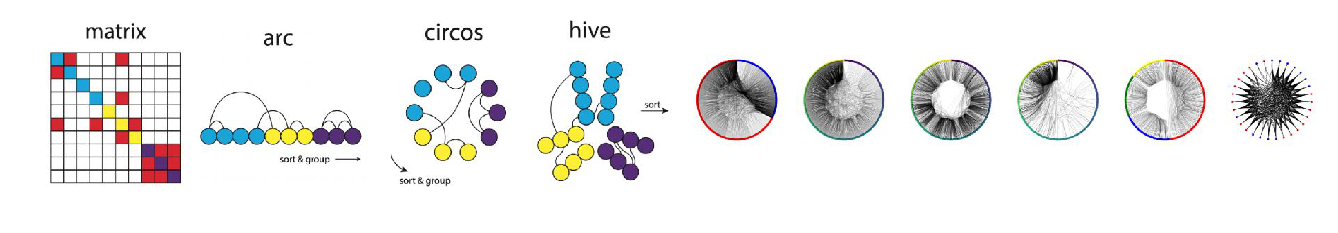

In [5]:
#vídeo

# Network/Graph
# ● Network = Graph = (nodes, edges)
# ● Directed or Undirected
#   ● Facebook: Undirected
#   ● Twitter: Directed
# ● networkx: API for analysis of graphs

##############################

# Basic NetworkX API
import networkx as nx

# G
# G.nodes()
# len(G.nodes())
# len(G.edges())
# type(G)

###################################

# Network visualization
# ● nxviz: API for creating beautiful and rational graph viz
# ● Prioritize placement of nodes

plt.subplot(1, 2, 1)
imagem = plt.imread(data_folder + "network_vis.jpg")
plt.axis('off')
plt.imshow(imagem)

# Basic nxviz API
import nxviz as nv
import matplotlib.pyplot as plt

# c = nv.CircosPlot(G)
# c.draw()
# plt.show()

plt.subplot(1, 2, 2)
imagem = plt.imread(data_folder + "circos_plot.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=-0.7, right=3, top=1, wspace=0, hspace=0)
plt.show()

Exercício 2

In [6]:
# G = nx.Graph()
# G.add_nodes_from(['p3301', 'p60083', 'u38993', 'u22412', 'u30260', 'u272', 'p36618', 'p6817', 'u13453', 'p104941', 'u42326', 'p2037', 'p14453', 'p36928', 'u4744', 'p65381', 'u2143', 'p37558', 'p2748', 'u3911', 'p25776', 'p13410', 'p23146', 'u29113', 'p50631', 'u54469', 'u2127', 'u27928', 'p42529', 'p113423', 'p84101', 'p58699', 'p33180', 'u12830', 'p29356', 'u5408', 'u14331', 'p111993', 'p7713', 'u16499', 'p35858', 'u4887', 'u21380', 'u500', 'p59159', 'u2796', 'u3414', 'p956', 'p5434', 'u37145', 'u7929', 'p17115', 'p95825', 'p61447', 'p5327', 'u15699', 'p2727', 'p5143', 'u30400', 'u532', 'u44961', 'u11167', 'u14242', 'p29031', 'p26072', 'u12061', 'p119770', 'u12319', 'u3424', 'p18449', 'u3365', 'p45697', 'p6265', 'p4824', 'u10582', 'u20469', 'u3453', 'u1121', 'u52135', 'p10122', 'u5001', 'p5046', 'u7980', 'p17543', 'u9478', 'u712', 'u557', 'u6301', 'p12757', 'u29581', 'p11518', 'u375', 'p39074', 'p2603', 'p63171', 'u6176', 'p36094', 'p1984', 'u8486', 'u7652', 'p7916', 'p1391', 'u17198', 'u5891', 'p115113', 'u51772', 'p117481', 'p19093', 'p55550', 'p70649', 'u4487', 'p15938', 'p10062', 'u46059', 'p2275', 'p2697', 'p2789', 'p4576', 'p6159', 'p77890', 'u2091', 'p54950', 'p22389', 'p31513', 'p11465', 'p19944', 'p110293', 'u42910', 'u2845', 'u9237', 'p21790', 'u7983', 'u6794', 'p36726', 'p169', 'u31152', 'u14385', 'p53274', 'p5785', 'u14328', 'p46614', 'u29853', 'p10383', 'p14514', 'u26306', 'u2002', 'p83948', 'p4033', 'p22474', 'u2947', 'p3196', 'p24114', 'u2162', 'p58', 'u13737', 'p105497', 'u10378', 'u19020', 'p10827', 'u11317', 'p2111', 'u19966', 'p39', 'p48916', 'p3589', 'p78685', 'u3813', 'u11571', 'u3531', 'p9731', 'u34192', 'u7902', 'p13659', 'p3266', 'u45506', 'p9033', 'p51693', 'u90', 'u47244', 'p65955', 'p85332', 'u53385', 'p42378', 'p15530', 'p13975', 'p36835', 'u9228', 'u5481', 'p21363', 'p43884', 'p60153', 'u1454', 'u54261', 'p42456', 'p66563', 'u17980', 'u29548', 'u49276', 'u6702', 'u4984', 'u10495', 'p1453', 'p19331', 'u2145', 'u5338', 'p10092', 'p110297', 'u13231', 'p82470', 'u47888', 'u15567', 'p27084', 'u22830', 'u21413', 'p47', 'p207', 'u27190', 'p118353', 'p117188', 'u10285', 'u1170', 'u41615', 'p119615', 'p72997', 'p17922', 'u18112', 'u1735', 'p5705', 'p7486', 'p14506', 'p84287', 'u27663', 'u6946', 'p64602', 'u17474', 'u42335', 'p3233', 'p16730', 'u1766', 'p50786', 'p54538', 'u1350', 'p83255', 'u16332', 'p55807', 'p17479', 'p110492', 'p80440', 'u5093', 'u155', 'p9278', 'u5695', 'u11423', 'p18970', 'p5527', 'u978', 'p9603', 'u8100', 'u9154', 'p63153', 'p9275', 'u5212', 'p90577', 'p88026', 'u1894', 'u15788', 'p32153', 'u20626', 'p73861', 'u13926', 'p91058', 'p1434', 'p55119', 'p3561', 'p4884', 'p36776', 'p12708', 'u12217', 'u4', 'p2289', 'p1679', 'u24452', 'u18110', 'u3141', 'p58134', 'p24030', 'p89437', 'u23578', 'p111932', 'u29694', 'p100488', 'p83966', 'p170', 'u4252', 'u12445', 'p1512', 'p9347', 'u29878', 'p51605', 'p88', 'p1392', 'u8156', 'u7497', 'p45543', 'p8718', 'u23073', 'p423', 'p80814', 'p58320', 'p23405', 'u11793', 'u5243', 'u16265', 'u15014', 'p3907', 'p33790', 'p67141', 'u3278', 'u42746', 'p60824', 'p27240', 'p83450', 'p23565', 'p82598', 'u34047', 'p61197', 'u48867', 'p28413', 'p48705', 'u678', 'u3233', 'u21141', 'u11664', 'u27403', 'p116431', 'p32204', 'u5715', 'u4399', 'p146', 'u9772', 'p40944', 'u18167', 'u42258', 'u21608', 'p11858', 'u70', 'p951', 'p14732', 'u4846', 'u24138', 'u9443', 'p27312', 'p15945', 'u39942', 'p1628', 'u1005', 'p106254', 'u35363', 'u28457', 'p4382', 'u51042', 'p45144', 'p4808', 'u4589', 'u4839', 'u9123', 'u4619', 'p70290', 'p5887', 'p88192', 'p465', 'u1760', 'u8752', 'u3098', 'p90681', 'u2637', 'p28336', 'p11511', 'p92734', 'p1251', 'p114171', 'u5072', 'p12010', 'u5203', 'p19054', 'p69158', 'u19865', 'p34038', 'u8519', 'u24985', 'u4380', 'p33341', 'u16127', 'p2235', 'u34106', 'u35092', 'p15878', 'u24948', 'u10352', 'p45698', 'p12030', 'p62092', 'p8740', 'u18954', 'u10794', 'u23324', 'u2153', 'u2290', 'p117228', 'u37700', 'u44321', 'p10983', 'p15283', 'p35988', 'u15172', 'p101093', 'p92276', 'u29769', 'p9111', 'u48837', 'p4735', 'p1723', 'u6425', 'p25845', 'u4671', 'p77146', 'u27439', 'u4872', 'u7664', 'p5531', 'u17066', 'p42063', 'u1853', 'p5981', 'u18862', 'u19371', 'p74324', 'u7732', 'p12951', 'p20698', 'p345', 'p1071', 'u15653', 'u1385', 'p3030', 'u28038', 'p67912', 'p7239', 'p22110', 'u1047', 'p20286', 'u12271', 'p47254', 'u6538', 'p63488', 'u36681', 'p21290', 'u1888', 'p3429', 'u1582', 'p76405', 'p4938', 'p11181', 'p28012', 'u5107', 'p19547', 'u7957', 'p6260', 'p78961', 'p17967', 'p49325', 'p9754', 'u1605', 'p83968', 'p52597', 'u43828', 'p50480', 'p20266', 'p120721', 'u3766', 'p93774', 'p56315', 'p18889', 'p29880', 'u12030', 'u1928', 'p42766', 'u23009', 'p71327', 'p2305', 'u8062', 'p92503', 'p15162', 'p91910', 'u1562', 'p7993', 'u4382', 'p1112', 'p645', 'p111749', 'u992', 'p8689', 'p12702', 'u20041', 'p77231', 'u3082', 'u3125', 'p53720', 'u5951', 'p2475', 'u2650', 'u38255', 'p14713', 'u19415', 'p82696', 'p16120', 'u7436', 'p26199', 'p9350', 'p395', 'u7747', 'p22803', 'p24420', 'u17227', 'p41890', 'p61045', 'p92402', 'p2059', 'u35190', 'u8171', 'p39343', 'u343', 'p19632', 'p22854', 'p109165', 'u7536', 'p34237', 'u15133', 'u8043', 'p18770', 'p109451', 'p63051', 'p19955', 'p90494', 'p9130', 'u46060', 'p8321', 'u8203', 'u621', 'u10111', 'p11940', 'u42413', 'u728', 'u14376', 'u44076', 'p1460', 'u17393', 'p33730', 'u140', 'p78527', 'p25865', 'p42957', 'u35476', 'p31022', 'p19691', 'p98217', 'p3114', 'p78920', 'u46347', 'p10570', 'u28941', 'p85229', 'u18668', 'u13682', 'p57413', 'p743', 'p5479', 'u16478', 'u52891', 'p6197', 'u13969', 'u41472', 'p9201', 'u14058', 'u45354', 'p40580', 'p24731', 'u27343', 'u10848', 'p41639', 'u12167', 'u3893', 'p12979', 'u5918', 'p49298', 'u16262', 'p6870', 'u3285', 'p72338', 'p50396', 'p57228', 'u14859', 'p31884', 'u2810', 'p14351', 'p46346', 'p13369', 'u948', 'p17715', 'p70635', 'u3650', 'p104722', 'p57616', 'p17427', 'p3420', 'u12130', 'p1340', 'u13402', 'p12323', 'u8596', 'u8238', 'u10898', 'p70989', 'p15773', 'p572', 'u34908', 'p16458', 'p14398', 'u20048', 'u29037', 'u5761', 'u11145', 'u36775', 'u10744', 'p11151', 'p5388', 'p539', 'u28360', 'u4592', 'p8399', 'p32839', 'p112602', 'u9128', 'p97835', 'p22836', 'p5729', 'u4598', 'p6497', 'u45775', 'p99351', 'p37625', 'u30839', 'p8948', 'p1073', 'p13255', 'p2109', 'u25200', 'p26441', 'p36344', 'p2663', 'p48597', 'p10382', 'p90958', 'u18153', 'p52304', 'p48096', 'u724', 'u19605', 'p11922', 'u12890', 'p85373', 'u8929', 'p69958', 'p26144', 'u8972', 'u55152', 'p66396', 'u52286', 'p360', 'u48903', 'p567', 'p53330', 'u21454', 'p2461', 'p50828', 'u31579', 'u29122', 'p57272', 'u19353', 'p82582', 'p55668', 'u2693', 'u3659', 'u2864', 'p54078', 'u19564', 'p270', 'p93271', 'u32898', 'u4068', 'u219', 'p19456', 'p92704', 'u8919', 'u1674', 'p78528', 'p34205', 'u96', 'p2593', 'p29886', 'u6297', 'p69231', 'u2377', 'u24253', 'u7993', 'p53774', 'p19776', 'u2234', 'p8483', 'u8056', 'u16232', 'u31002', 'u7716', 'p35235', 'u820', 'u7861', 'u35642', 'p5383', 'u31468', 'p21482', 'p25586', 'u5403', 'p104628', 'u15358', 'u23371', 'p114969', 'p42758', 'p50145', 'p42321', 'p120371', 'u25084', 'p35905', 'p21574', 'u4541', 'u1396', 'u21008', 'u17051', 'p68454', 'p10377', 'p13150', 'p13238', 'p9018', 'u3952', 'p5647', 'u16003', 'u5532', 'p87356', 'p15079', 'p4002', 'u1221', 'u44101', 'u632', 'p234', 'p25258', 'u11722', 'p4462', 'p35072', 'p24637', 'p8467', 'p86616', 'u12884', 'u39306', 'p114697', 'p38217', 'p13201', 'p42985', 'u41213', 'p16795', 'u55988', 'u9073', 'u4451', 'u12152', 'u1969', 'p15789', 'p24303', 'u14625', 'p3744', 'u13557', 'u18366', 'p59796', 'p2787', 'p46533', 'u5750', 'p47040', 'u21759', 'u544', 'u1452', 'u5061', 'u12562', 'p726', 'u1345', 'u1786', 'p8779', 'p89858', 'p1688', 'u5744', 'p13778', 'u3943', 'u47120', 'u31406', 'p109373', 'p56225', 'u33750', 'p46081', 'u37358', 'u5902', 'p99592', 'p120833', 'p2500', 'u8538', 'u1383', 'u3946', 'p373', 'p34599', 'u45751', 'u1181', 'p50351', 'u10191', 'p56005', 'p37753', 'p28241', 'u3605', 'u44', 'p32179', 'p42215', 'u5593', 'p2141', 'p55313', 'u5441', 'u735', 'p9565', 'p91348', 'u24389', 'u3969', 'u10683', 'u5875', 'p36770', 'p1332', 'p17632', 'p100064', 'p54545', 'u10459', 'p32597', 'u8570', 'p40673', 'u1422', 'p2990', 'u27153', 'p2476', 'p2047', 'p12917', 'u38278', 'p16327', 'p92009', 'p50218', 'p7700', 'p2078', 'p7422', 'u20249', 'u5904', 'p3188', 'u14468', 'u42795', 'u8260', 'p12471', 'u34707', 'u49246', 'u329', 'p13022', 'p75399', 'u29897', 'p537', 'p14580', 'p42354', 'p29703', 'p105365', 'u376', 'u8480', 'u12974', 'u9538', 'p35837', 'p72264', 'p86869', 'u11326', 'u33995', 'u6137', 'p18592', 'p42187', 'p12833', 'p29836', 'p103365', 'p21251', 'p63837', 'u27337', 'p23736', 'p110145', 'u7225', 'u30044', 'u17717', 'p108806', 'p5530', 'u36082', 'p66936', 'p31252', 'u9026', 'p58688', 'u13174', 'u29927', 'u18030', 'u17961', 'p27706', 'u2204', 'p111405', 'u16031', 'p119646', 'p84178', 'p31341', 'p1350', 'p78954', 'u742', 'p65420', 'p68257', 'p87044', 'p44964', 'p24401', 'u9740', 'u23214', 'u8653', 'u17714', 'p2783', 'p2270', 'p5509', 'p4889', 'p15964', 'u1370', 'u12660', 'p14472', 'p1240', 'u6105', 'p7760', 'u45984', 'p9984', 'u5040', 'u924', 'p17701', 'p5895', 'p12713', 'u9557', 'u7385', 'u9524', 'u6650', 'p94989', 'u1044', 'u2093', 'u13668', 'p19553', 'p3118', 'u3836', 'p57622', 'u26550', 'u7480', 'p66226', 'u26622', 'p14208', 'p1895', 'u7825', 'p65108', 'u20485', 'u35896', 'u12569', 'p98548', 'u16802', 'u32519', 'p63194', 'p79566', 'p107969', 'p33044', 'u11921', 'p26843', 'p19873', 'p87689', 'u53514', 'p22673', 'p90792', 'u2334', 'u19547', 'p45678', 'p90557', 'u10149', 'u2292', 'p11770', 'p2490', 'p20145', 'p4292', 'p7192', 'p119411', 'u775', 'u22095', 'u28595', 'p54008', 'p109634', 'u50665', 'u27463', 'p12805', 'p20010', 'u19433', 'p38273', 'p53718', 'u957', 'u19367', 'p71088', 'p79168', 'p6684', 'u3440', 'p73191', 'p100711', 'p41356', 'p15453', 'p109988', 'u2950', 'u16102', 'u3308', 'u11778', 'p35460', 'p1841', 'u47016', 'p28711', 'u4003', 'u32106', 'u25961', 'p25544', 'p1703', 'u6590', 'u6736', 'p57269', 'u13333', 'u8299', 'p28164', 'p20181', 'p20063', 'u28694', 'p18820', 'u14303', 'u37296', 'u11141', 'p74707', 'u11471', 'p87619', 'u38435', 'p100312', 'u15832', 'u20813', 'u12653', 'p21532', 'u1680', 'u2584', 'p15991', 'p15158', 'u9791', 'p89944', 'u8450', 'p4754', 'u15895', 'p107626', 'p16950', 'u17201', 'u25000', 'u14144', 'u10356', 'p681', 'u3564', 'p15731', 'p5346', 'u38693', 'u17100', 'p119154', 'u39290', 'u52800', 'p6694', 'p103340', 'p114790', 'u20882', 'u2718', 'p69078', 'u9637', 'p62232', 'p15515', 'p42624', 'u4440', 'u1080', 'u7617', 'u6316', 'p20840', 'u46389', 'u6568', 'u2014', 'p1402', 'u50403', 'p44321', 'p8730', 'p2174', 'p11452', 'u1973', 'p104579', 'p46493', 'u16005', 'p178', 'p40682', 'p8770', 'u7708', 'u2656', 'p2699', 'u21563', 'u1458', 'p24525', 'p38371', 'p31228', 'u1445', 'u7712', 'p3781', 'u8415', 'p28018', 'p33248', 'u39554', 'u13182', 'p50406', 'u12275', 'p348', 'p83541', 'p72279', 'u12290', 'u1112', 'u2643', 'p64383', 'p12870', 'u11459', 'u16086', 'p104667', 'p1137', 'p93884', 'u13107', 'u5589', 'u13325', 'p3645', 'u3318', 'p120144', 'u9824', 'u6107', 'u24604', 'p47103', 'u952', 'p3784', 'p47065', 'u13514', 'u24734', 'p15953', 'u12075', 'u29040', 'u23424', 'p19244', 'u3484', 'u725', 'u8854', 'p21402', 'u17349', 'p6412', 'p38681', 'p12584', 'p104403', 'u7358', 'p651', 'u1163', 'u14118', 'p30739', 'u20851', 'u864', 'p57142', 'u936', 'p83874', 'u12296', 'p27362', 'p1930', 'p5166', 'p47429', 'u11734', 'u17117', 'u22342', 'p10404', 'p29728', 'p91507', 'u35615', 'p9011', 'u2526', 'u14130', 'p36938', 'u4690', 'p21071', 'u35718', 'u6575', 'u10788', 'p55295', 'u11631', 'p26817', 'u30823', 'p49722', 'p6358', 'u4559', 'p8851', 'u879', 'p14850', 'u1567', 'p5472', 'p11785', 'p60160', 'u8974', 'u18937', 'p50263', 'p69624', 'p4630', 'p9746', 'p34507', 'p63872', 'p97625', 'p72187', 'p2895', 'u12986', 'p43543', 'u19850', 'p12682', 'u16463', 'u22506', 'p82526', 'u9787', 'u5527', 'u20839', 'u10566', 'u32507', 'u8072', 'p29342', 'u10619', 'p12803', 'p10213', 'p41734', 'p9094', 'u14392', 'p618', 'u12537', 'p69095', 'p23604', 'p13287', 'u9561', 'u46595', 'u6172', 'p3135', 'p59344', 'u8111', 'p30671', 'p120776', 'u38075', 'p23518', 'u3235', 'p74590', 'p5281', 'p90495', 'u5248', 'u34598', 'u20002', 'u30802', 'p2310', 'u19108', 'u42577', 'p590', 'p54203', 'p15706', 'u589', 'u2358', 'p2657', 'p43280', 'p118990', 'p9818', 'u20531', 'u6680', 'u9144', 'p99808', 'u11060', 'u38705', 'p7309', 'p74148', 'u1798', 'p67242', 'p23155', 'p6328', 'u11756', 'p50474', 'p71894', 'u42543', 'p5963', 'p13', 'p1007', 'u54238', 'u20894', 'u3700', 'p8458', 'p96792', 'p5147', 'u20929', 'p2160', 'p3657', 'p83732', 'p46641', 'u20273', 'p6199', 'u39771', 'u3339', 'p38717', 'u3934', 'u3581', 'p939', 'p31030', 'p5739', 'p44525', 'p9606', 'p64982', 'p51879', 'u13274', 'u5296', 'p14672', 'p15489', 'p13372', 'u442', 'p96851', 'p47442', 'p17503', 'p37471', 'u5991', 'p52803', 'u3887', 'u22824', 'p96573', 'p107753', 'p44326', 'u5221', 'u5189', 'u9097', 'u22864', 'u4363', 'u7079', 'u2317', 'p34377', 'p20493', 'u444', 'u3841', 'u53231', 'u2193', 'p32139', 'p63767', 'p59470', 'p29953', 'p16036', 'u16635', 'u34049', 'u34413', 'p49446', 'p3467', 'p77360', 'p12794', 'u393', 'u5603', 'u12423', 'p1851', 'p36234', 'p17201', 'u2757', 'p86267', 'p52080', 'p115943', 'p39275', 'p394', 'p8761', 'p70678', 'p15875', 'p24588', 'p2987', 'p81255', 'u9166', 'u10036', 'p1018', 'p13480', 'p27038', 'u14632', 'u18815', 'u4691', 'p20080', 'p5474', 'p48447', 'u13078', 'p85566', 'u5400', 'u3040', 'u3726', 'u8691', 'p3708', 'u7382', 'u1374', 'u20091', 'p542', 'p25357', 'u4606', 'u1064', 'u314', 'p60459', 'p6551', 'u37252', 'p1473', 'p85532', 'p28896', 'u10244', 'p8203', 'u41198', 'p1802', 'p1999', 'p18732', 'u18976', 'u55291', 'u9659', 'p112226', 'u23951', 'p44593', 'p17298', 'p49367', 'u4160', 'u26567', 'p21537', 'u52010', 'p12310', 'p26818', 'u10339', 'u48372', 'u4657', 'u14375', 'u6153', 'u287', 'p85710', 'u413', 'u306', 'p112060', 'u1089', 'u28353', 'u9722', 'p120119', 'u379', 'u19261', 'p66503', 'u438', 'u12750', 'u20630', 'p813', 'u13247', 'p37196', 'p50563', 'u23032', 'u40794', 'u51587', 'u446', 'u44130', 'p6453', 'p103558', 'u13038', 'u55695', 'p1666', 'p21397', 'p71651', 'u4558', 'u4439', 'p18063', 'u4816', 'p54068', 'p20304', 'u4004', 'u5735', 'p19797', 'u38438', 'u3636', 'p4350', 'p755', 'u4463', 'u10995', 'u8816', 'u3976', 'p58711', 'u3003', 'p23200', 'p17827', 'u37662', 'p112340', 'p40256', 'p192', 'u21036', 'u20543', 'p2423', 'u1627', 'p63967', 'u14330', 'u16898', 'u9140', 'u17688', 'u84', 'p5877', 'u55229', 'u2170', 'p42467', 'u25854', 'u16080', 'u2119', 'u4745', 'p54012', 'p62660', 'p60973', 'p117858', 'p1261', 'p4196', 'p31649', 'p82256', 'u11809', 'p26928', 'p70354', 'p82851', 'p119267', 'u55095', 'p8566', 'p86217', 'u757', 'u14842', 'u25581', 'p1868', 'u20636', 'p10496', 'p63863', 'p38545', 'p9735', 'p36457', 'u15631', 'p52732', 'p3140', 'u5021', 'p65828', 'p8562', 'p77133', 'p76579', 'u12233', 'u14932', 'p80453', 'u15778', 'u3877', 'p114027', 'u13512', 'u14642', 'u15256', 'p12982', 'u20135', 'p23226', 'u19680', 'u12313', 'u5311', 'p22651', 'u2055', 'u49757', 'p4150', 'u14343', 'u7945', 'p7196', 'p38389', 'u10047', 'u36322', 'u10303', 'u43656', 'u3252', 'u23587', 'p53209', 'u2187', 'u1425', 'u5524', 'p28665', 'u7765', 'p29874', 'u7686', 'p63333', 'p8860', 'p107068', 'u8791', 'p39897', 'p30467', 'u9804', 'p583', 'u37239', 'p20508', 'p99452', 'p1572', 'p26147', 'u43377', 'u4964', 'p14194', 'p94647', 'u3849', 'p29991', 'p10913', 'u17570', 'p1002', 'u408', 'u15843', 'p87418', 'p35325', 'p8307', 'p115255', 'p5889', 'p26045', 'p6015', 'p61820', 'p50989', 'p63243', 'u2658', 'u6806', 'u35898', 'p102211', 'p26330', 'p40966', 'p9434', 'u1625', 'u816', 'u8278', 'p43995', 'p16867', 'p2664', 'p1820', 'u42927', 'u34906', 'p8102', 'u32337', 'p24612', 'p95', 'u8953', 'p17376', 'p86585', 'u2188', 'u19080', 'p8971', 'u2521', 'u17769', 'p24623', 'u36345', 'u7725', 'p118093', 'p106975', 'p91830', 'p59518', 'p30045', 'u1218', 'p512', 'u13698', 'u42100', 'u3002', 'u2391', 'p65178', 'u35163', 'p51472', 'p37034', 'u15923', 'u20078', 'p28196', 'p8244', 'p58485', 'p35088', 'p12248', 'p15021', 'u2422', 'u5424', 'p1758', 'p55145', 'p51206', 'u22040', 'u301', 'p26704', 'p11778', 'p9923', 'u106', 'p86460', 'p59724', 'p22375', 'p16727', 'p111613', 'u32986', 'u5397', 'u5267', 'u48455', 'u1960', 'p61751', 'p16874', 'u5069', 'u28660', 'p45162', 'u10216', 'u12264', 'p37011', 'p6046', 'p22492', 'u7680', 'u2435', 'p43751', 'u28624', 'u9921', 'u7160', 'p61543', 'p78568', 'p28845', 'p74462', 'p55288', 'u16448', 'u25418', 'u4101', 'p40885', 'p25926', 'u11762', 'u23458', 'u2072', 'p85658', 'p97147', 'p93906', 'u45772', 'p83725', 'p57789', 'p80197', 'p84098', 'u12200', 'p73237', 'u7691', 'p32189', 'p109572', 'p112432', 'u9120', 'u46113', 'p21187', 'p77937', 'u26343', 'p14703', 'u371', 'u12144', 'u7594', 'p103213', 'u684', 'u21088', 'p35505', 'u9545', 'p35534', 'u24859', 'u5411', 'p69923', 'u14883', 'p57865', 'u4220', 'p40341', 'u9425', 'u9651', 'u4980', 'u6824', 'p81537', 'u2518', 'p75071', 'u8148', 'p81258', 'u4280', 'p66797', 'p55178', 'u13777', 'p47039', 'u18692', 'u1802', 'u753', 'u8259', 'p44555', 'u4334', 'u4061', 'u15166', 'u981', 'p885', 'p98366', 'p32496', 'u8905', 'p524', 'u34611', 'u10174', 'p55333', 'u3772', 'u10685', 'u15707', 'p24518', 'p17223', 'u6352', 'p56960', 'p10130', 'u14432', 'u1876', 'u30604', 'u4357', 'u6498', 'p4641', 'p3170', 'u16048', 'u11220', 'p8182', 'u21208', 'p7825', 'p1501', 'p108473', 'u530', 'p72561', 'u54584', 'u13851', 'u19213', 'p28701', 'p63810', 'p10152', 'u10311', 'p75211', 'p3910', 'u19581', 'u5312', 'p11000', 'p403', 'u2657', 'u16596', 'u24760', 'p48899', 'p85266', 'p114248', 'u16721', 'p66075', 'u8825', 'p6279', 'p56030', 'u8066', 'p11474', 'u29705', 'p28218', 'p861', 'p1798', 'u708', 'u19711', 'u739', 'p4658', 'u23199', 'u2271', 'p16890', 'u964', 'u27573', 'p15297', 'p43480', 'p113357', 'u4837', 'p56084', 'u21194', 'u18416', 'u33294', 'p8439', 'u36218', 'u9382', 'u6819', 'u9463', 'u31355', 'p43433', 'p105957', 'u14028', 'p73189', 'p1573', 'p20764', 'p25699', 'p28389', 'p59479', 'u2279', 'p69031', 'p25777', 'p3106', 'u12604', 'p48970', 'u6285', 'u18848', 'u9212', 'u2385', 'u23405', 'u1153', 'p2965', 'p44217', 'u8008', 'u46916', 'p105423', 'u28502', 'p72081', 'u42740', 'u6413', 'u11140', 'u7912', 'p1270', 'p14971', 'u17780', 'u26060', 'p5718', 'p7608', 'u26725', 'p72777', 'p26746', 'u28921', 'p834', 'p35666', 'u250', 'u105', 'p6413', 'u1023', 'p23398', 'u34305', 'p1765', 'u12800', 'u173', 'u15867', 'p82908', 'u6758', 'u9270', 'p8609', 'u7003', 'p100634', 'p67694', 'p105681', 'p3731', 'u9513', 'u7944', 'u11122', 'u21404', 'p41237', 'u24423', 'u2342', 'p116533', 'u7881', 'p88001', 'p91787', 'p61931', 'p7619', 'u3431', 'p96575', 'p25033', 'u16625', 'u18459', 'p17016', 'u7391', 'p11902', 'p15492', 'u49787', 'p44032', 'p78237', 'p20506', 'u17104', 'u1324', 'u6888', 'p40308', 'p6578', 'p1156', 'p1451', 'u21344', 'u3588', 'u25185', 'p78305', 'p43392', 'u9599', 'u9990', 'u20823', 'p3244', 'p9396', 'p42054', 'u7197', 'p2668', 'p75938', 'p59751', 'u20502', 'p1331', 'p97771', 'u2483', 'u17919', 'p5332', 'p5041', 'p23818', 'p104516', 'p28868', 'u13004', 'u21688', 'p47113', 'p1254', 'u18538', 'u7167', 'u10219', 'p54702', 'p57254', 'u4552', 'u19194', 'p115198', 'p74691', 'p22982', 'p64568', 'u264', 'p15183', 'u2108', 'p28878', 'p92257', 'u16281', 'p88776', 'u32683', 'u5925', 'p43910', 'u47261', 'p32623', 'u11532', 'u16307', 'p5368', 'p10', 'u43691', 'p120204', 'p66546', 'u3642', 'p45', 'u2768', 'u12944', 'u23284', 'p80', 'u14105', 'p247', 'p13168', 'u9057', 'u11904', 'p42616', 'u10098', 'p40063', 'u3197', 'u24785', 'u20686', 'p15397', 'p594', 'p49610', 'u1148', 'u2741', 'u17693', 'p51079', 'u18103', 'p22984', 'p26767', 'p69782', 'u23608', 'p24169', 'p9110', 'p2442', 'u1150', 'p84771', 'p421', 'u797', 'u3522', 'p84757', 'p13878', 'p23765', 'u4981', 'p37039', 'p97701', 'p15325', 'p1288', 'u1788', 'p91381', 'p74242', 'p36860', 'u2149', 'p4672', 'p2208', 'u9664', 'p17825', 'p25455', 'u4679', 'u2122', 'p64721', 'u10361', 'p106860', 'p874', 'u2992', 'u22885', 'u6123', 'p727', 'u9418', 'p38085', 'u13034', 'p115295', 'p28409', 'u2701', 'p112915', 'u2913', 'u48326', 'p54981', 'p79139', 'p92417', 'u34708', 'u16740', 'u2804', 'p2301', 'u5962', 'p8937', 'u27084', 'p110109', 'p32718', 'p8459', 'u16416', 'u6175', 'p17615', 'u8951', 'u29613', 'p6251', 'u18880', 'u6895', 'p4794', 'u10165', 'u29925', 'p21305', 'u605', 'u40798', 'u41709', 'p2659', 'u8734', 'u12579', 'u18265', 'u1172', 'u10755', 'p38852', 'p20921', 'u37452', 'u7641', 'u42220', 'u11997', 'p2966', 'u22108', 'p91328', 'u9033', 'p29974', 'u3676', 'u19876', 'p2482', 'p62616', 'p26838', 'p66721', 'p117467', 'u13907', 'p4421', 'p1466', 'u27114', 'p2831', 'u19299', 'p7234', 'p72680', 'u10206', 'p30652', 'p13458', 'p97742', 'p103620', 'u27896', 'p8172', 'p3238', 'u5856', 'p43252', 'u49046', 'p41043', 'u33911', 'u32847', 'p16154', 'p2502', 'u2500', 'u41797', 'u3245', 'u26070', 'p52869', 'u20342', 'p1997', 'u14110', 'u10993', 'p11481', 'p105044', 'u21818', 'u6703', 'p50077', 'p14625', 'p107622', 'u11331', 'u50659', 'p16906', 'u9492', 'u8251', 'u17329', 'u11782', 'p21361', 'u1051', 'p43483', 'p976', 'u10759', 'p45928', 'u14296', 'p41697', 'u38031', 'u2075', 'u21491', 'p17626', 'u16050', 'u31299', 'p108517', 'p52194', 'u15258', 'p26011', 'u1644', 'u15957', 'p72025', 'u2613', 'u35334', 'p36782', 'u8113', 'p701', 'p5404', 'p63836', 'u9244', 'u51898', 'u25005', 'p65486', 'p8826', 'u8236', 'u11993', 'p40680', 'u44023', 'p76127', 'p25105', 'p38099', 'p59591', 'u37133', 'u21561', 'p32743', 'p85051', 'p6456', 'p111404', 'u39279', 'u12355', 'u3056', 'p17846', 'p7705', 'p27505', 'p21674', 'p66037', 'p64938', 'u6641', 'u14661', 'u11365', 'u27720', 'u13888', 'p22886', 'u7762', 'p5923', 'p94455', 'p29059', 'p17963', 'p16170', 'p40618', 'p96552', 'u1513', 'p68575', 'u55552', 'p5524', 'p36088', 'p22026', 'u9434', 'u13596', 'u4013', 'p77896', 'u16218', 'u33366', 'p3766', 'u36137', 'u21744', 'u19403', 'u27317', 'u10372', 'p91747', 'u5423', 'u25819', 'u20268', 'u38512', 'p60147', 'u9170', 'u6029', 'p98596', 'u20436', 'p10001', 'p665', 'u31307', 'p40845', 'p30368', 'p61359', 'u45811', 'p9862', 'p37156', 'p11175', 'p57035', 'u47126', 'p2147', 'p4380', 'p6071', 'u9396', 'u27209', 'u5194', 'p3050', 'p21945', 'u6245', 'p117558', 'p10928', 'u18843', 'u41007', 'u46583', 'p28479', 'u9027', 'p118077', 'u5865', 'u16387', 'u1123', 'p66169', 'p63830', 'p116451', 'u13652', 'u47401', 'u15647', 'u4706', 'u11398', 'u25685', 'u27645', 'p33334', 'u34455', 'p10009', 'u3211', 'u13812', 'u8137', 'u22019', 'p19695', 'p224', 'p9972', 'u55274', 'p85613', 'p50722', 'p98421', 'u19220', 'u10920', 'p25461', 'p32932', 'p35789', 'p24417', 'u990', 'p33128', 'p21707', 'u7034', 'p1009', 'p113051', 'u11668', 'p67658', 'p1726', 'u20994', 'u453', 'u12027', 'u14390', 'u24662', 'p16055', 'p43764', 'u51971', 'u4620', 'u10253', 'u55685', 'p24353', 'p49194', 'p12866', 'p3136', 'u17311', 'p505', 'p6116', 'u197', 'u38161', 'u533', 'p28513', 'p52045', 'u25820', 'p12931', 'p35030', 'p75840', 'p5299', 'p47115', 'p117861', 'p11837', 'u18199', 'p61645', 'p38590', 'u35473', 'p61826', 'p1424', 'p109429', 'p9962', 'u4285', 'u5839', 'p105076', 'p80754', 'p120102', 'p52105', 'u10265', 'u22581', 'p14296', 'p52840', 'u53347', 'p16764', 'p26519', 'p45962', 'p11357', 'p25703', 'u20974', 'p20015', 'u1219', 'u25632', 'p7202', 'u2440', 'u1652', 'p6794', 'p1360', 'p2496', 'u4408', 'p9474', 'u9526', 'p13470', 'u12083', 'u731', 'u9879', 'p3116', 'u1357', 'p98673', 'p13805', 'p110529', 'p12194', 'u5525', 'p75705', 'u29852', 'p91873', 'u1017', 'p92253', 'u1782', 'p39250', 'p14688', 'u6121', 'p36099', 'u7252', 'u8531', 'u11467', 'p119181', 'u7258', 'u9219', 'u427', 'u12385', 'p103337', 'p26241', 'p7154', 'u12988', 'u29513', 'p87173', 'u18428', 'u19186', 'p6016', 'u49867', 'p10656', 'u17068', 'u761', 'u591', 'p40280', 'u22591', 'p49908', 'p78827', 'u11487', 'p19893', 'p54099', 'u1272', 'p54145', 'p186', 'u23906', 'u7438', 'u16175', 'u4613', 'p6153', 'p97765', 'u6608', 'u37359', 'p28042', 'u4685', 'u5868', 'u8813', 'u18365', 'u2256', 'p1550', 'p112821', 'p7122', 'p35830', 'p2591', 'u3494', 'p86853', 'p30080', 'p28089', 'p51690', 'p83111', 'p32322', 'u9872', 'p12494', 'u17255', 'u25629', 'u20849', 'u36237', 'p13165', 'p9103', 'p15679', 'p11166', 'u8321', 'u36388', 'p1662', 'u18902', 'p53323', 'p72977', 'p20673', 'u8227', 'u11932', 'u34790', 'u3773', 'u31652', 'p16696', 'u6361', 'u54179', 'p107778', 'u41150', 'u8639', 'p5674', 'p109241', 'u11724', 'u29275', 'u36479', 'u29426', 'p1506', 'u55173', 'p80849', 'p82816', 'p73864', 'u52038', 'p17509', 'p25761', 'u1202', 'u1367', 'u7246', 'u28095', 'u212', 'u4416', 'u11534', 'u18171', 'p53945', 'u10855', 'p70523', 'u9671', 'u23937', 'p4835', 'p80378', 'u5062', 'u34641', 'u694', 'u1164', 'p29650', 'p3253', 'u11553', 'p8914', 'p65232', 'u7091', 'p67447', 'u11935', 'u17499', 'p30068', 'u21073', 'u33515', 'p3980', 'p22972', 'u45511', 'p82566', 'p478', 'u13023', 'u17704', 'p45254', 'u8041', 'p28261', 'p27306', 'u42767', 'u28781', 'p9548', 'p2848', 'u5777', 'u33364', 'p3421', 'p115217', 'p5526', 'p13103', 'p74628', 'u6737', 'p53751', 'p39855', 'u9925', 'p13182', 'p15924', 'p91694', 'p589', 'p9067', 'u5559', 'p31077', 'u20303', 'u34172', 'p34725', 'p53157', 'p12110', 'p920', 'u1126', 'p46060', 'u16911', 'u20890', 'p120273', 'u31742', 'u21097', 'u7228', 'p1602', 'u30930', 'p4970', 'u354', 'p7102', 'p84901', 'p1038', 'u22560', 'u16956', 'u34322', 'p71278', 'u10483', 'p41045', 'u17945', 'p2128', 'u30195', 'u13862', 'p102606', 'p101074', 'p73000', 'p34264', 'u28623', 'u3154', 'p64711', 'u24747', 'p24392', 'u2368', 'p83817', 'u2634', 'u6481', 'u15248', 'p12740', 'u4540', 'p31028', 'u10015', 'u31032', 'p112001', 'p20700', 'u1699', 'u29653', 'p47812', 'p8001', 'p61479', 'p80129', 'p4483', 'u4310', 'u7278', 'p113355', 'u10439', 'u24823', 'p22050', 'u5275', 'p22537', 'p119643', 'p32164', 'p108031', 'p16711', 'p90549', 'p93737', 'u17552', 'p60929', 'p70252', 'u17391', 'u13968', 'p100414', 'u19990', 'p46506', 'p30430', 'u4021', 'p13289', 'u19078', 'u4394', 'p89629', 'p16352', 'p31311', 'u24625', 'p6573', 'u24015', 'p17157', 'p46835', 'u28398', 'u17532', 'p48037', 'u7578', 'p28124', 'p31940', 'p39607', 'u10122', 'p17162', 'p379', 'p21981', 'u32941', 'p115894', 'u8339', 'u387', 'p2333', 'p112338', 'u8795', 'p9645', 'u21392', 'u9476', 'p6038', 'u1521', 'u9317', 'p98150', 'p14391', 'p3497', 'p63001', 'p4717', 'u26358', 'u10448', 'p27788', 'p31408', 'p10753', 'p14394', 'u36209', 'p9366', 'u522', 'p78890', 'p2676', 'p62456', 'u37566', 'u21939', 'u9816', 'u15566', 'u29798', 'u766', 'u19693', 'p35714', 'p106907', 'p37215', 'u368', 'u19649', 'u3609', 'p88121', 'p73158', 'p1936', 'u17376', 'p49633', 'u2232', 'p1825', 'u13202', 'p8323', 'u25052', 'u36493', 'p41031', 'p5220', 'p93654', 'u49211', 'u7789', 'u7544', 'p27635', 'u10716', 'u43917', 'p49503', 'p41145', 'p27096', 'u8818', 'u28966', 'u23665', 'u9447', 'u6978', 'p2258', 'u17171', 'u11322', 'u1761', 'p5520', 'p30580', 'p4280', 'u12010', 'u27449', 'p31986', 'p64707', 'p102528', 'u3417', 'p28719', 'u9377', 'p67164', 'u2133', 'p11270', 'u17175', 'p5226', 'p79040', 'u28244', 'p71443', 'u30637', 'u19459', 'p18117', 'p18195', 'u9570', 'u16785', 'p50169', 'u34422', 'u397', 'p19990', 'u44810', 'p87914', 'p59299', 'p83101', 'p27649', 'p29252', 'u9342', 'u3421', 'p32617', 'p119950', 'u11329', 'p17958', 'u27442', 'p1877', 'u11279', 'p94801', 'p72445', 'p56700', 'p3461', 'p111056', 'p3818', 'p16983', 'p93126', 'p369', 'u46131', 'p25017', 'p82532', 'p56831', 'u4678', 'p42571', 'u3910', 'p20114', 'u47086', 'p15513', 'u43663', 'p18661', 'u4041', 'u3639', 'p79661', 'p26730', 'p3104', 'p93', 'p23533', 'u1328', 'p3086', 'p9684', 'p11701', 'u40752', 'p42180', 'u2160', 'u12921', 'p8389', 'u54492', 'u6212', 'u30114', 'u15190', 'p7039', 'u6414', 'p15321', 'u4392', 'u21817', 'u13098', 'u21557', 'p27708', 'u9743', 'p68463', 'p6783', 'p54451', 'u12689', 'p74274', 'p11399', 'u33590', 'p90426', 'p14521', 'p72154', 'u23432', 'u35902', 'p40817', 'u3153', 'u38928', 'p65912', 'p59359', 'p414', 'p74700', 'p15451', 'u5976', 'p45082', 'p60467', 'u26692', 'p22258', 'p28117', 'p3056', 'p3315', 'p109', 'p94141', 'p46179', 'u2546', 'u17031', 'u5972', 'p29713', 'p8803', 'p13783', 'u158', 'u9341', 'u3129', 'p86652', 'p71784', 'p23661', 'u18169', 'u6045', 'p27559', 'p13963', 'u6904', 'p10249', 'u10373', 'p28006', 'p52070', 'p94536', 'p86429', 'u3857', 'u8616', 'p34057', 'u43969', 'p29185', 'p31956', 'p73678', 'p15330', 'p72694', 'u23342', 'u39883', 'u9918', 'u30436', 'u46426', 'u7596', 'p51335', 'u16088', 'p53789', 'u15416', 'p74502', 'u47508', 'p48751', 'u40667', 'p118907', 'u4891', 'u6725', 'p71253', 'u42527', 'u2896', 'u13387', 'u23280', 'u26690', 'u23710', 'p1902', 'p111431', 'u29861', 'u19509', 'p30414', 'u8246', 'u2880', 'p63844', 'p4989', 'u29623', 'u43393', 'p4415', 'p4846', 'u7189', 'p15605', 'p48660', 'p33000', 'u886', 'u1473', 'u24267', 'p49968', 'u30324', 'u1056', 'p94602', 'p106635', 'p13867', 'p16043', 'u7120', 'p87779', 'p3618', 'u26272', 'p118024', 'p18663', 'u2151', 'u33527', 'u33198', 'u14025', 'p72035', 'u6320', 'p45042', 'p25308', 'p95709', 'p16594', 'p3325', 'u2494', 'u4513', 'p57143', 'u10966', 'u4048', 'u4073', 'p63095', 'u5082', 'p12566', 'u433', 'p57221', 'u8865', 'p3870', 'u41000', 'u271', 'u15051', 'p15167', 'u3037', 'p5952', 'p86974', 'u4593', 'p69884', 'u3604', 'u2068', 'u15708', 'p59568', 'p1113', 'p56287', 'u35024', 'u1168', 'p3525', 'p5645', 'p15645', 'u41209', 'u47531', 'u22710', 'u4458', 'u27446', 'u44433', 'p1600', 'u2671', 'u856', 'p119824', 'u499', 'u28422', 'p105415', 'p29313', 'u25409', 'p47678', 'u11393', 'p22094', 'p115366', 'u10444', 'p22244', 'u10211', 'p5227', 'p32823', 'p117674', 'u168', 'u19106', 'u26578', 'u12058', 'p17114', 'p62', 'u17153', 'p25270', 'u42129', 'u3362', 'p10277', 'u49997', 'p25190', 'p19410', 'u2306', 'u7943', 'p359', 'p23674', 'p43272', 'p104480', 'u18033', 'u4976', 'u47243', 'p30701', 'p32497', 'u4046', 'u10640', 'u1806', 'u8071', 'p50483', 'p86707', 'u793', 'u5981', 'u9550', 'u15451', 'u10528', 'u6984', 'u273', 'p3112', 'u30708', 'p10750', 'u3090', 'p4760', 'p61415', 'u6396', 'p109676', 'u6850', 'u4014', 'u18497', 'p4488', 'u10811', 'u29793', 'u3212', 'p15340', 'u24062', 'u21094', 'u46578', 'u10852', 'p25157', 'p26914', 'p27002', 'u11075', 'u43408', 'p11601', 'p21592', 'u4856', 'u32842', 'p32297', 'u55018', 'u8931', 'p6245', 'u2148', 'u21877', 'u4736', 'u9197', 'u3641', 'p3363', 'u19180', 'p6628', 'u4567', 'u36399', 'p43644', 'p82172', 'p24835', 'u35129', 'p2479', 'u12698', 'p34069', 'u3448', 'u15499', 'p91485', 'p9207', 'u1919', 'p99069', 'p54476', 'u27648', 'u7283', 'p81881', 'u1180', 'u40971', 'u19776', 'u27969', 'u1300', 'p4359', 'u48939', 'u28705', 'u5620', 'u6607', 'u3007', 'p63714', 'p108156', 'u52306', 'p4500', 'u7254', 'p92741', 'u10396', 'u3071', 'u5965', 'p835', 'u2609', 'u34397', 'p53122', 'p26309', 'u17735', 'u40724', 'u39404', 'p74622', 'p92314', 'u13123', 'p21495', 'u24', 'u34460', 'p2123', 'u823', 'u20624', 'p27058', 'u15640', 'u16539', 'u7720', 'u16735', 'p80238', 'u22957', 'p32612', 'u9929', 'u1482', 'u43635', 'p2254', 'u29857', 'p1083', 'u13567', 'p328', 'p1607', 'p30668', 'u7509', 'p2056', 'u7570', 'p45978', 'u53807', 'p93740', 'u10650', 'p12848', 'p1996', 'u32657', 'p87698', 'p4259', 'p71125', 'u29557', 'p30551', 'p16921', 'u35899', 'p57256', 'p4618', 'u5337', 'p6539', 'u8402', 'u10425', 'u13283', 'p73034', 'p12433', 'p96869', 'p115323', 'u8537', 'p88357', 'p286', 'u23706', 'p1147', 'u4365', 'p80826', 'p80691', 'p53981', 'p23184', 'u8120', 'p50853', 'p3092', 'p12443', 'u9808', 'u23548', 'u27736', 'u21979', 'u24781', 'u6734', 'p65273', 'u19999', 'u17430', 'p31426', 'p84879', 'u13822', 'p13177', 'p26225', 'u13171', 'u34257', 'u24956', 'u21335', 'p12207', 'p74958', 'p70047', 'p573', 'p32208', 'u38804', 'p51465', 'p67862', 'u2628', 'p30638', 'u3394', 'p30760', 'u2157', 'u2598', 'u6815', 'u9075', 'u18855', 'p14727', 'p97601', 'p2366', 'p2562', 'u6963', 'p12877', 'u191', 'p66392', 'p899', 'p18440', 'p90063', 'u13965', 'u969', 'u17671', 'p10623', 'p193', 'p55933', 'p76410', 'u40153', 'u28449', 'p12451', 'u20137', 'u38671', 'u21619', 'u916', 'p57255', 'u7149', 'u2189', 'p363', 'p106', 'u3390', 'p71083', 'u7911', 'p41917', 'u11991', 'u409', 'p32254', 'u12813', 'p7372', 'u631', 'p60570', 'p99710', 'u11052', 'u2593', 'p2221', 'p7418', 'p18634', 'p47583', 'u31888', 'p2880', 'u1774', 'u22367', 'u21108', 'p31501', 'u14190', 'u47191', 'u12812', 'p19303', 'p59176', 'p25813', 'p66429', 'p86066', 'u50373', 'u28862', 'p110644', 'u52698', 'p119110', 'p34033', 'u28097', 'p55995', 'p42668', 'p101556', 'p31201', 'p99841', 'u7781', 'p2793', 'u7025', 'u10346', 'p5629', 'u4841', 'u2678', 'u7979', 'p113022', 'u17685', 'u20764', 'u20445', 'u1407', 'p45267', 'u23468', 'p3007', 'p26541', 'u55241', 'u15069', 'p46644', 'p14496', 'u28872', 'p57119', 'p1973', 'u27779', 'p22693', 'u43045', 'p78153', 'u22841', 'u12337', 'u15687', 'p18991', 'u914', 'p9988', 'p16004', 'u4213', 'u21315', 'u23447', 'u47103', 'p2137', 'p86384', 'p7968', 'u4774', 'p12011', 'u12419', 'p107030', 'u3921', 'p14935', 'p56692', 'u10452', 'p17948', 'u2026', 'u2737', 'u26361', 'p90538', 'p8651', 'p2064', 'p2805', 'p3489', 'p17528', 'p10436', 'p4311', 'u10847', 'u31162', 'p11177', 'p16069', 'u40709', 'p60599', 'p117382', 'p9053', 'p34826', 'u7066', 'u7351', 'p8904', 'u121', 'u2116', 'p2488', 'p2391', 'u141', 'u30188', 'u41314', 'u40002', 'p891', 'u11358', 'p99158', 'p18067', 'p47000', 'p86135', 'p8053', 'p40852', 'u2046', 'u31686', 'u5034', 'p85673', 'u16733', 'p8912', 'p30194', 'u20595', 'p70207', 'p9092', 'u19457', 'p24876', 'u18909', 'p94876', 'u27730', 'p27729', 'p19108', 'p74266', 'u4942', 'p11668', 'p99276', 'u4564', 'p76705', 'p14718', 'p4843', 'p20713', 'p1187', 'u6755', 'p42338', 'p19116', 'u10280', 'p2216', 'p14434', 'u24898', 'u312', 'u10223', 'u16043', 'p67941', 'u17958', 'u56462', 'u14949', 'u24724', 'p31085', 'p50271', 'p23871', 'u1349', 'u50153', 'u25600', 'p36219', 'p23678', 'p41555', 'u28015', 'u4184', 'p72113', 'u42765', 'p24957', 'u16204', 'p39581', 'p19723', 'p7670', 'u43400', 'p87523', 'u28808', 'p3178', 'p76279', 'p9498', 'p33019', 'u2402', 'u14934', 'p28252', 'u18004', 'u24928', 'u39506', 'u497', 'p99479', 'p12659', 'p63965', 'p41355', 'u29047', 'p45046', 'u42300', 'p21066', 'p44959', 'p19', 'u11540', 'u29164', 'u22375', 'p9899', 'u6812', 'p98411', 'u44297', 'p30572', 'p66308', 'p34370', 'u39880', 'u83', 'p12701', 'u973', 'p15263', 'u2356', 'p66627', 'u23893', 'u39535', 'u31001', 'p37697', 'u16885', 'u35047', 'p35211', 'p19047', 'p75851', 'p490', 'p1520', 'u2', 'p6595', 'p6339', 'p44333', 'p30274', 'p44433', 'u1240', 'u21416', 'u25516', 'p13363', 'p108277', 'u16300', 'p64752', 'u22229', 'u13540', 'p15551', 'p49247', 'u47473', 'u24437', 'u3586', 'u50752', 'u5374', 'u14478', 'p10722', 'u6580', 'p1496', 'p113545', 'p62145', 'u46757', 'p28156', 'u4630', 'u28194', 'p73419', 'p4888', 'u2481', 'u46098', 'p58280', 'u3379', 'u2090', 'p5634', 'u26321', 'u22893', 'p15482', 'u18964', 'u18286', 'p5386', 'u8262', 'u1480', 'u56507', 'p99170', 'p60718', 'p53575', 'p55321', 'p76526', 'p78526', 'u10717', 'u22622', 'p11450', 'p113630', 'u14288', 'u16556', 'p26529', 'p4417', 'u417', 'p34240', 'p8018', 'p21053', 'p115291', 'p3954', 'u49280', 'u2957', 'u1320', 'u32319', 'u53770', 'u39075', 'u25584', 'p6517', 'p8765', 'u2409', 'p81646', 'u706', 'u2557', 'u3083', 'p89448', 'u12888', 'u33118', 'u20009', 'p22403', 'u8979', 'u4253', 'p47995', 'u6927', 'p110343', 'u9361', 'p24200', 'u39725', 'u10454', 'p95380', 'p1898', 'u7479', 'u24831', 'p104186', 'u46173', 'u4720', 'u7791', 'u9646', 'p41163', 'p466', 'p50763', 'u17712', 'p34514', 'u28790', 'u9094', 'u159', 'p27996', 'p12906', 'p41259', 'u41934', 'p11825', 'p16685', 'u2639', 'p4597', 'p802', 'p60045', 'p6323', 'p1567', 'p888', 'u5381', 'p64318', 'u2001', 'p46575', 'u47991', 'p73453', 'u2764', 'u49021', 'p53385', 'p62557', 'p664', 'p13190', 'u22730', 'u10028', 'u26509', 'p23034', 'u22913', 'p22741', 'u21660', 'u42392', 'p66937', 'u9531', 'p10423', 'u24054', 'u18122', 'u1409', 'p78090', 'p1075', 'p28892', 'p16317', 'p77016', 'u1140', 'p116020', 'p7045', 'u31253', 'p105080', 'u2990', 'u38460', 'u26310', 'p9768', 'p52563', 'u14728', 'p9986', 'p114041', 'u38531', 'u30671', 'u3441', 'p11206', 'u19722', 'u13029', 'u6728', 'u20850', 'p45954', 'p62772', 'p6381', 'u2429', 'u8441', 'u5091', 'u3907', 'u92', 'p30862', 'u299', 'u13690', 'u48171', 'u15279', 'u12993', 'p78487', 'u3347', 'p100437', 'p12442', 'p12407', 'u1194', 'u45972', 'u22856', 'u625', 'u21365', 'p22892', 'p10933', 'u18253', 'p3610', 'u4616', 'p45474', 'u37251', 'u8215', 'u10632', 'u21562', 'p14300', 'p69286', 'u34338', 'u9881', 'p4629', 'u30238', 'u11175', 'p16372', 'p107853', 'p77042', 'p2754', 'p9752', 'p19226', 'u51917', 'p93735', 'u3900', 'u50741', 'p111869', 'u13573', 'p15485', 'u14482', 'u5281', 'u17854', 'p4514', 'u4782', 'u2700', 'p24799', 'u18372', 'u28717', 'u4821', 'p118128', 'u2351', 'u10189', 'p47330', 'u6423', 'u979', 'p100790', 'u9752', 'p98819', 'p25683', 'u22999', 'p5078', 'p64577', 'u9956', 'u45671', 'u730', 'u1313', 'u1871', 'u19587', 'p10856', 'p74912', 'u4681', 'p97378', 'p3108', 'p91524', 'p60171', 'p24010', 'u14643', 'p68622', 'p44401', 'u24932', 'p55653', 'u12633', 'u36969', 'u13741', 'p36423', 'u43555', 'p18340', 'u17729', 'p36033', 'u18801', 'u15286', 'p61575', 'u28980', 'p1536', 'u28432', 'u11715', 'p4919', 'p39377', 'u14204', 'u39716', 'u7773', 'u13286', 'p63270', 'p723', 'u23683', 'u9080', 'p7311', 'u8704', 'u56200', 'u30244', 'p388', 'p39425', 'p8303', 'u23029', 'u52624', 'u6076', 'u29171', 'p23422', 'p23148', 'u26258', 'u22201', 'p6997', 'p73117', 'p5834', 'p4403', 'p8158', 'u10849', 'u12971', 'p112388', 'p5564', 'p118792', 'p10606', 'p20858', 'u7478', 'p93756', 'p37361', 'p34484', 'p23894', 'u44868', 'u31397', 'u28354', 'p8148', 'p75469', 'p33335', 'u8748', 'p16643', 'p50047', 'p25239', 'p85942', 'u2814', 'u115', 'p118960', 'p42935', 'p26042', 'p92209', 'p83102', 'p20663', 'p1087', 'u11227', 'p49566', 'p3974', 'u805', 'u8714', 'u3905', 'u5036', 'u22237', 'u2721', 'u4123', 'p3614', 'p26669', 'p13906', 'p769', 'u1004', 'u1339', 'u52848', 'p11920', 'u5630', 'p30365', 'p11513', 'u36202', 'p181', 'u10355', 'u12876', 'p1354', 'u41060', 'u9958', 'p3975', 'u48337', 'u26543', 'p76352', 'p5937', 'p17666', 'u44180', 'u30153', 'u7935', 'p17633', 'u37856', 'u5256', 'u27249', 'p13174', 'p6210', 'p46914', 'u5168', 'p36846', 'u4528', 'u16465', 'p114393', 'p4595', 'u6809', 'p3637', 'u20163', 'u34088', 'u35566', 'p108230', 'p66390', 'p3388', 'p33638', 'p25320', 'p48494', 'u7890', 'p1222', 'p17952', 'p22207', 'p6452', 'p105498', 'u10646', 'u576', 'p2332', 'u10481', 'u4425', 'p31896', 'p116', 'p26169', 'p47784', 'p45043', 'u43286', 'p12961', 'p332', 'p2897', 'u25850', 'p10072', 'u6694', 'u3593', 'u33340', 'p26996', 'u4909', 'p105424', 'p20355', 'u10647', 'p45218', 'p84222', 'p65058', 'u11970', 'u931', 'p28054', 'u23121', 'u2016', 'p13223', 'p39500', 'u26277', 'p14920', 'u1687', 'p21982', 'p31705', 'p18121', 'p32969', 'p28115', 'p47271', 'u5395', 'u11026', 'p12531', 'u36893', 'u13625', 'p66146', 'p71540', 'u45001', 'p5164', 'u835', 'u8325', 'p120581', 'u15695', 'u10286', 'u24506', 'p746', 'u3890', 'p24136', 'u647', 'u4727', 'p4228', 'p18601', 'u22378', 'u8611', 'u11683', 'p38978', 'u5383', 'p28491', 'p10286', 'p190', 'p21022', 'p52589', 'p60986', 'u494', 'p42504', 'u50470', 'p101170', 'p9655', 'u21871', 'p23252', 'u24126', 'p9364', 'p112282', 'p36315', 'p9843', 'p82884', 'p93788', 'u3835', 'u7696', 'p63034', 'u10010', 'u16483', 'p1629', 'p95581', 'p741', 'u821', 'p3190', 'u1869', 'p244', 'u2242', 'u1303', 'p5101', 'u89', 'p101648', 'p14290', 'u3223', 'p78703', 'u35944', 'u3573', 'p40938', 'u18038', 'p57286', 'p4335', 'p66433', 'u154', 'u9903', 'p4367', 'p7162', 'u12081', 'p17782', 'u51420', 'u827', 'p52857', 'p48711', 'u10376', 'u28096', 'u22963', 'p33283', 'p1421', 'p15202', 'u320', 'p101323', 'p39678', 'u10668', 'u15945', 'u8193', 'u26013', 'u51689', 'u18732', 'u36', 'p10762', 'u642', 'p94639', 'u2551', 'p90306', 'p5878', 'p36304', 'p13312', 'p81450', 'p16001', 'p17972', 'p100269', 'p5215', 'p57053', 'p97103', 'u1335', 'u1797', 'u52218', 'u23550', 'u28701', 'u38373', 'u11710', 'p100498', 'p9582', 'u14589', 'u5102', 'u6224', 'u13285', 'p104283', 'p6068', 'p4939', 'p26239', 'p18164', 'p22931', 'p15460', 'p49957', 'p47136', 'u7418', 'u47590', 'u17618', 'p2908', 'p5912', 'p14682', 'u56074', 'u36957', 'p107624', 'u13149', 'p56662', 'u4508', 'p36950', 'u1671', 'p115024', 'p3594', 'u1178', 'p878', 'u10682', 'u5908', 'p11282', 'u11186', 'u22763', 'u626', 'u8659', 'u15418', 'p76583', 'u6799', 'u5293', 'p42574', 'u546', 'p61385', 'p41333', 'p652', 'u10950', 'p30589', 'u19095', 'u2389', 'u21034', 'u13789', 'u12422', 'u2836', 'p15637', 'u5020', 'u23605', 'p15684', 'u18918', 'p78804', 'p73026', 'u50644', 'u8767', 'u27863', 'u42059', 'p83015', 'u47234', 'u2743', 'u1979', 'p11904', 'p102487', 'p39608', 'p31442', 'u3457', 'p11957', 'u8146', 'p17277', 'p77879', 'u3286', 'u5581', 'p5819', 'u23543', 'p9887', 'p49835', 'p98623', 'p59667', 'u13258', 'u17485', 'p12760', 'p23987', 'u5366', 'p97912', 'p41227', 'p16261', 'p2947', 'u2486', 'u1995', 'u6353', 'p106649', 'u5576', 'p91455', 'p11445', 'p2232', 'p21147', 'u5901', 'p64584', 'p53152', 'u7969', 'u36574', 'u206', 'u17891', 'u2230', 'p74668', 'u5073', 'u10906', 'p5051', 'u9480', 'p42459', 'p75', 'p102300', 'u9372', 'p26672', 'u18443', 'u26986', 'u9468', 'p56598', 'p6152', 'p19684', 'u2213', 'p15940', 'p101539', 'u2983', 'u8489', 'u1623', 'p33075', 'u1390', 'p647', 'u2926', 'u6268', 'u2633', 'u40678', 'u36656', 'u46926', 'p114572', 'p60325', 'p77384', 'p35946', 'p29849', 'u14700', 'u18184', 'p18252', 'u9546', 'u9135', 'p92359', 'p40729', 'p71283', 'p2520', 'p48358', 'u2372', 'u40301', 'p31327', 'p5282', 'p28584', 'u8638', 'u22', 'u20267', 'p99264', 'p10696', 'u15173', 'p32801', 'u4034', 'p27720', 'p58561', 'p100555', 'p52555', 'p50005', 'u48483', 'p105349', 'p3037', 'p97317', 'u3970', 'p91186', 'p76998', 'p74326', 'u14798', 'p9150', 'u24142', 'u3231', 'u45637', 'u16287', 'u6250', 'u15402', 'p1138', 'p9455', 'p89487', 'p13674', 'p60265', 'u16227', 'p11962', 'p36590', 'p12162', 'u1780', 'p17202', 'u12196', 'u24647', 'u9042', 'p45550', 'p99266', 'p74647', 'u29145', 'p56521', 'p26942', 'u3858', 'u16209', 'p60338', 'u3725', 'u48000', 'u37500', 'p120619', 'u28693', 'p16499', 'p96724', 'p50849', 'p38766', 'p5755', 'p11557', 'u22156', 'u4471', 'p27656', 'p45317', 'p76193', 'p26196', 'p94699', 'p11115', 'p15816', 'u4893', 'u25845', 'p10708', 'p61610', 'p86158', 'p26493', 'p9183', 'p31997', 'p44168', 'p112954', 'p5436', 'p91402', 'p5107', 'u13371', 'p26400', 'p37563', 'p56343', 'p12043', 'u10104', 'p5713', 'p10820', 'u39309', 'p5665', 'p56424', 'p8337', 'u15253', 'u8378', 'p5532', 'u15864', 'p721', 'u35771', 'p11483', 'u9113', 'p116916', 'u8009', 'p13140', 'u10447', 'p89511', 'u3122', 'u22062', 'p86678', 'u12068', 'p99723', 'p29433', 'u25', 'p39725', 'u10549', 'p6836', 'p79620', 'p15181', 'p20913', 'p6721', 'p87696', 'p157', 'u846', 'u4071', 'p3851', 'p115010', 'u13745', 'u33053', 'u14141', 'p19345', 'u2212', 'p8385', 'u5506', 'p739', 'p12225', 'p12079', 'p95602', 'u22343', 'p82020', 'p26534', 'p9585', 'u7614', 'p118341', 'p71496', 'p8658', 'u39660', 'p112077', 'p60', 'p48842', 'p21939', 'u3317', 'p79109', 'p109697', 'p8333', 'p2134', 'u5157', 'p7829', 'p77751', 'u8824', 'u52227', 'u4364', 'p87800', 'u12597', 'p94842', 'u36150', 'u1951', 'p101181', 'p10155', 'p83678', 'p35424', 'p24705', 'u15041', 'u19560', 'u545', 'p92393', 'p33856', 'u4883', 'p1731', 'p6493', 'u26863', 'u20408', 'p3797', 'u7384', 'u19055', 'u7468', 'u1356', 'u10534', 'u6727', 'p789', 'u14200', 'p22760', 'p30416', 'p68874', 'u4882', 'p14520', 'u10298', 'p25412', 'u12204', 'p2329', 'p13826', 'u43175', 'p877', 'u4472', 'p14660', 'p24254', 'p49756', 'u6574', 'u42357', 'u42822', 'u10460', 'u3606', 'u796', 'p14746', 'p22529', 'u5290', 'p7846', 'u1837', 'u4840', 'p82690', 'u3557', 'u540', 'p9323', 'p113310', 'p33171', 'u18309', 'p48018', 'p3688', 'p4648', 'u10815', 'p7100', 'u12702', 'p1214', 'u29477', 'p19785', 'u51553', 'p4579', 'p41415', 'u10753', 'u43726', 'u3823', 'p53085', 'p20809', 'p31719', 'p37277', 'u4770', 'p104535', 'p1768', 'u14861', 'u14033', 'u12339', 'u53192', 'u23045', 'u1059', 'u4687', 'u817', 'p10168', 'p15557', 'u28107', 'u22262', 'p6691', 'u6964', 'u5509', 'p75315', 'u35801', 'u12175', 'u20101', 'p38672', 'u1029', 'u28818', 'u1795', 'u8390', 'u22066', 'p917', 'u5571', 'u2113', 'u31841', 'p47858', 'u15430', 'u7484', 'p1857', 'p77438', 'u28302', 'u1832', 'p73820', 'p59625', 'u6042', 'p19347', 'u41499', 'p10650', 'u975', 'u3899', 'u46773', 'u2653', 'u2164', 'p71637', 'u3825', 'u12255', 'u1914', 'p8057', 'p2450', 'u315', 'u7966', 'u1856', 'p37968', 'u5633', 'p18924', 'u52419', 'u11333', 'p76914', 'u3033', 'p2350', 'u18770', 'u3811', 'p20520', 'u1261', 'u32169', 'p1000', 'p45110', 'u13433', 'u34826', 'p117763', 'p62829', 'p22141', 'u18724', 'u22657', 'p27541', 'p101838', 'u6259', 'p8606', 'p25507', 'u5340', 'p16163', 'p58863', 'u20385', 'u11116', 'p50414', 'u14167', 'u1038', 'u19246', 'u12057', 'p47008', 'u13052', 'u3818', 'p65696', 'p17134', 'p49821', 'p26060', 'u1237', 'u28004', 'p8675', 'u15467', 'u18759', 'u2651', 'p8230', 'u27764', 'u12799', 'p383', 'p1654', 'u48509', 'p37719', 'p9571', 'p3487', 'u27326', 'p37695', 'p114', 'u2914', 'p42595', 'p3454', 'p75382', 'u9047', 'p2080', 'u2156', 'p19104', 'p79922', 'p6782', 'u19348', 'p16336', 'p3678', 'u1890', 'p2122', 'p36626', 'u3731', 'u5849', 'u7405', 'p15720', 'u26333', 'p52451', 'u19460', 'p16079', 'p40440', 'u4911', 'u9555', 'u10457', 'u19447', 'u3149', 'u17459', 'u3094', 'p84416', 'p74257', 'u30395', 'u4256', 'p13384', 'u15273', 'p10108', 'u5112', 'p20957', 'p83567', 'p20037', 'p7914', 'u4879', 'u21878', 'p5596', 'u12240', 'u36943', 'u14084', 'p48463', 'u6317', 'p54261', 'p69482', 'u31628', 'u40531', 'p23097', 'p41248', 'u24908', 'u54825', 'u41244', 'u10295', 'u9896', 'p8184', 'u22803', 'u5954', 'u80', 'u3401', 'p3653', 'u3528', 'p16048', 'u13215', 'p10893', 'p41439', 'p13468', 'u11005', 'u20313', 'u3248', 'p27088', 'p27941', 'p9982', 'u34685', 'u5926', 'u5271', 'u2432', 'u7601', 'p375', 'u21977', 'u2805', 'p8576', 'u8124', 'p65877', 'u798', 'u55571', 'u6814', 'u4168', 'p3323', 'u3868', 'u20213', 'u7845', 'u31554', 'p2545', 'p10184', 'p63111', 'p38586', 'u23649', 'p27606', 'p101082', 'p37723', 'p109915', 'u2038', 'p16737', 'u995', 'u2278', 'p60319', 'p13010', 'u3022', 'p1954', 'p96909', 'u139', 'u39174', 'u7139', 'p19366', 'p25846', 'p25704', 'u22596', 'p37049', 'u2371', 'p49272', 'p9896', 'u5178', 'u815', 'u19598', 'u2573', 'p62578', 'u11289', 'u1759', 'p18843', 'p4396', 'u9122', 'p12235', 'p2954', 'u35470', 'p91692', 'u25428', 'p115210', 'u53050', 'p4951', 'u1026', 'p25243', 'u1792', 'p4929', 'u17733', 'u5327', 'u12970', 'p98214', 'u14137', 'u2445', 'u12756', 'u20688', 'p50132', 'u2550', 'p83953', 'p26975', 'u19996', 'p14357', 'p45290', 'u5841', 'u50882', 'p20155', 'p22181', 'p16690', 'u19898', 'p120403', 'u118', 'p20458', 'u18552', 'p46342', 'p108902', 'p10338', 'u3562', 'u460', 'u8286', 'u5398', 'p48754', 'p24765', 'u31550', 'u9946', 'p3095', 'u3991', 'u19333', 'p46456', 'p114226', 'u46765', 'p114872', 'p31207', 'p98183', 'p70103', 'u6774', 'p48467', 'p1487', 'p2869', 'p113663', 'p9740', 'u14963', 'p42458', 'p8428', 'p64989', 'p6577', 'p25731', 'p1881', 'p13445', 'u14722', 'p92785', 'p14988', 'u4503', 'u32719', 'u25371', 'u5820', 'u21964', 'p558', 'p90547', 'p6711', 'p6070', 'p8092', 'u2928', 'u12748', 'u8595', 'u3426', 'u2531', 'u6257', 'p4127', 'u4356', 'p11992', 'u2569', 'p32283', 'u13506', 'p588', 'p118571', 'p2239', 'u3525', 'p17494', 'u1413', 'u10508', 'p26882', 'u23015', 'p73592', 'p3779', 'p3599', 'p32282', 'p47634', 'p39655', 'u9194', 'p19618', 'p13181', 'u24629', 'u7238', 'u41980', 'u14401', 'u33956', 'u27524', 'p82934', 'u48092', 'u10278', 'p2698', 'u1707', 'u2301', 'p8642', 'u1113', 'u16961', 'u24849', 'p1660', 'p14843', 'u6514', 'p35573', 'p64775', 'u12048', 'u5764', 'u26294', 'u7694', 'p6318', 'u34638', 'u11237', 'p112688', 'u33154', 'u21915', 'u4240', 'p118155', 'p59934', 'u24957', 'p65282', 'u13834', 'p58122', 'u13754', 'p91980', 'p42027', 'p82871', 'p120413', 'p21151', 'p100695', 'p74579', 'p41500', 'u31687', 'p33554', 'u50543', 'p86371', 'u26249', 'p79863', 'u23167', 'p91957', 'p106466', 'p95902', 'p89', 'p5613', 'p10453', 'u23535', 'u6262', 'u15088', 'p12166', 'u4292', 'u24991', 'u14749', 'u8605', 'u12609', 'p28139', 'u25976', 'u4647', 'p99511', 'u15019', 'p80551', 'p14529', 'u5108', 'u13704', 'p3820', 'u8332', 'p21802', 'u951', 'p19579', 'p43167', 'p103424', 'p26333', 'p30208', 'u7661', 'p50011', 'u8988', 'p91853', 'u21965', 'p71575', 'p2054', 'u13360', 'p22168', 'p16722', 'u30557', 'p3317', 'p19911', 'p17361', 'u12380', 'u10343', 'u6434', 'p513', 'u31797', 'u5429', 'u6381', 'u35482', 'u42555', 'u7380', 'p77031', 'p31951', 'u34114', 'p4046', 'p10838', 'p74528', 'u339', 'u40255', 'u32022', 'p72331', 'p5455', 'u8749', 'p39414', 'u19883', 'p24124', 'u17647', 'p13533', 'p3075', 'u16042', 'u7272', 'p5787', 'u6617', 'u48394', 'p51994', 'u25398', 'p108892', 'u23994', 'p52506', 'u13864', 'u10714', 'p111085', 'u29806', 'u18196', 'u35861', 'p93167', 'u31615', 'u11144', 'u3087', 'u9975', 'p55778', 'p2872', 'p86153', 'u456', 'p7592', 'u14345', 'u23972', 'p43388', 'u8666', 'p15783', 'u6266', 'u8588', 'p246', 'p13925', 'p9880', 'p69122', 'u276', 'p15198', 'u28130', 'p24089', 'p48966', 'p57773', 'p11447', 'u14636', 'p71964', 'u10116', 'u44231', 'p53397', 'p10381', 'p298', 'u20497', 'u14776', 'p25327', 'p5112', 'p6192', 'p96279', 'p103682', 'p103889', 'u52540', 'p80870', 'u47889', 'u1777', 'p36936', 'u4127', 'p11229', 'p11600', 'u14283', 'u11558', 'p5587', 'p20478', 'u26816', 'u17073', 'u40865', 'p28617', 'p11686', 'p3157', 'p85761', 'u142', 'p87337', 'p22440', 'u15915', 'u4367', 'u7140', 'p40840', 'p8815', 'p29300', 'u32110', 'p38264', 'p62215', 'p13753', 'u18056', 'p52252', 'p4870', 'p51905', 'p7137', 'p2708', 'u349', 'u3644', 'u19959', 'p61162', 'u23896', 'u55187', 'p43459', 'p57948', 'p13353', 'u7305', 'p46358', 'p24054', 'u5631', 'u26416', 'p80709', 'p17098', 'u12311', 'p39304', 'u17025', 'p47889', 'p116575', 'p461', 'p8565', 'u9148', 'p86590', 'p65199', 'u8936', 'p50399', 'u45120', 'p70776', 'p41896', 'u8608', 'u48180', 'p66983', 'u10021', 'u9670', 'p78063', 'p13408', 'p38674', 'p18628', 'p9671', 'u15754', 'p10662', 'p27018', 'u20793', 'p13120', 'p53414', 'p9985', 'p73888', 'p2642', 'p12950', 'p89382', 'p66686', 'u18330', 'p24644', 'u31073', 'u14306', 'u15735', 'u24461', 'u35745', 'p88839', 'u11244', 'p10137', 'p109365', 'u12386', 'u1992', 'u9621', 'p75317', 'p26061', 'u3505', 'p189', 'u23902', 'p54535', 'u46118', 'p88443', 'p45499', 'p50618', 'p101510', 'u38236', 'u10761', 'p60118', 'u15785', 'u2270', 'u5225', 'p49759', 'p3615', 'u12341', 'u20610', 'p45257', 'u3566', 'u170', 'p75153', 'u681', 'p50308', 'u40404', 'u958', 'u9963', 'p79160', 'u11711', 'u8680', 'p2578', 'p56211', 'p35437', 'p26097', 'u3600', 'p120267', 'p83809', 'p58980', 'p910', 'p98464', 'p75264', 'p2570', 'u741', 'u252', 'p28109', 'p993', 'p55482', 'u6645', 'p57088', 'p2509', 'u3324', 'p27348', 'p92212', 'u17148', 'u2863', 'p77525', 'p102779', 'u11199', 'u45332', 'p55319', 'p8369', 'p111995', 'u5806', 'p24564', 'u16242', 'p83661', 'u5387', 'u4209', 'p86223', 'u10524', 'u56224', 'u1271', 'u2652', 'p43842', 'u4177', 'u25796', 'u15644', 'p7064', 'p67201', 'u1817', 'u1709', 'p57878', 'u33696', 'p56865', 'p105558', 'u17276', 'p14319', 'u10464', 'p35599', 'p7400', 'p113711', 'u6780', 'u8387', 'p62487', 'p13345', 'p85292', 'u39691', 'p18927', 'p61279', 'p9940', 'u13917', 'u8839', 'u54817', 'u33016', 'u1601', 'p105400', 'p95131', 'u1630', 'p20725', 'u28328', 'u2506', 'u2050', 'p7990', 'p44415', 'u6644', 'p4309', 'p41554', 'p85318', 'p9049', 'u12699', 'u8909', 'u1747', 'p452', 'u53695', 'p12213', 'p370', 'u47427', 'p25723', 'u9013', 'u37332', 'u20356', 'u50578', 'u292', 'p10063', 'p67921', 'u12854', 'u7127', 'p38154', 'u18422', 'u1829', 'u13356', 'p57778', 'p52042', 'u4932', 'u17627', 'p118861', 'p88509', 'p4145', 'p53593', 'u1033', 'p816', 'p83514', 'u56361', 'u26790', 'u42920', 'u26311', 'p120185', 'u40447', 'p11911', 'p80667', 'p13286', 'p30887', 'u39779', 'p116399', 'u27327', 'p5280', 'p113285', 'p12255', 'p53634', 'u54040', 'u1781', 'p61153', 'p79773', 'u5297', 'u5332', 'u25059', 'u12407', 'p21520', 'p107245', 'p90346', 'p61003', 'p6599', 'u44939', 'p5171', 'p7332', 'u20770', 'u47610', 'p62891', 'u20769', 'u4387', 'u16876', 'u465', 'u4147', 'u36828', 'u10088', 'p119191', 'u19595', 'u25116', 'u4665', 'u9110', 'u13100', 'u29178', 'u12850', 'u9156', 'u17758', 'p54665', 'p77465', 'p63308', 'p6775', 'u29186', 'u20462', 'u44157', 'p24567', 'u8484', 'u5358', 'p113821', 'p21621', 'u3452', 'u24201', 'p1578', 'u8823', 'p101548', 'p21642', 'u7700', 'p24916', 'p77164', 'p14658', 'u5968', 'u195', 'p31484', 'p35079', 'u6179', 'p35940', 'p12137', 'p35007', 'u25841', 'p119024', 'u9367', 'p91499', 'u36827', 'p51153', 'p11803', 'u28712', 'p34395', 'p63545', 'p32596', 'p75280', 'u9761', 'p2020', 'u21291', 'p21451', 'u27032', 'p72877', 'u24684', 'p1514', 'p11478', 'u4287', 'p65656', 'p24157', 'p32332', 'u3374', 'p7921', 'p21117', 'u10525', 'p6141', 'u12999', 'p14544', 'u41457', 'u32289', 'u12332', 'p481', 'u10597', 'u8987', 'u26375', 'p46884', 'u23077', 'p26777', 'u4311', 'p37452', 'p97116', 'p15338', 'p22484', 'p67546', 'u25122', 'p29166', 'u2498', 'u6611', 'p26272', 'u12977', 'u1295', 'u22636', 'p24548', 'u16331', 'u1461', 'u45309', 'p711', 'p102381', 'p30361', 'u28919', 'p21349', 'p10173', 'u16775', 'u404', 'p80184', 'p55096', 'u799', 'u26057', 'u35954', 'p42486', 'p92194', 'p53352', 'u29673', 'u966', 'p106037', 'u42536', 'u30963', 'u27069', 'p14297', 'p3508', 'p31532', 'p11013', 'p13757', 'p6300', 'u5640', 'u12554', 'p29198', 'p64267', 'p47022', 'p14913', 'p13986', 'p25231', 'u9802', 'u5508', 'u4291', 'u14920', 'u33396', 'p18723', 'p3918', 'p71452', 'u54607', 'u10789', 'u2758', 'p71678', 'u50998', 'p14335', 'p83752', 'p57422', 'u11900', 'u12456', 'u32191', 'u4778', 'u25719', 'u5526', 'u2240', 'u7331', 'u25230', 'p74093', 'p14061', 'u27256', 'p2906', 'u11838', 'u5416', 'u31952', 'u18418', 'p41913', 'u36885', 'p14073', 'u14076', 'u1492', 'p83692', 'u49313', 'u13064', 'u19244', 'p45719', 'p44701', 'p90016', 'p89168', 'p18771', 'p45693', 'u51771', 'u1177', 'u6350', 'p95525', 'u21609', 'p31748', 'u10590', 'p3972', 'u21970', 'u13551', 'p28385', 'p7217', 'p105862', 'p7252', 'u1923', 'p5562', 'u36889', 'u2298', 'p7139', 'p3169', 'u5639', 'u7064', 'u7383', 'u14075', 'p79860', 'u10056', 'p20509', 'u18934', 'u18897', 'p86361', 'u12605', 'u29657', 'u17707', 'u11212', 'u12744', 'p101445', 'u11601', 'u15689', 'u926', 'p92623', 'u8999', 'u7146', 'p14277', 'p1128', 'p1202', 'p115373', 'u19764', 'u12003', 'p20424', 'p42744', 'p116815', 'p29426', 'u2517', 'p1869', 'u25217', 'u26759', 'u50503', 'p62252', 'u12304', 'p15064', 'p93571', 'p3091', 'p22776', 'u15528', 'u32442', 'p2746', 'u11950', 'p77840', 'p1320', 'u24188', 'u23422', 'u4918', 'p75612', 'p50175', 'u23296', 'p102412', 'u23074', 'u43927', 'p1800', 'p6344', 'u15224', 'p58599', 'u6622', 'p53454', 'p19368', 'u22273', 'p21857', 'u5599', 'p29167', 'u36814', 'p92871', 'u55227', 'u24573', 'u5084', 'p2619', 'u15734', 'p28757', 'p41792', 'u11733', 'p17020', 'u2587', 'p119164', 'p48220', 'u9319', 'p61739', 'u1187', 'u7635', 'p28', 'u27885', 'u27517', 'p27869', 'p29590', 'p5162', 'u4400', 'u5970', 'u51498', 'u1210', 'p10638', 'u1870', 'p3148', 'u290', 'u51199', 'p24227', 'u35959', 'p57868', 'u3239', 'u26506', 'p8603', 'p29517', 'p91970', 'u9960', 'p48300', 'u5236', 'u18293', 'p3967', 'p24902', 'p43636', 'u7112', 'p863', 'p86325', 'p116219', 'u5665', 'u26112', 'u49464', 'p27792', 'u33144', 'u8584', 'u25102', 'u37655', 'p18794', 'p14560', 'u17011', 'p42762', 'p19040', 'u3422', 'p5843', 'p74529', 'p1278', 'p30514', 'p5065', 'u23290', 'p65732', 'p45917', 'u18218', 'u1323', 'u25074', 'u2333', 'p30439', 'p20011', 'p41082', 'p24013', 'p8596', 'u2881', 'u5769', 'u3114', 'u5611', 'u5474', 'u8802', 'p1188', 'p61585', 'u671', 'u5363', 'u51102', 'p6436', 'p35803', 'u8418', 'u5851', 'p8267', 'u16728', 'u33639', 'p21534', 'u8210', 'u8955', 'u3043', 'u53342', 'p16904', 'p36380', 'p19838', 'u18898', 'p3182', 'p90541', 'u2223', 'p2374', 'u4762', 'u9551', 'p14752', 'u11187', 'u26805', 'p81721', 'p81841', 'u45580', 'u28738', 'p7965', 'p114060', 'p29498', 'u13856', 'p99551', 'u6986', 'u2044', 'p10544', 'u391', 'p63475', 'u2890', 'p10252', 'u8829', 'p12676', 'u36262', 'u8119', 'u1459', 'u27569', 'p98783', 'u6699', 'u45175', 'u14655', 'p7877', 'p9307', 'u11073', 'p64912', 'u2183', 'u17889', 'p32467', 'u3961', 'u14095', 'p46454', 'p2628', 'p10163', 'p77940', 'u34278', 'u4831', 'u9238', 'u6278', 'p69076', 'u14560', 'u7300', 'p69408', 'u7285', 'u401', 'p4404', 'u12001', 'p22200', 'u16286', 'p4197', 'u16036', 'p26029', 'u19296', 'p14291', 'u26672', 'p9802', 'p93101', 'p69632', 'u34872', 'u19310', 'u1559', 'p3197', 'p17347', 'p68697', 'u45195', 'p18201', 'p20409', 'u7158', 'u8737', 'p88781', 'p77945', 'p1789', 'p47108', 'p42700', 'p17024', 'u24916', 'u17723', 'u5507', 'p82394', 'p45495', 'u27894', 'u17346', 'p12984', 'u46631', 'u14695', 'p86389', 'u28534', 'u17415', 'u3283', 'p3256', 'u31697', 'p11003', 'u18194', 'p41915', 'p111136', 'p67335', 'p496', 'u45664', 'p4353', 'p12776', 'u3091', 'p214', 'p49423', 'p17221', 'u13985', 'u8717', 'p69783', 'p2388', 'u22236', 'p10866', 'u2686', 'p5330', 'u26108', 'p26491', 'u33482', 'p1998', 'u8884', 'p77205', 'u30606', 'u51635', 'p34933', 'p40725', 'p5394', 'p56288', 'p95686', 'p21985', 'u30728', 'u5869', 'u6063', 'u40345', 'p12550', 'u39320', 'u51207', 'p48381', 'u539', 'p42138', 'p29959', 'p12538', 'p18334', 'u42365', 'u2596', 'p10582', 'u11376', 'u4022', 'p52542', 'p38857', 'u44039', 'p933', 'u6463', 'u10291', 'p607', 'p16850', 'p11625', 'u5992', 'u19508', 'p14002', 'u8160', 'u2024', 'p48545', 'p46779', 'u15456', 'u26217', 'p10967', 'u247', 'u6037', 'u23063', 'p6194', 'p51996', 'p99464', 'p31379', 'u32588', 'p55089', 'p60914', 'p4572', 'u17016', 'p19324', 'p36040', 'u11994', 'u2567', 'u13619', 'p1746', 'u709', 'p39933', 'u2503', 'p98457', 'u4174', 'p91925', 'p55642', 'p37567', 'u2781', 'u14166', 'u994', 'u8012', 'p2626', 'u36998', 'u29253', 'p1733', 'p720', 'p41882', 'u9523', 'u4815', 'u14014', 'p28233', 'p113848', 'p113884', 'p99396', 'u16791', 'u14234', 'u744', 'p56265', 'p29927', 'p19636', 'u45347', 'p105366', 'p6701', 'p19474', 'p119390', 'u39946', 'u15721', 'u8131', 'p29175', 'p23872', 'p46208', 'u311', 'u7223', 'u11082', 'p114817', 'u16077', 'p1979', 'p30581', 'p5049', 'p15', 'u33027', 'p106493', 'u21120', 'p14455', 'u8198', 'p85435', 'p20397', 'p69933', 'u17047', 'u10097', 'u31931', 'p81625', 'u46647', 'u15465', 'p33127', 'u14085', 'u10441', 'u10518', 'u11797', 'u3174', 'p76164', 'p33779', 'u33304', 'p33183', 'p82586', 'p72362', 'p40241', 'p7040', 'u7475', 'u10770', 'p1082', 'u22869', 'u5905', 'u39993', 'p4460', 'u5294', 'p2907', 'p14640', 'p1299', 'p12096', 'p18476', 'p54995', 'u2035', 'p42021', 'p19382', 'p3180', 'u9765', 'p22344', 'u5413', 'u3822', 'u4784', 'p3679', 'p63094', 'u2615', 'u7431', 'u25256', 'u5259', 'p65549', 'p28989', 'u7052', 'p7942', 'p55732', 'p64663', 'u2726', 'p7595', 'p72449', 'p3531', 'u22251', 'u4738', 'p12630', 'p57628', 'u23691', 'u28690', 'p3133', 'u34166', 'u10802', 'p110125', 'u46612', 'u8382', 'u18291', 'p63673', 'u13885', 'u9044', 'p847', 'u38597', 'p36664', 'u15455', 'p66368', 'u14688', 'u45601', 'p86627', 'u47115', 'p3865', 'p66562', 'p112196', 'u5483', 'p700', 'p31359', 'u35375', 'p39860', 'p106954', 'p77518', 'u11973', 'u13861', 'p87778', 'u1799', 'p100396', 'p7615', 'u11541', 'p50637', 'p81559', 'u20846', 'p16021', 'p8042', 'p74697', 'p32187', 'u42652', 'p14202', 'u36726', 'u17659', 'u14197', 'u26674', 'u28011', 'p98495', 'u8911', 'p22329', 'p7178', 'p43526', 'u8460', 'p28407', 'u29967', 'u10529', 'u3023', 'p1380', 'p72069', 'p2969', 'p45560', 'p112301', 'p87305', 'p3913', 'p55222', 'p2016', 'u5700', 'u8444', 'u1865', 'u21456', 'p6439', 'u18024', 'p104617', 'p68195', 'p15191', 'p23934', 'u172', 'p36092', 'u5604', 'p10052', 'u10517', 'u9470', 'p6060', 'p74594', 'p1870', 'u35666', 'p72328', 'u15378', 'u806', 'p64659', 'p2976', 'p8395', 'u3540', 'u2210', 'u10337', 'p6757', 'p53114', 'p972', 'u18691', 'p62563', 'p10140', 'p6730', 'p112856', 'p2585', 'u7489', 'p5731', 'p80347', 'u25226', 'u18411', 'p89459', 'p5190', 'u35873', 'p66487', 'u6279', 'p6149', 'u33945', 'u2086', 'u4265', 'p30336', 'u12577', 'u38754', 'u3406', 'u1500', 'p25823', 'u88', 'u1103', 'u1531', 'p43346', 'p11655', 'p80724', 'u14501', 'u6058', 'p9109', 'p5590', 'p75460', 'p4215', 'p4517', 'p18554', 'u2367', 'u4263', 'u2824', 'p9433', 'u26453', 'p36571', 'u1245', 'p21234', 'p9522', 'u4231', 'p101795', 'u7775', 'u14896', 'u17876', 'p3052', 'p15881', 'u46124', 'p45441', 'u12694', 'u27580', 'u28378', 'p34593', 'u1515', 'p79813', 'p81500', 'p98642', 'p18613', 'p35870', 'u16074', 'u15609', 'p51925', 'p86795', 'u27161', 'u11185', 'p2652', 'u17302', 'p113569', 'u11597', 'p13974', 'u12120', 'p22381', 'p31029', 'p19524', 'u5795', 'u263', 'u5268', 'p324', 'p84613', 'p38901', 'p5003', 'p2614', 'u11211', 'p3908', 'u2902', 'u6998', 'u43284', 'u33484', 'u8826', 'p10781', 'u5447', 'p44886', 'p110155', 'p1558', 'p37129', 'u19947', 'u17703', 'u28307', 'p45108', 'p15598', 'p6389', 'p87570', 'u3042', 'p44447', 'u50739', 'p62328', 'p91329', 'p71731', 'p40699', 'u1757', 'p90585', 'p41033', 'p33363', 'p89594', 'p75914', 'u13051', 'p11981', 'u24318', 'u17246', 'u16273', 'u12486', 'p87075', 'u16415', 'p105985', 'u42646', 'p19279', 'p23616', 'u679', 'p43358', 'u17172', 'p25591', 'p34382', 'u31849', 'p202', 'p39464', 'p56883', 'u2562', 'p16723', 'p54167', 'u20955', 'u4169', 'p49130', 'p27728', 'u15108', 'p19560', 'u12871', 'u28105', 'u23221', 'u1087', 'u7317', 'p76450', 'p34608', 'p56487', 'u20464', 'u15773', 'u20357', 'u50303', 'u36078', 'u9843', 'p3556', 'u4686', 'p44988', 'u28156', 'u21296', 'u14626', 'p9397', 'u5247', 'p8245', 'p14894', 'u704', 'p42253', 'u3745', 'u645', 'p79502', 'p18098', 'u901', 'p45875', 'p108911', 'p34524', 'u47832', 'p43962', 'p56364', 'u42330', 'p7527', 'p42461', 'u3930', 'p10962', 'p27487', 'u29392', 'u14964', 'u863', 'p98772', 'p69879', 'u1931', 'u8301', 'u4632', 'u29635', 'p19714', 'p38406', 'p29816', 'p585', 'p105052', 'u16873', 'u16598', 'p62226', 'u1524', 'p99845', 'u13994', 'u23886', 'p8605', 'p47494', 'u26025', 'p34209', 'u11298', 'p450', 'p67920', 'u26030', 'u12885', 'p9424', 'p113974', 'p50920', 'u5349', 'p60290', 'u16064', 'u2660', 'u7057', 'u11319', 'u35186', 'u21974', 'u2066', 'u2455', 'u10599', 'p3613', 'p201', 'u7520', 'p7256', 'u7850', 'u9161', 'p67786', 'u12873', 'p18475', 'p31092', 'u17200', 'u8876', 'u11720', 'u1352', 'u1612', 'p84731', 'p28596', 'u3357', 'p1885', 'p96239', 'p6271', 'p34629', 'p9163', 'u4239', 'u1449', 'u3990', 'p128', 'p71985', 'p14081', 'p14006', 'u1613', 'u18601', 'u52014', 'p39098', 'p34466', 'u5380', 'p37209', 'p34675', 'p2237', 'p2000', 'p9722', 'u10781', 'u6536', 'p16034', 'u40936', 'p37366', 'p1728', 'u15395', 'u28547', 'u770', 'p18335', 'u6858', 'u4241', 'u509', 'p17359', 'u40926', 'u16091', 'u6936', 'u39669', 'p68349', 'u19721', 'p19053', 'u3729', 'u907', 'u4789', 'u13305', 'u9875', 'u11256', 'u570', 'u33492', 'p35660', 'p34134', 'p102908', 'u52581', 'p7880', 'p109522', 'u18941', 'u6682', 'u64', 'u13685', 'u6494', 'p20976', 'u51119', 'p39812', 'u40254', 'u29473', 'u21351', 'u3', 'u3637', 'u34945', 'p6440', 'u21113', 'p60008', 'u1517', 'p18926', 'p15836', 'p89817', 'u4083', 'u22683', 'u3708', 'u15453', 'p8809', 'u6367', 'u31370', 'u651', 'u4294', 'u23462', 'p100518', 'p54426', 'p33280', 'u11310', 'u14975', 'u9006', 'p42669', 'u1893', 'u4405', 'u1911', 'p51954', 'p83618', 'u34519', 'p37340', 'u29331', 'p2090', 'p5657', 'p1518', 'u48476', 'p63705', 'u43091', 'u5263', 'u45013', 'u1298', 'u1820', 'p29580', 'p72990', 'p13669', 'p4553', 'p114840', 'u46451', 'p21789', 'p98227', 'u26778', 'p4276', 'u4454', 'u18551', 'p3951', 'p39211', 'u13348', 'u3415', 'p294', 'u50924', 'u719', 'u8284', 'p48169', 'u22356', 'p47268', 'u20143', 'p5444', 'p50516', 'u15208', 'u16449', 'p77641', 'u23109', 'p31395', 'p8910', 'u23264', 'u50047', 'p74127', 'p108231', 'p73571', 'p43103', 'u10769', 'u11015', 'p87674', 'u33824', 'p87433', 'p41959', 'p19758', 'p115697', 'u28132', 'p68915', 'p7346', 'p9888', 'p30679', 'u27666', 'p11082', 'p120624', 'u21170', 'u9111', 'u32753', 'p90470', 'u8641', 'u17559', 'u11268', 'p65917', 'u3931', 'p5293', 'p29723', 'u31636', 'p5153', 'u1060', 'p111458', 'u26154', 'u4077', 'p104793', 'u5724', 'p71753', 'p4471', 'u1442', 'u13899', 'u20816', 'p16344', 'p40137', 'u28272', 'p84354', 'u4438', 'p3164', 'p35230', 'u13474', 'u53724', 'u18735', 'p6654', 'p87630', 'p23172', 'u880', 'u4927', 'u13509', 'u5605', 'p27703', 'u44487', 'p7230', 'p11176', 'p19155', 'p98683', 'p18299', 'p50779', 'p39718', 'p115870', 'p1250', 'p35528', 'u20383', 'p62839', 'p13779', 'p15280', 'u7514', 'u10251', 'u33128', 'p19119', 'p11337', 'p100139', 'p7973', 'u53079', 'u43528', 'p46724', 'p91146', 'p99886', 'p3479', 'p78207', 'p37180', 'u22874', 'p24784', 'u26011', 'u45367', 'p76712', 'u2763', 'p210', 'u51685', 'p11734', 'p39238', 'u211', 'u41837', 'u17071', 'u1205', 'p3127', 'u9741', 'u3736', 'p108147', 'u29256', 'u53062', 'p1385', 'u4228', 'u56194', 'p6418', 'u38402', 'u3064', 'p25409', 'p34300', 'u5654', 'u28246', 'u15259', 'u12109', 'u3894', 'u9279', 'u23728', 'p74089', 'u10749', 'u207', 'u1730', 'p18161', 'p9218', 'p50300', 'p15764', 'u100', 'u7744', 'p18846', 'u12000', 'p36490', 'p56581', 'p26316', 'u18512', 'p9537', 'u4520', 'u12512', 'p42721', 'p7131', 'p41404', 'p58655', 'u4234', 'p85070', 'p44816', 'u53438', 'p1994', 'p8895', 'p1231', 'u9869', 'p11620', 'u4477', 'u4996', 'p62832', 'p10819', 'p3843', 'u16856', 'u9482', 'u8550', 'u14621', 'u18063', 'p87388', 'p17729', 'p17109', 'u6426', 'u15886', 'p22090', 'u28199', 'u56392', 'p18292', 'p3459', 'p31639', 'u14117', 'p83906', 'p3020', 'p10551', 'p5960', 'u28018', 'p19950', 'u9870', 'u33739', 'p98841', 'p54007', 'p102743', 'u21496', 'u12965', 'u4138', 'u21576', 'u14429', 'p25621', 'p6927', 'u11826', 'p14189', 'p687', 'p54762', 'p41963', 'p64314', 'p41024', 'u54364', 'u7753', 'u36017', 'p25380', 'u4811', 'u17783', 'u18579', 'p114979', 'u7662', 'p65276', 'u27198', 'u17777', 'p35882', 'u11323', 'p40278', 'p7345', 'p67631', 'p44560', 'u1830', 'p69757', 'p18540', 'u24410', 'p46451', 'u16996', 'u4783', 'p79985', 'p74500', 'p74851', 'u9895', 'u22134', 'u36963', 'p39104', 'u13355', 'u51330', 'u21258', 'u9103', 'p916', 'u13335', 'u7718', 'p828', 'u11170', 'p4631', 'u872', 'p47037', 'p44116', 'p4269', 'u26457', 'p63237', 'u24830', 'p18914', 'u2235', 'u18207', 'p2882', 'p6738', 'u31527', 'p62402', 'u25754', 'u16471', 'u12664', 'p14425', 'p49578', 'p19585', 'u33170', 'u32053', 'p63071', 'p94369', 'u8057', 'u44397', 'u34442', 'p100953', 'u10881', 'p13973', 'p16358', 'p65', 'p4212', 'p35021', 'u30448', 'u2801', 'p61337', 'p13905', 'p54683', 'u1740', 'p33153', 'p3376', 'p70409', 'u19565', 'p59114', 'u50660', 'u7568', 'p72749', 'u20219', 'p94437', 'u10485', 'p88187', 'p98779', 'u26820', 'u11076', 'u11243', 'p58673', 'u3689', 'u2344', 'u986', 'p24250', 'u12966', 'p49039', 'u2684', 'u13437', 'p487', 'p266', 'p71305', 'u18789', 'u36528', 'p7490', 'u18147', 'p105562', 'u1487', 'p102065', 'u27769', 'u52304', 'u55063', 'u6126', 'p35538', 'u23038', 'p44919', 'u22318', 'u4651', 'u34288', 'p4168', 'u32612', 'u6164', 'u6945', 'u3359', 'u17354', 'u16476', 'p53411', 'u4933', 'p89337', 'p2600', 'p39894', 'p10775', 'p3042', 'p105701', 'p10010', 'u565', 'u19092', 'u2857', 'p738', 'u2981', 'p23134', 'u3701', 'p40111', 'u13207', 'u2262', 'u55671', 'p9505', 'p87788', 'p19633', 'p50586', 'p28767', 'u12666', 'p18842', 'u2856', 'u35188', 'p89875', 'u11499', 'p7305', 'p46721', 'u4741', 'p87660', 'p78721', 'u21908', 'u12659', 'u38', 'u12780', 'p1599', 'u18115', 'p42460', 'u4011', 'u34121', 'p32552', 'u3075', 'p28837', 'p88673', 'u22577', 'u42861', 'p83215', 'u45274', 'p29243', 'p78520', 'p22546', 'p63369', 'u10948', 'u21102', 'p91011', 'u1253', 'u11560', 'p49951', 'u14725', 'u3139', 'p1204', 'u8136', 'p17616', 'u44078', 'u672', 'p87577', 'u5950', 'p90761', 'u9070', 'u28109', 'u2399', 'u23782', 'p1943', 'p38227', 'u13304', 'p54951', 'p113162', 'p14655', 'u4456', 'u3001', 'p77679', 'p21322', 'u33593', 'u4429', 'p97405', 'u9088', 'u34665', 'u9203', 'u2848', 'p17152', 'p19548', 'u8674', 'u10398', 'u9760', 'u3208', 'p94668', 'u17021', 'p9744', 'u1436', 'p168', 'u641', 'p22451', 'p46158', 'p95223', 'p4163', 'u30454', 'p2769', 'p3090', 'p41991', 'p29553', 'p59824', 'p41689', 'u898', 'p1096', 'p118363', 'p92613', 'u21849', 'u11962', 'u35310', 'p1375', 'p28863', 'u13519', 'p35046', 'u5205', 'u43317', 'p98156', 'u3103', 'u11236', 'u5057', 'u20269', 'u1908', 'u33725', 'u7483', 'u2847', 'p529', 'p3806', 'p4724', 'u3344', 'p4360', 'p15163', 'p12435', 'u48345', 'u5542', 'u52918', 'p98240', 'u28301', 'p41200', 'u3718', 'u14739', 'p426', 'p70168', 'p110276', 'p35126', 'u20789', 'p17843', 'p31316', 'p35818', 'u42157', 'u3569', 'p10015', 'p46733', 'u1355', 'p1646', 'u32690', 'u4836', 'u14614', 'u22278', 'u18250', 'p25007', 'p34668', 'p39702', 'u12140', 'p19446', 'p2644', 'u4578', 'p10089', 'u22946', 'u26740', 'p97554', 'p120814', 'p15278', 'u1431', 'u27527', 'p30259', 'p35883', 'p102031', 'u43094', 'u7387', 'u5273', 'u6547', 'p11653', 'u562', 'u28304', 'u9368', 'u30221', 'p147', 'u14094', 'p10596', 'u50784', 'p17710', 'p89953', 'p68665', 'p35591', 'p62770', 'p79419', 'p2653', 'p2367', 'u1058', 'u9935', 'u10824', 'u5669', 'u19607', 'u1947', 'u35574', 'u7388', 'p25975', 'u24522', 'p4130', 'u2894', 'p109428', 'u774', 'u4889', 'p106895', 'u23624', 'u3612', 'u45579', 'u28807', 'u22004', 'p59231', 'p69716', 'p6525', 'p79473', 'p3905', 'u8633', 'p2567', 'p1986', 'p30986', 'u1278', 'u24398', 'u4920', 'u2226', 'p2740', 'p23690', 'p14724', 'p47829', 'p97719', 'u9828', 'u33549', 'u38752', 'u3055', 'p115939', 'u10492', 'u9938', 'p30682', 'u33594', 'p52237', 'p47965', 'p105253', 'u27850', 'p2706', 'u46184', 'p8544', 'u13517', 'u4103', 'p62047', 'u6805', 'p116478', 'u8314', 'p6929', 'u5250', 'u25415', 'p16144', 'u2107', 'p1208', 'p114177', 'p80561', 'u35934', 'u30579', 'u13178', 'p106617', 'u4975', 'u5334', 'u48', 'p16555', 'u49134', 'u16841', 'p5191', 'u45962', 'u27740', 'p96844', 'p8444', 'u45126', 'u18392', 'p42578', 'p66', 'u381', 'u9997', 'p69705', 'p9504', 'p118773', 'u2471', 'u8150', 'p8330', 'u4159', 'p120831', 'u24963', 'p15545', 'p105027', 'p55851', 'p54640', 'p405', 'u3267', 'p2138', 'u5768', 'p5703', 'p10503', 'p18318', 'u21495', 'p106545', 'u33519', 'p16738', 'p14764', 'u32505', 'p30947', 'p111197', 'u9227', 'p72231', 'p18489', 'p20733', 'u18698', 'p97003', 'u11651', 'p44417', 'u16695', 'u37989', 'u1403', 'u15110', 'u13297', 'p44993', 'p54504', 'p16010', 'u7296', 'u8076', 'u27261', 'u7626', 'p12073', 'p2226', 'p111035', 'u49616', 'p44263', 'u4827', 'u5076', 'p1669', 'p4955', 'u1868', 'p275', 'p31808', 'u39583', 'p8783', 'p2462', 'u5935', 'u22750', 'p53939', 'p3395', 'p15870', 'p250', 'u1895', 'p56245', 'p4706', 'p17160', 'u53973', 'p11712', 'u22904', 'p74229', 'u9767', 'p105026', 'u6370', 'u5302', 'u48416', 'p31390', 'u17625', 'u13612', 'u21550', 'p55337', 'u16020', 'p16831', 'p24019', 'u1411', 'p18025', 'u21244', 'p37566', 'u765', 'p14355', 'p45051', 'p18209', 'p45099', 'p2383', 'p25232', 'p1958', 'u48778', 'u14619', 'u20049', 'u6771', 'p93497', 'p61442', 'p94551', 'p68614', 'u11353', 'u17808', 'p28184', 'p22186', 'p23754', 'u7898', 'u13564', 'u6625', 'u11743', 'u9893', 'u24039', 'u5618', 'u17930', 'p18881', 'u21543', 'p17548', 'u37974', 'p5930', 'u43121', 'p1643', 'u254', 'p12036', 'p25930', 'u7575', 'p96544', 'p73423', 'u19145', 'u13574', 'u26950', 'p117', 'p90345', 'p16587', 'u6980', 'u9439', 'u9066', 'p15365', 'u169', 'p15600', 'p7998', 'u1214', 'u23019', 'p118465', 'p75136', 'u30414', 'u18689', 'u18124', 'u20185', 'u2247', 'u52390', 'u4113', 'p92820', 'p69515', 'u1937', 'u16909', 'p12164', 'p29429', 'u30586', 'u24929', 'u8684', 'p48978', 'p18810', 'u56285', 'u12150', 'u16658', 'p26641', 'p12465', 'u15044', 'u14223', 'u7579', 'p13333', 'p12439', 'u865', 'p4164', 'p42686', 'p55660', 'p25352', 'p14022', 'p70438', 'p64886', 'p9574', 'u6168', 'p12395', 'p47652', 'u22842', 'u2912', 'u39009', 'u11561', 'p9477', 'u46282', 'p24519', 'p98226', 'p14997', 'u3306', 'p66878', 'u12503', 'u25494', 'p39772', 'p92937', 'p32490', 'u930', 'p76311', 'p1322', 'p80278', 'u30855', 'u32647', 'u21020', 'u47266', 'p8679', 'u3292', 'p48021', 'p48536', 'u2100', 'u7900', 'u21478', 'p16611', 'p75431', 'u46038', 'p45567', 'p29010', 'u12098', 'p95264', 'p29722', 'u932', 'p114269', 'p47697', 'u3289', 'u4515', 'p9478', 'p13299', 'p45593', 'u10055', 'u24304', 'u1013', 'p103701', 'p11652', 'p46850', 'p56682', 'u29762', 'p12759', 'u35342', 'p98149', 'p61607', 'u10507', 'u12269', 'u9684', 'p109315', 'u10209', 'u30127', 'u21343', 'p16999', 'p37664', 'u16827', 'u45969', 'p36203', 'u30810', 'u14853', 'u21844', 'u17446', 'u7792', 'p54584', 'p4056', 'p81783', 'u25262', 'p44576', 'p43277', 'p18650', 'p4498', 'u6205', 'p3176', 'p2474', 'u30179', 'u40768', 'p1333', 'p17803', 'u10276', 'p16743', 'u50666', 'u28984', 'p13237', 'p53463', 'p5314', 'u17492', 'u7082', 'u9764', 'p36391', 'p52088', 'p946', 'p659', 'u42364', 'p744', 'p107071', 'u11135', 'p34681', 'p16693', 'p24453', 'p78398', 'u344', 'u29782', 'u37180', 'p27011', 'u9998', 'u25417', 'u10299', 'p78427', 'p694', 'p46834', 'p91816', 'p55786', 'u5308', 'p10718', 'p114868', 'p7068', 'p47357', 'p50181', 'p47910', 'u280', 'u15543', 'p1396', 'p14430', 'p13386', 'p779', 'p50069', 'p9305', 'u44747', 'u638', 'p18784', 'p3324', 'p2963', 'u48764', 'p58209', 'u3831', 'p22415', 'u9167', 'u2406', 'u3112', 'u2470', 'p103121', 'u15181', 'u32056', 'p68296', 'p12426', 'p47261', 'u8046', 'p109370', 'p70520', 'u6389', 'u32650', 'p79084', 'p22361', 'u41746', 'p3326', 'u18248', 'u6402', 'p80023', 'u3287', 'u29347', 'u7442', 'p102427', 'u56424', 'p18127', 'p53839', 'u4900', 'p3832', 'u4791', 'u46717', 'u15710', 'p95215', 'p67764', 'p1995', 'p48365', 'u4641', 'p326', 'p40382', 'u26106', 'u1100', 'p18420', 'p32214', 'u8032', 'p2240', 'u48137', 'p8270', 'u20951', 'p96890', 'p4786', 'u6203', 'u4506', 'u7511', 'p8999', 'u19305', 'p83008', 'p111733', 'u39818', 'p94309', 'u15093', 'u3511', 'u25986', 'u6923', 'p42925', 'u1111', 'u19751', 'u21529', 'u5945', 'p26349', 'p91099', 'u42622', 'u21510', 'p30905', 'u6527', 'p65236', 'u14631', 'u37661', 'u7365', 'u23920', 'u21227', 'u54235', 'u1364', 'p105619', 'u4361', 'p4882', 'p22332', 'p24532', 'u13470', 'p21449', 'p7962', 'p1337', 'p15445', 'p637', 'u11925', 'p93165', 'u15953', 'p64594', 'u7571', 'u18780', 'p111216', 'u7784', 'p69034', 'u1618', 'p30171', 'u13846', 'p58051', 'u849', 'p38143', 'p15469', 'u6612', 'u4266', 'p11448', 'u21581', 'p75255', 'u8926', 'u8725', 'p2242', 'u7255', 'p115555', 'u1570', 'p710', 'u26796', 'p116574', 'u49639', 'u21809', 'u16694', 'u486', 'p45014', 'u10505', 'p100568', 'u784', 'p57902', 'u4757', 'p113864', 'p10932', 'p34893', 'u24563', 'u7706', 'p100027', 'u12046', 'p86632', 'p107791', 'p5439', 'p34918', 'u20509', 'u4922', 'p1317', 'p19241', 'u36895', 'p48949', 'u1008', 'u8383', 'u26632', 'p29240', 'u15805', 'p16339', 'u16099', 'p31352', 'p86826', 'u2060', 'u6214', 'p26506', 'u10523', 'p64885', 'u1984', 'u7473', 'p12025', 'p61299', 'u506', 'u28308', 'u16252', 'u35255', 'p84458', 'p74899', 'p114340', 'p28972', 'p6445', 'u8135', 'p3504', 'u25416', 'u2272', 'p74751', 'p10290', 'p86674', 'u5776', 'p4656', 'p6769', 'p1653', 'u8541', 'u6428', 'u7547', 'p33410', 'p47329', 'u53388', 'u25920', 'p38544', 'u27475', 'p118732', 'p86622', 'u11000', 'u2665', 'u43251', 'u528', 'p5844', 'p15357', 'p88160', 'u2534', 'p7859', 'p12921', 'u32328', 'p49288', 'u35511', 'u10854', 'p18154', 'u35821', 'u45590', 'p21710', 'p82626', 'u6705', 'p34716', 'u28131', 'p16293', 'p23646', 'p54479', 'p85853', 'u9408', 'u4635', 'u5920', 'p50588', 'p21442', 'p2454', 'u15341', 'p105187', 'p84026', 'p55720', 'p4600', 'u1540', 'u4276', 'p86330', 'u3779', 'p8202', 'p89995', 'u8481', 'p4544', 'p1123', 'u783', 'u13640', 'p7211', 'u5443', 'u20207', 'p19086', 'p3957', 'u19238', 'u37488', 'p13602', 'u2602', 'p58743', 'p49067', 'u15536', 'u16000', 'u21868', 'p10187', 'p1378', 'u15464', 'u21052', 'p33726', 'u19831', 'p3357', 'u14529', 'p1093', 'p40829', 'p62615', 'p18384', 'p3373', 'p61255', 'u6334', 'u9829', 'u4316', 'u5495', 'p1367', 'p31551', 'p41641', 'p59217', 'p4936', 'u3218', 'u5042', 'p2692', 'p114201', 'p12631', 'p51577', 'p24070', 'u25523', 'u41951', 'p22581', 'p40375', 'p25877', 'u46923', 'p6040', 'u16410', 'u6302', 'u6183', 'u32131', 'p4799', 'p104829', 'u11461', 'p68119', 'u9072', 'u13560', 'u31133', 'u18192', 'u5637', 'u22142', 'u1265', 'u20276', 'u8559', 'u15389', 'u9278', 'u21308', 'u40177', 'p1086', 'u3742', 'u35656', 'p62792', 'u336', 'u2135', 'u19557', 'p24167', 'p24033', 'p49694', 'p41483', 'u21797', 'p38628', 'u13404', 'p25533', 'u913', 'u34676', 'u6925', 'p32111', 'p11715', 'p59528', 'u13036', 'u13244', 'p75053', 'p22338', 'p2808', 'u35624', 'p45045', 'p101512', 'u3404', 'u30008', 'u6442', 'u9296', 'p14197', 'p55688', 'u1773', 'u23573', 'u38670', 'u8155', 'u12795', 'u950', 'p77611', 'p25916', 'p3581', 'p102109', 'p37230', 'u27193', 'p43019', 'u17917', 'p37747', 'u20998', 'u52658', 'u3873', 'p3032', 'u3271', 'p7574', 'u3885', 'p102424', 'p18097', 'p14125', 'p42097', 'p5490', 'p46846', 'u2842', 'p5783', 'p28578', 'p73002', 'p12180', 'p11121', 'u29151', 'p105297', 'p59149', 'p434', 'p17594', 'u6211', 'p26577', 'u3892', 'u6110', 'u9827', 'p30676', 'u804', 'u18086', 'p21311', 'u9247', 'p106248', 'u4419', 'u5231', 'p5105', 'u28587', 'u47953', 'u127', 'p43393', 'u8962', 'p40151', 'p102434', 'p43622', 'p114249', 'u5670', 'u385', 'u5568', 'u26538', 'p94248', 'u2056', 'p66263', 'p3179', 'u868', 'p101310', 'p54489', 'u3518', 'u6903', 'u18430', 'p3147', 'p30618', 'u32695', 'u2354', 'u564', 'u3577', 'p36537', 'p83719', 'u1617', 'p82591', 'p95697', 'p30224', 'p55215', 'p11081', 'p21165', 'u392', 'u3361', 'u809', 'u20847', 'p32702', 'u7204', 'p61680', 'p7303', 'u11531', 'u27492', 'u1573', 'u3219', 'p361', 'u46141', 'p47391', 'u2000', 'u1839', 'u10910', 'p38288', 'p57200', 'p17607', 'u432', 'u3179', 'p23654', 'p44929', 'p56652', 'p58901', 'p19783', 'u23355', 'p101148', 'p10059', 'p19218', 'u7895', 'u40437', 'u15161', 'p58088', 'u21629', 'p382', 'u23479', 'p24115', 'p50244', 'u37802', 'p86206', 'p42064', 'p8569', 'p49513', 'u5564', 'u711', 'p100892', 'u12396', 'u10218', 'u17279', 'p16211', 'u2730', 'p18863', 'p60598', 'p86140', 'p3203', 'u1584', 'p56379', 'u20607', 'p63008', 'p19598', 'p116120', 'u5177', 'u7740', 'u23970', 'p38634', 'u13720', 'u38955', 'u1235', 'u6374', 'u6544', 'u7799', 'u13543', 'p15744', 'p17048', 'p65787', 'p2801', 'u36072', 'p46169', 'u3333', 'u2778', 'u8302', 'p35745', 'u19282', 'p70504', 'u19707', 'u12619', 'u7024', 'p58821', 'u6972', 'u11505', 'p15859', 'p5946', 'p20414', 'u7403', 'p20099', 'p62375', 'p32183', 'p8239', 'p32920', 'p32557', 'p56526', 'p110920', 'p4525', 'p7977', 'p19373', 'u758', 'p8117', 'p116790', 'u16317', 'u24715', 'p40', 'u3735', 'p39267', 'u15320', 'p5773', 'u13444', 'p35162', 'p60540', 'p58381', 'u13778', 'p95874', 'u22341', 'u5214', 'p8965', 'u19258', 'u2922', 'u10391', 'u3095', 'u16800', 'u4161', 'p138', 'u14535', 'p73603', 'u23883', 'p24323', 'p88200', 'u5912', 'u501', 'u13426', 'p14652', 'u7010', 'u49523', 'u663', 'p39437', 'p8939', 'p28486', 'u40074', 'p62512', 'u7192', 'p1840', 'u2120', 'p73444', 'u10102', 'p96070', 'u2214', 'u4018', 'p106824', 'p13736', 'u9386', 'u40157', 'u34490', 'p13020', 'p26396', 'p37301', 'u38618', 'p23966', 'u27795', 'p467', 'p6118', 'p11330', 'p568', 'p15900', 'p5286', 'u48539', 'u7304', 'u16500', 'u9163', 'p29527', 'p72092', 'u7427', 'p14973', 'u12731', 'u9580', 'p7752', 'u26067', 'p399', 'u44675', 'p23822', 'u42619', 'u14602', 'p6801', 'u30943', 'u2441', 'u13911', 'p11094', 'p46061', 'u53723', 'p661', 'u3492', 'u23364', 'p11271', 'p23992', 'u5464', 'u5152', 'u8739', 'p103156', 'u3052', 'p32001', 'p70809', 'p41053', 'p16477', 'u30267', 'p2726', 'u510', 'p26516', 'p33543', 'p9079', 'u4072', 'u9815', 'u5692', 'p27090', 'p39178', 'u13828', 'p58563', 'p27553', 'p80635', 'u45022', 'u2224', 'p26304', 'u6430', 'u2166', 'u2315', 'u2415', 'p14748', 'p9553', 'u3616', 'u27708', 'p65551', 'u6360', 'p4303', 'p35856', 'u27216', 'p51628', 'u16823', 'u17380', 'p91412', 'u7954', 'u1428', 'p98545', 'p33036', 'u32816', 'p242', 'u7243', 'u6500', 'u3449', 'u37330', 'u13629', 'u28285', 'p64945', 'u5455', 'p15329', 'p22292', 'u7524', 'p6190', 'u50085', 'p8921', 'p18072', 'u39585', 'u2996', 'p10976', 'u116', 'u54202', 'p10517', 'u5453', 'u15405', 'p9231', 'u42613', 'p6388', 'p35770', 'p5811', 'p60931', 'u3723', 'u27944', 'p10507', 'u6848', 'p11158', 'p5868', 'p29284', 'p96461', 'u34502', 'p51764', 'p69521', 'p25832', 'u52466', 'u11372', 'p12560', 'u24095', 'p2933', 'p103252', 'u8395', 'p7551', 'p89613', 'p48961', 'u7634', 'p73233', 'u4766', 'u289', 'p37956', 'p12286', 'p81040', 'u21713', 'u1508', 'u3045', 'u13055', 'p101582', 'u2817', 'u12138', 'u24374', 'p60197', 'p55328', 'u26634', 'p51341', 'p90768', 'p1565', 'u19420', 'p56646', 'u20259', 'u7163', 'u17508', 'p31628', 'p1050', 'u6216', 'p6041', 'u51079', 'u23634', 'p107451', 'u10395', 'u7847', 'p28819', 'p9128', 'p11882', 'u47741', 'p18106', 'p28559', 'p116314', 'p8650', 'u33463', 'p3761', 'p116712', 'p33943', 'p68677', 'p63873', 'u26411', 'u18663', 'u5329', 'p32816', 'u11492', 'u31235', 'p70126', 'p29268', 'p49202', 'p56954', 'u1529', 'p86573', 'p1614', 'u31584', 'p12570', 'u8368', 'u28633', 'p32660', 'u2835', 'u19012', 'p89826', 'p89599', 'u17207', 'p97664', 'u1887', 'u17684', 'u3034', 'p44826', 'u31508', 'p699', 'p85214', 'p56910', 'u16006', 'u3932', 'p1318', 'p5456', 'p20447', 'p34965', 'p96848', 'p69851', 'u2104', 'p41256', 'p20888', 'p15841', 'u27886', 'u22129', 'p11626', 'u14403', 'u31417', 'p4304', 'u6387', 'p35260', 'p22721', 'p63045', 'u11414', 'p34250', 'p77600', 'p63056', 'p111953', 'u52042', 'p34804', 'u20216', 'p29742', 'p50917', 'p64470', 'p92336', 'p37689', 'p22277', 'p4021', 'u46891', 'p12876', 'p93948', 'p104085', 'u9305', 'u21699', 'u55236', 'u12637', 'p84630', 'u21754', 'p38598', 'p26184', 'p11970', 'p44543', 'u1672', 'u3568', 'p65430', 'p13681', 'u14774', 'p9028', 'u405', 'u49638', 'p11250', 'u17075', 'p7392', 'p22025', 'u14332', 'p9579', 'u32208', 'p35098', 'p1579', 'p4', 'u22276', 'p30288', 'p92027', 'p8080', 'p69483', 'p13697', 'p33253', 'p54412', 'u10081', 'p259', 'u23791', 'u4009', 'p6307', 'u40886', 'p46623', 'p13153', 'u8511', 'u33605', 'p89244', 'p30670', 'p15496', 'u3872', 'u8358', 'p686', 'u5026', 'p100870', 'u48940', 'p1271', 'u2083', 'u302', 'p63620', 'p11549', 'u19878', 'p18930', 'u18069', 'p355', 'p22306', 'u13501', 'u12363', 'u42612', 'p79358', 'p477', 'u35958', 'u27685', 'p88666', 'u16675', 'p5124', 'p5006', 'u2311', 'p32692', 'u1182', 'u226', 'u10360', 'u4939', 'p17489', 'u55867', 'p11941', 'p77629', 'p5742', 'p63360', 'p44968', 'p18090', 'u15847', 'u26985', 'p60669', 'p95833', 'p10855', 'p14261', 'u2184', 'p99706', 'p16427', 'u16357', 'u9898', 'u1978', 'p6633', 'p308', 'u23188', 'p31547', 'u4033', 'p771', 'u12093', 'u32740', 'p9616', 'u12409', 'p8099', 'u16169', 'p81167', 'u35910', 'u8658', 'u14533', 'p41347', 'p55854', 'u25425', 'p45863', 'p115526', 'p15853', 'u3058', 'u31218', 'u23800', 'p11165', 'p21801', 'p21999', 'p4189', 'u54222', 'p29908', 'p54961', 'u7408', 'p101493', 'p11855', 'u20090', 'p14536', 'p99955', 'u42383', 'p2234', 'p92995', 'p43579', 'p73559', 'p43296', 'p11555', 'u31926', 'u42045', 'u9953', 'u1094', 'p33596', 'u2450', 'p93837', 'u2459', 'u10737', 'p47911', 'u1049', 'u1813', 'p11159', 'u45017', 'p3162', 'p6904', 'p104098', 'p14380', 'u18496', 'p28875', 'p3239', 'p14960', 'u9721', 'u37307', 'p23507', 'u813', 'p20974', 'u9357', 'u16394', 'u42039', 'p41350', 'u15127', 'p19660', 'p43250', 'u20401', 'u398', 'p6576', 'p70244', 'u4703', 'p30834', 'u21727', 'p1223', 'p4725', 'u10018', 'u24984', 'u37281', 'p7688', 'u6038', 'p45516', 'p2647', 'p20542', 'u45961', 'p1383', 'u38522', 'u9005', 'u10964', 'u2237', 'u10397', 'p47307', 'p55903', 'p115922', 'u19967', 'p35276', 'u15170', 'u13755', 'p99949', 'u6546', 'u50092', 'p396', 'p53461', 'u9414', 'u1173', 'u12402', 'u38899', 'p27667', 'u14006', 'p5740', 'p83689', 'u17490', 'p22958', 'p56491', 'u9608', 'p948', 'p89740', 'p34828', 'u30827', 'p63026', 'u47805', 'u1975', 'u14135', 'p75371', 'u38060', 'p17648', 'p11856', 'u16621', 'u5367', 'p95212', 'u358', 'p11638', 'u794', 'p64274', 'p105', 'p12878', 'u5823', 'u4501', 'p676', 'p23733', 'u2297', 'u10107', 'u6209', 'p6987', 'p48168', 'u39400', 'p47062', 'u33917', 'u21963', 'p98957', 'u17526', 'u1741', 'u12479', 'p42979', 'p12352', 'u53791', 'p61213', 'u28234', 'u20993', 'p21813', 'p38163', 'u399', 'p4652', 'p108548', 'u764', 'p78132', 'u3247', 'p8466', 'p38475', 'p96355', 'p12028', 'u8764', 'u12672', 'p112295', 'p41686', 'u11399', 'p52900', 'p46697', 'p6', 'u3547', 'u21812', 'u776', 'u30393', 'u46331', 'u35909', 'p108554', 'u6816', 'p23138', 'u18099', 'u2397', 'u7166', 'p36552', 'p15139', 'u52673', 'p86327', 'u9242', 'p85186', 'p37400', 'p100217', 'u5494', 'p2263', 'p28827', 'p2522', 'p91314', 'p105938', 'p4758', 'u14904', 'p39152', 'p54003', 'u6901', 'u2362', 'u5845', 'u4284', 'u15240', 'p71857', 'p6110', 'u23082', 'u45074', 'u21373', 'p56282', 'u1203', 'p64569', 'u6283', 'p39551', 'u24779', 'u25753', 'u17125', 'u15195', 'u2611', 'u5612', 'p2284', 'p93777', 'p43647', 'p8036', 'p44351', 'u3097', 'u33237', 'u14580', 'p65858', 'u16246', 'u22039', 'p925', 'u2171', 'u37041', 'u22574', 'u2993', 'u55678', 'u23207', 'u14333', 'p4696', 'u43945', 'u6136', 'p115465', 'p22251', 'u4543', 'p44348', 'u21212', 'p38383', 'u19373', 'p4472', 'p25796', 'u2043', 'u7742', 'u3315', 'u1048', 'p85296', 'p114141', 'u5930', 'u28291', 'p34816', 'u43222', 'u3759', 'u13015', 'p16811', 'p5113', 'u2906', 'u6226', 'u13666', 'p8498', 'p17776', 'u13895', 'p4155', 'u12218', 'p42648', 'p2533', 'p36908', 'u1835', 'u10731', 'u786', 'p102486', 'p16005', 'p82433', 'p117514', 'u15282', 'p15224', 'u36914', 'p3516', 'p11616', 'p51505', 'p28667', 'u1199', 'u29702', 'p95631', 'p44803', 'u15920', 'p93439', 'p18773', 'p1114', 'p65579', 'u13594', 'u7422', 'u3939', 'p27678', 'p48657', 'p650', 'u14338', 'p4585', 'p24770', 'p72906', 'p20783', 'p799', 'p10788', 'p29171', 'p14215', 'u2474', 'p1455', 'p14404', 'u43046', 'u3427', 'u22994', 'u4826', 'p90871', 'u1996', 'p54507', 'p57022', 'u1552', 'p2493', 'p16462', 'u29', 'p25495', 'p76521', 'u51518', 'u4696', 'u42886', 'u17875', 'p3', 'p117494', 'p368', 'u4341', 'p52671', 'p291', 'p91113', 'u2680', 'p8968', 'p37673', 'u6156', 'u4450', 'p75935', 'p97740', 'p23028', 'u1943', 'u41947', 'u51732', 'p60969', 'u15203', 'u18235', 'u3889', 'u23320', 'u28224', 'p46876', 'u49267', 'p88794', 'p109738', 'p41295', 'u5378', 'u512', 'p10023', 'p51027', 'p15535', 'u8183', 'p91734', 'u7209', 'p43001', 'p113234', 'p113178', 'p99557', 'p12199', 'p30897', 'u54316', 'p112944', 'u19817', 'u9529', 'u41577', 'u4016', 'p43023', 'u17184', 'u19390', 'p17431', 'p89608', 'p30636', 'u11434', 'u1406', 'u32850', 'u245', 'p116774', 'u17053', 'p15497', 'p40380', 'u6401', 'p34335', 'u4131', 'p3013', 'p5706', 'p16660', 'p11781', 'p11273', 'p243', 'u10032', 'u8664', 'p81461', 'u21674', 'p4294', 'p71869', 'p2161', 'p47922', 'p22614', 'p28718', 'p90209', 'p108447', 'p99926', 'p107534', 'p51246', 'u1767', 'u22271', 'p88536', 'u18317', 'p1362', 'u4537', 'p20864', 'p12798', 'u12733', 'p26560', 'p78294', 'p18786', 'u37241', 'u19936', 'u44968', 'p51603', 'p9427', 'u561', 'u7241', 'u25546', 'u15073', 'p7831', 'u3625', 'u18825', 'p2190', 'p14963', 'p10028', 'p32035', 'p42119', 'u10268', 'u1549', 'p23263', 'u6864', 'u4412', 'u38039', 'p41115', 'p11821', 'u3698', 'u5164', 'u22371', 'p2890', 'u41311', 'p24935', 'u1961', 'u3262', 'p39280', 'p284', 'p116101', 'u1248', 'p10511', 'u53842', 'u32761', 'u32640', 'p24411', 'p559', 'p25705', 'u26367', 'u17759', 'p9541', 'p59673', 'p300', 'p80305', 'p553', 'p13358', 'p16363', 'p28722', 'u6139', 'p52259', 'u41598', 'p2542', 'p58326', 'u34745', 'u21827', 'u1577', 'p111046', 'u1222', 'u2380', 'u2176', 'u6543', 'p99775', 'p187', 'p24348', 'u3468', 'u373', 'p241', 'u9739', 'p75551', 'p65219', 'p58704', 'u27067', 'p26055', 'p42748', 'u7324', 'p118538', 'p8737', 'u2443', 'p106760', 'p22209', 'p56556', 'u5888', 'p38751', 'p2499', 'u3657', 'u10540', 'u11286', 'p29405', 'p54186', 'p112006', 'p2028', 'u7373', 'p14471', 'u5742', 'p15291', 'u9943', 'u10577', 'p8682', 'p5489', 'p875', 'u8054', 'p6322', 'u189', 'u330', 'p28640', 'p89577', 'p13518', 'u6403', 'u24200', 'u12968', 'u12923', 'u6882', 'p72702', 'u11307', 'p54978', 'u10030', 'u17406', 'u1726', 'u28585', 'u1691', 'p79215', 'p49315', 'u6462', 'p69221', 'u4452', 'u6239', 'u39672', 'p16959', 'u20450', 'u3519', 'p53667', 'u7860', 'u38858', 'p53025', 'p31046', 'u8566', 'u31487', 'p112813', 'u3144', 'p38261', 'p56454', 'p27085', 'p93242', 'u241', 'u38743', 'u24649', 'p33378', 'p26633', 'p4871', 'p86', 'p12735', 'p4109', 'p45982', 'p110207', 'p30958', 'u4802', 'p25720', 'u7743', 'p33962', 'u9908', 'p822', 'p57687', 'p40961', 'u4842', 'u3979', 'u7977', 'u16628', 'p20939', 'u7886', 'u46627', 'u47275', 'u970', 'p7145', 'u1642', 'p31237', 'u14692', 'p50839', 'u1053', 'p33145', 'u18284', 'p77717', 'p23448', 'u9191', 'u8190', 'p1085', 'p16824', 'p29261', 'u7270', 'u13145', 'u20087', 'p7904', 'p5109', 'p14499', 'p37284', 'p9452', 'u5111', 'u11079', 'p76287', 'p1631', 'p26476', 'u53339', 'p106742', 'p82353', 'u5175', 'u43550', 'u29363', 'u6560', 'u13383', 'u48465', 'p999', 'u12239', 'p57043', 'p5263', 'p2063', 'p448', 'p97810', 'u27319', 'p31938', 'p14826', 'u9169', 'u7793', 'p10526', 'u10883', 'p39363', 'p485', 'p3728', 'u1447', 'p33964', 'u14674', 'u3603', 'p14881', 'p117777', 'u11608', 'u7261', 'p83474', 'p1260', 'p24161', 'p22192', 'p31828', 'p43164', 'u19870', 'p13629', 'p96932', 'p995', 'p73282', 'u10879', 'u12451', 'u5342', 'p69604', 'u4420', 'p12052', 'p26798', 'p22692', 'u8927', 'u14379', 'u18016', 'p32987', 'p15960', 'u19247', 'u26717', 'u6372', 'u19585', 'p117913', 'p73622', 'u37186', 'p53706', 'p113778', 'u17898', 'p11074', 'p110968', 'u32356', 'u47083', 'p15721', 'u3687', 'p25312', 'u3697', 'p24427', 'p3833', 'u7476', 'u6021', 'u26010', 'p79232', 'u1258', 'u36491', 'u7210', 'u13118', 'p18254', 'p36568', 'p72218', 'u12041', 'u10956', 'p1922', 'u5145', 'p76723', 'p62107', 'u16737', 'p14332', 'u10335', 'p47368', 'p42760', 'u12258', 'p24458', 'u55611', 'p56193', 'u17530', 'p39711', 'p5691', 'u4355', 'p10474', 'u8831', 'u7518', 'p93220', 'u29553', 'u9131', 'p113256', 'p18302', 'p87295', 'p65595', 'u40353', 'p25003', 'p32846', 'p11498', 'u8178', 'u661', 'p34870', 'p66377', 'p11221', 'p57541', 'u3294', 'u21147', 'p92774', 'p41722', 'p94519', 'p1744', 'u24555', 'p44', 'p17718', 'p3468', 'p21627', 'p38626', 'p42183', 'u5614', 'p3929', 'p2861', 'u5928', 'u41556', 'u7168', 'u3949', 'u24939', 'p13257', 'p12047', 'u19513', 'p64559', 'p24937', 'p115264', 'p57826', 'u40947', 'u33983', 'p12167', 'p17375', 'p3939', 'u33526', 'p815', 'p24657', 'p21232', 'u26430', 'p1461', 'u12499', 'u5141', 'p22031', 'p37979', 'u8517', 'p85958', 'u955', 'p104685', 'u261', 'p235', 'u5975', 'p57756', 'u6456', 'p2774', 'p9394', 'u21873', 'p70603', 'u17818', 'u1389', 'p100367', 'p55724', 'u15006', 'u36121', 'p63249', 'u16475', 'u28438', 'u6797', 'u4876', 'u21796', 'u443', 'u25936', 'u3843', 'p66616', 'p22788', 'u28551', 'p2369', 'u18846', 'p73108', 'p71299', 'p65819', 'p53648', 'u13552', 'u6408', 'u38692', 'u5291', 'u19671', 'u4747', 'p80016', 'p32748', 'u17915', 'u18245', 'u25383', 'u12942', 'p32264', 'p25013', 'p31723', 'u7240', 'u14017', 'p37353', 'p674', 'p78377', 'p36024', 'p25489', 'u2636', 'p57647', 'p52165', 'u150', 'u236', 'u40859', 'p117308', 'u6921', 'u1133', 'p167', 'p33811', 'p75021', 'u16297', 'u6844', 'u9900', 'p30687', 'u7854', 'p113442', 'u12216', 'u18754', 'u6743', 'p55271', 'u13024', 'p50225', 'p678', 'u6355', 'p6204', 'p18611', 'u40258', 'p98018', 'u18883', 'p66739', 'u4106', 'u21567', 'u33123', 'u23053', 'p64635', 'u30593', 'p293', 'u10367', 'u41483', 'u8505', 'u17536', 'p49391', 'p96349', 'p97468', 'p59632', 'u56071', 'p91068', 'u3583', 'p83851', 'p84077', 'u6145', 'u11543', 'p48254', 'p5859', 'p2348', 'u8690', 'p7577', 'u4838', 'u46849', 'p55681', 'u1322', 'u15135', 'u23516', 'u10768', 'p26261', 'u12181', 'p8464', 'u25892', 'u4024', 'u41743', 'p12812', 'u10583', 'p33648', 'p53671', 'u41299', 'p84444', 'p4321', 'p23070', 'p43180', 'p267', 'p27346', 'p62637', 'p70319', 'u4084', 'p26970', 'u21841', 'u14813', 'p66886', 'p39026', 'u3666', 'p6689', 'p377', 'p23002', 'u10586', 'p23402', 'p3494', 'u11214', 'p3906', 'u26943', 'p107381', 'u8344', 'u19588', 'p10333', 'p5964', 'p86392', 'p520', 'p47873', 'p114849', 'u17601', 'u51926', 'p69227', 'p28872', 'u23821', 'u21682', 'u6200', 'p114916', 'u1098', 'p85834', 'p83050', 'p74455', 'u4344', 'p64438', 'p68099', 'u6484', 'p86161', 'p87100', 'u3559', 'p7408', 'u10469', 'p3840', 'p692', 'p30232', 'u596', 'u11628', 'u9116', 'p40810', 'u1501', 'p69881', 'u7963', 'u17037', 'u568', 'u16309', 'p2446', 'p17612', 'u14971', 'p6736', 'p26617', 'p1689', 'u20943', 'u8968', 'u3985', 'p53663', 'p116141', 'p30886', 'u16302', 'u5813', 'u41050', 'u598', 'p64802', 'p598', 'u791', 'p73756', 'u53211', 'u5478', 'p29215', 'p29411', 'u14388', 'p45782', 'p5546', 'p49955', 'p20765', 'p39589', 'p2873', 'p46111', 'u1636', 'p7957', 'p34420', 'p90224', 'p10666', 'p14503', 'u36357', 'u17181', 'u1398', 'p93715', 'u6509', 'p376', 'u4643', 'p72549', 'u1982', 'u9398', 'u14220', 'p29125', 'u21320', 'p60656', 'p3163', 'u6336', 'u49442', 'p91929', 'p81084', 'p67579', 'u45043', 'u5292', 'u48065', 'p9766', 'p25529', 'u12811', 'p13186', 'p3661', 'u4307', 'p35991', 'p9864', 'p1054', 'p40415', 'u18404', 'p1338', 'u37189', 'p117787', 'p15588', 'u515', 'p51919', 'u2724', 'p82404', 'u24551', 'p112691', 'p3623', 'p2693', 'p63770', 'p3456', 'p13127', 'u2614', 'p15039', 'u12720', 'p62933', 'p16920', 'p2430', 'p50845', 'p27432', 'p19200', 'p103069', 'u17843', 'u538', 'p12845', 'p23598', 'p114642', 'p15793', 'p32435', 'u25831', 'u23235', 'u14675', 'p28993', 'u1073', 'p26959', 'p95860', 'p1991', 'p74196', 'u2092', 'u10359', 'u38580', 'p56413', 'u1538', 'u12052', 'u10266', 'p6395', 'p113579', 'p5925', 'u36376', 'p7628', 'p54813', 'p84386', 'p8749', 'p20641', 'u13463', 'p6451', 'u11219', 'p36183', 'u13419', 'p96236', 'u13902', 'u2789', 'p13436', 'p85303', 'u21172', 'u6868', 'p28713', 'u26328', 'p50262', 'p8012', 'u2492', 'p565', 'p59760', 'u4090', 'p1295', 'u21329', 'u8039', 'u47819', 'p59681', 'u5188', 'p29784', 'p76729', 'p75564', 'p5666', 'u1901', 'p30173', 'p30733', 'u3337', 'p10367', 'u10231', 'u18734', 'u834', 'p25889', 'p30026', 'p72', 'u20420', 'p970', 'p115722', 'u2308', 'p100491', 'u2702', 'p102878', 'u2125', 'u39746', 'u1124', 'u39944', 'u34677', 'p36298', 'u18089', 'u53371', 'p81997', 'p81319', 'u3183', 'u23457', 'p9211', 'u2378', 'p20990', 'p1523', 'p100520', 'u27409', 'p45977', 'p59939', 'p69004', 'p7795', 'p2327', 'u14115', 'u8311', 'p1315', 'u29889', 'u14937', 'u17865', 'u15192', 'u3913', 'p32024', 'p96804', 'u44771', 'u148', 'p715', 'p107300', 'u55017', 'u1201', 'u18837', 'u33102', 'u21999', 'p68367', 'p63015', 'p1953', 'u10023', 'u220', 'p119850', 'u3495', 'u5488', 'u10544', 'u53640', 'p7969', 'p901', 'p15665', 'p63407', 'u3351', 'p1717', 'u4728', 'u646', 'u19840', 'p15211', 'u11088', 'u3915', 'u47793', 'u7505', 'u15641', 'u29063', 'u47001', 'u1590', 'u2479', 'p12388', 'p9038', 'u12984', 'u20325', 'u4617', 'u12714', 'p11468', 'u1230', 'u845', 'p118010', 'u2084', 'u9936', 'p101995', 'p60995', 'p66440', 'u131', 'p49441', 'u11033', 'p753', 'u27773', 'u9822', 'p5087', 'p4208', 'p22432', 'u9186', 'u3796', 'u457', 'p112992', 'p11051', 'p112878', 'p98795', 'u2499', 'u33559', 'u47620', 'u52928', 'p1065', 'p38009', 'p41631', 'p32448', 'p299', 'u50175', 'p21784', 'p1665', 'u9655', 'p27623', 'p9941', 'p73942', 'p78830', 'p29441', 'p108606', 'u4963', 'u17388', 'p3828', 'p23846', 'u8436', 'u30088', 'u25210', 'u41682', 'u13012', 'p54818', 'u25002', 'u14772', 'u2610', 'p108004', 'p58491', 'u1420', 'u16528', 'u759', 'u11943', 'u9096', 'p4088', 'u665', 'p73846', 'u14993', 'u2820', 'p22299', 'p46784', 'u42313', 'p97431', 'p18478', 'p12856', 'u15306', 'p17986', 'u31689', 'p12412', 'u13458', 'p15804', 'p66914', 'u7872', 'p392', 'u38765', 'p28451', 'p33738', 'p3161', 'u2549', 'u2253', 'p19233', 'p314', 'p102847', 'u27104', 'u10064', 'p97128', 'p7091', 'u39964', 'u4862', 'u10968', 'p87818', 'u54070', 'p82444', 'u17820', 'p44796', 'p1194', 'u5561', 'p79474', 'p96774', 'u22805', 'u2501', 'u5833', 'p4580', 'u6127', 'u1881', 'u14931', 'u31357', 'p17586', 'p27005', 'p24475', 'p10348', 'p17549', 'p10580', 'p39333', 'p60661', 'u13527', 'p29739', 'p60392', 'u18795', 'u30276', 'u5056', 'u7465', 'u17137', 'p2834', 'p12340', 'p55249', 'p23248', 'p1110', 'p94066', 'u46473', 'p94571', 'p61363', 'p17249', 'u41843', 'p3097', 'p66468', 'p352', 'u5251', 'p51988', 'u5696', 'p78389', 'u19657', 'p70087', 'p21926', 'u42800', 'p80867', 'p38781', 'p18182', 'u22338', 'u33407', 'p43958', 'p89421', 'p85159', 'p67613', 'u13026', 'p23040', 'u6465', 'p11504', 'u485', 'u10484', 'u2123', 'p83962', 'u13142', 'p44780', 'p20584', 'p13449', 'u6732', 'p95243', 'p55073', 'u12161', 'u34637', 'u4637', 'p22509', 'u29288', 'p7450', 'p11537', 'p109808', 'u15657', 'p120734', 'p76994', 'u35049', 'u12389', 'p47475', 'p71926', 'u15201', 'p25613', 'p85199', 'u18461', 'p410', 'u15387', 'u14399', 'u27003', 'p48321', 'p23955', 'u27169', 'u35694', 'u21044', 'u4201', 'p5704', 'u1161', 'p47148', 'p8771', 'p15563', 'u6471', 'u7433', 'u6687', 'p59856', 'p83586', 'u34335', 'p111763', 'p1546', 'u54874', 'p13412', 'p7144', 'u4448', 'p20530', 'u6749', 'p7008', 'u1477', 'u4756', 'p10602', 'p69687', 'u3589', 'u30373', 'u17803', 'u9840', 'p32213', 'p8594', 'u2221', 'p94096', 'p46045', 'p91976', 'u12199', 'u31352', 'p50944', 'p13781', 'u20809', 'p91343', 'p641', 'u18458', 'p113956', 'u17664', 'p8966', 'u48147', 'u19302', 'p63829', 'p9276', 'u3119', 'u24259', 'p12453', 'u8742', 'u35046', 'u6213', 'p118757', 'u48983', 'u8614', 'u1929', 'u2504', 'p52922', 'u3166', 'p10317', 'u324', 'p76486', 'p65293', 'u25518', 'u20195', 'p13318', 'p24094', 'u16404', 'u21251', 'u29612', 'u54917', 'u49791', 'p86258', 'u7126', 'u3954', 'u50068', 'p120071', 'p68290', 'p67453', 'u7390', 'u3472', 'p2452', 'u2709', 'p1227', 'u13957', 'p3093', 'u13672', 'p79366', 'p81436', 'u15218', 'u24967', 'u52167', 'u12495', 'p17657', 'u20282', 'u47069', 'p58090', 'p73484', 'p1944', 'p37139', 'p27774', 'p50248', 'u5597', 'u3845', 'u13750', 'p66731', 'u9700', 'p17907', 'p63666', 'u1886', 'u21279', 'u4155', 'p8037', 'u34010', 'p50435', 'p8403', 'p43783', 'u15660', 'u1637', 'p14618', 'p13676', 'p20802', 'p18313', 'p89126', 'u26256', 'p14098', 'u14792', 'u41536', 'u16769', 'p76620', 'p33501', 'p41330', 'u26984', 'u3253', 'p48114', 'p71936', 'p5182', 'p45087', 'u17237', 'u2539', 'p1845', 'p111915', 'p27398', 'p12574', 'p19135', 'p71050', 'u9010', 'u13246', 'p51001', 'u5809', 'u25402', 'u46155', 'p10369', 'p92983', 'p7363', 'u19679', 'u4080', 'u38824', 'p1070', 'u45908', 'p4840', 'u10765', 'p60137', 'u8206', 'u24582', 'u2140', 'u14502', 'u13724', 'u581', 'u32051', 'p20389', 'u5497', 'p3760', 'p84188', 'p70673', 'u45243', 'p418', 'p96618', 'u11902', 'p233', 'p54649', 'u3134', 'u4629', 'p100368', 'p5776', 'u2169', 'u122', 'p90590', 'u11222', 'p4564', 'p12061', 'u14320', 'u41192', 'p1847', 'u11582', 'p53316', 'u3909', 'p1762', 'u28', 'u26126', 'p6956', 'p3295', 'u37579', 'u2813', 'u46771', 'p6233', 'u50438', 'u4230', 'u6101', 'p85993', 'u44332', 'u386', 'u4466', 'p11444', 'p97605', 'p49844', 'u15303', 'u9179', 'p61428', 'p74850', 'p3925', 'p25092', 'p4551', 'u1282', 'p2045', 'u18302', 'u573', 'u3683', 'u14282', 'p30757', 'u20676', 'p627', 'p12655', 'p18007', 'u9060', 'p624', 'u5785', 'u28229', 'u6875', 'u8092', 'u1475', 'p18184', 'u11837', 'u5103', 'p21546', 'u3582', 'u14465', 'p69142', 'p344', 'p12712', 'u14872', 'p60991', 'p5449', 'p903', 'u33265', 'u22175', 'p79798', 'p97577', 'u45802', 'p84698', 'u39795', 'p19326', 'u3769', 'p57514', 'p5040', 'u1906', 'p40801', 'p68802', 'p97099', 'p10803', 'p10740', 'u1139', 'p22271', 'u1641', 'p40955', 'u40019', 'p9952', 'p1722', 'u7032', 'p38848', 'u37302', 'u9899', 'u4742', 'p75556', 'u37447', 'u12103', 'u12373', 'p55063', 'p1832', 'u6174', 'u8745', 'u38265', 'p108491', 'u21237', 'p7472', 'p7729', 'p7357', 'p8511', 'u6999', 'u5003', 'p102442', 'u28118', 'p1527', 'u7068', 'p1960', 'p42268', 'u1754', 'u37073', 'p4897', 'p15409', 'p70441', 'u424', 'u24772', 'p20681', 'u15265', 'u1708', 'p8957', 'p35874', 'p81411', 'u3340', 'p109072', 'p108006', 'u11203', 'u19563', 'p115102', 'p7229', 'u2884', 'p2267', 'u1003', 'p44671', 'p32368', 'p4876', 'u17999', 'p3839', 'p26535', 'p46173', 'u4130', 'u15615', 'u12259', 'u31518', 'p104206', 'p62964', 'p38819', 'u19495', 'p42209', 'u5779', 'u13042', 'u17722', 'u921', 'u9723', 'p51431', 'p59587', 'u45611', 'p7478', 'u10438', 'p7697', 'p82787', 'u9265', 'p1661', 'u8900', 'u8516', 'p33735', 'u1836', 'u44762', 'u27822', 'p14685', 'p9781', 'p17060', 'u623', 'u34122', 'p38473', 'u24535', 'p16785', 'u16408', 'u19129', 'p83408', 'p14452', 'p27514', 'p27281', 'p93377', 'p285', 'u6982', 'p86566', 'u45796', 'u4166', 'u31547', 'u16706', 'u19064', 'p109563', 'u9397', 'p950', 'p78655', 'u56287', 'p22119', 'u24836', 'p51313', 'p59174', 'u28342', 'p2723', 'p13311', 'p8804', 'u24189', 'p119444', 'u3920', 'u3844', 'u3243', 'u201', 'p491', 'p31142', 'u37982', 'p32603', 'p18750', 'p16573', 'u11818', 'p108898', 'u41482', 'u46013', 'p41323', 'p50646', 'u49256', 'p43906', 'u1149', 'p24962', 'p44477', 'u4225', 'u3313', 'p660', 'p12311', 'p89509', 'p99137', 'p19301', 'p91629', 'p6899', 'p6886', 'u36613', 'u426', 'p9633', 'p84428', 'p4632', 'p338', 'u32102', 'u4460', 'p13117', 'u2065', 'u800', 'u16323', 'u28791', 'u3327', 'u21069', 'u5237', 'u10226', 'p2497', 'p1799', 'u12222', 'u13536', 'p71313', 'u27771', 'p1164', 'p6121', 'u14500', 'u26673', 'u2078', 'p81347', 'u38714', 'p18186', 'u1560', 'p20814', 'p101119', 'p109656', 'p114744', 'p29948', 'p51568', 'p1848', 'p65857', 'p24026', 'u4523', 'u30874', 'u3936', 'u33331', 'p2489', 'p63807', 'p43292', 'p84360', 'p2728', 'u39570', 'p105925', 'p83561', 'p3083', 'u18478', 'u6817', 'p38660', 'u1119', 'u6082', 'u15783', 'p89795', 'p17622', 'p69074', 'p21274', 'u9472', 'p104016', 'p89255', 'u893', 'u19634', 'p6137', 'u56340', 'p22045', 'u18595', 'p27', 'u39141', 'p101904', 'p3443', 'p53750', 'u54283', 'p252', 'p22734', 'p8797', 'p4923', 'u20745', 'u30780', 'u1662', 'u26847', 'u16711', 'p9535', 'p18176', 'p14147', 'p106002', 'u1753', 'p22648', 'u429', 'u2618', 'p69899', 'p13355', 'p101920', 'u11644', 'p27805', 'p37604', 'p64554', 'u27', 'u19224', 'p11462', 'p3378', 'u8125', 'p76342', 'p1928', 'p35102', 'p7254', 'u17352', 'u27381', 'u22501', 'u19720', 'p41780', 'u22917', 'p5009', 'u1478', 'u17057', 'p8920', 'p103461', 'p36455', 'p15002', 'u2042', 'u20704', 'u25123', 'u14053', 'p49531', 'p106245', 'u8431', 'u17518', 'u144', 'p41275', 'p34477', 'u8833', 'u8669', 'u1106', 'u46882', 'u4524', 'p77490', 'p6594', 'u8061', 'p31399', 'p61371', 'u7026', 'p44549', 'u4749', 'u4108', 'u16995', 'p8547', 'p107963', 'p88386', 'u13542', 'u720', 'u7432', 'u37219', 'p54154', 'u35706', 'p94451', 'p36635', 'u1424', 'u15679', 'u9444', 'u40360', 'u28087', 'p791', 'p2079', 'u19604', 'u7293', 'p25315', 'u29539', 'p10665', 'p22073', 'p6173', 'u4961', 'p50068', 'p114450', 'p4837', 'p23049', 'p27913', 'u33360', 'u14751', 'u12776', 'u4362', 'u11528', 'u11836', 'u1814', 'u4761', 'u2222', 'u4602', 'p55179', 'u8417', 'u19389', 'u38121', 'u5125', 'u4859', 'u23338', 'p81786', 'p2763', 'p14782', 'p35680', 'p16619', 'u46642', 'u19360', 'p8674', 'p49335', 'u8647', 'u9754', 'p3563', 'u351', 'u10182', 'u8520', 'p12527', 'u9061', 'u24133', 'p7967', 'p20331', 'u26891', 'u1281', 'u971', 'u7471', 'p16431', 'p16623', 'p11488', 'u2394', 'u19251', 'p53924', 'u15838', 'p45841', 'u14641', 'p13675', 'p46847', 'u7130', 'u904', 'u20965', 'p5938', 'p58427', 'u8969', 'u39757', 'p18140', 'p6653', 'u20057', 'p66574', 'p24990', 'u36368', 'p50130', 'u19069', 'p4893', 'u639', 'u33352', 'p39116', 'u291', 'p26758', 'p5883', 'p52326', 'p20146', 'u50817', 'p9156', 'u832', 'p90821', 'p75025', 'p13982', 'p23278', 'u8422', 'u24229', 'p5097', 'u4514', 'p23970', 'p8640', 'u12215', 'u38808', 'p790', 'p111725', 'u35027', 'u20168', 'p96452', 'u26721', 'p9352', 'u7806', 'p31874', 'p11598', 'u3345', 'p353', 'p36877', 'p23091', 'u14187', 'u9162', 'p14675', 'u4751', 'p9799', 'u2892', 'p892', 'u4960', 'p89039', 'u21630', 'p7108', 'u19792', 'p2033', 'p21313', 'u12519', 'p79307', 'p105795', 'u48446', 'p31795', 'p29210', 'p7232', 'p5296', 'p114831', 'u9273', 'p45513', 'p31967', 'p10870', 'u38802', 'p109281', 'p6249', 'u4905', 'u3107', 'p107734', 'p114674', 'u4093', 'p19023', 'p9800', 'p1718', 'u1840', 'u7347', 'p11753', 'p12995', 'p30039', 'u1554', 'p8806', 'p25936', 'p4819', 'u18743', 'p1777', 'u4035', 'p43994', 'u31857', 'p11764', 'p55439', 'u9831', 'p15100', 'u3631', 'u49770', 'u49408', 'u526', 'u4730', 'p3627', 'p9119', 'u17931', 'u8677', 'u14224', 'p93166', 'u12325', 'p47376', 'u3624', 'u6033', 'p60074', 'u41752', 'p1992', 'p215', 'p105924', 'u6783', 'u13628', 'p966', 'u32029', 'u1110', 'u5984', 'p9566', 'u1720', 'p48352', 'p6649', 'p88396', 'p86985', 'p17764', 'p41634', 'u36353', 'p8017', 'u14022', 'u3068', 'p103013', 'u15376', 'u7836', 'p41980', 'u53959', 'p30271', 'u18361', 'u12236', 'p102224', 'u47071', 'p65392', 'u20640', 'u434', 'p4135', 'p14694', 'p15625', 'p3664', 'p13572', 'u842', 'p97', 'p6917', 'p62704', 'u29124', 'u24763', 'u15692', 'u27121', 'u22100', 'u1645', 'u8576', 'u6271', 'u29562', 'u10616', 'u48233', 'u6405', 'p49079', 'u10584', 'u14277', 'p7894', 'p14944', 'u19407', 'u13616', 'p79092', 'u17998', 'u54428', 'p112517', 'p52363', 'u4785', 'u16572', 'p70942', 'u20214', 'u9747', 'u33067', 'u5897', 'p87106', 'p3982', 'u10704', 'u2822', 'u5697', 'u11502', 'u24337', 'u23152', 'p6284', 'p10940', 'p41480', 'u11626', 'u2876', 'p3432', 'p12723', 'p84272', 'p21889', 'u36870', 'p8168', 'u14473', 'p13033', 'p68843', 'u2337', 'p116580', 'p38691', 'u29817', 'u16435', 'u5803', 'u8384', 'p10458', 'u9984', 'p6615', 'u24167', 'p19850', 'p72870', 'u16313', 'u3863', 'p39233', 'u40546', 'p110654', 'p27081', 'p46848', 'u27476', 'p66168', 'u5874', 'p11983', 'u1321', 'p90910', 'u3607', 'p114489', 'p119986', 'u4897', 'p39981', 'p9075', 'p14508', 'p10589', 'p1312', 'p443', 'p3747', 'u27443', 'p85117', 'p100346', 'u10850', 'u49836', 'p70059', 'p65628', 'u41309', 'p28616', 'u36063', 'u32130', 'p101171', 'u4983', 'u19254', 'p11814', 'p36896', 'u29559', 'p16221', 'p22388', 'u9491', 'u3282', 'u18011', 'p40451', 'p9383', 'u217', 'u6079', 'u1606', 'p26085', 'p108825', 'p26687', 'p59665', 'p14495', 'u9155', 'u41488', 'p95608', 'u50736', 'u18464', 'p66020', 'p58418', 'p42951', 'p5395', 'u24295', 'u44286', 'u41291', 'p39696', 'u11757', 'p41420', 'p53033', 'p108403', 'u14685', 'p11952', 'p106712', 'u16276', 'u20188', 'p117948', 'u1977', 'u5176', 'u12627', 'u28819', 'p35554', 'u22246', 'p35997', 'p9266', 'p602', 'u6028', 'p205', 'p35355', 'u13583', 'u5955', 'u1966', 'u505', 'p75711', 'p161', 'u2476', 'u14023', 'p5905', 'p24336', 'p24701', 'p7926', 'p1478', 'u45205', 'u1518', 'p2257', 'u993', 'u52472', 'p8161', 'p7822', 'p40807', 'u4668', 'u3067', 'u176', 'p10641', 'u47128', 'p1714', 'u8068', 'p109106', 'u26540', 'u9231', 'p1687', 'u4076', 'p23333', 'u7276', 'u829', 'u5151', 'p86356', 'u6290', 'u8697', 'p17600', 'p14066', 'p113883', 'u20238', 'p12285', 'p86922', 'p105475', 'p2487', 'p13429', 'p4099', 'u50985', 'p13247', 'u8973', 'u13190', 'p67289', 'u8288', 'p54254', 'p101083', 'p15083', 'u19992', 'u23946', 'p12054', 'u4303', 'p102569', 'u31088', 'u1030', 'p103214', 'u1692', 'p20176', 'p4718', 'u16947', 'p27741', 'p4558', 'u1429', 'u6773', 'p7817', 'u10512', 'u7515', 'p60759', 'u5619', 'p19021', 'p10124', 'p30155', 'u19257', 'u5458', 'p59423', 'p63944', 'u10612', 'u2984', 'u319', 'p2741', 'u31859', 'u6004', 'p40971', 'u24482', 'p19206', 'u8221', 'p30616', 'u16990', 'p9674', 'u5698', 'p55606', 'p71867', 'p4289', 'p94834', 'u55121', 'p113362', 'u17160', 'p20233', 'p3294', 'p43442', 'u5316', 'p48785', 'u19074', 'u13326', 'u12421', 'p52084', 'p24311', 'p26680', 'p11', 'u5738', 'p107354', 'u14809', 'u2775', 'p82403', 'u3751', 'p61617', 'u48536', 'u15841', 'p1099', 'u18683', 'p1736', 'p61391', 'u6777', 'u8362', 'p7031', 'p50346', 'p45081', 'u25345', 'p32155', 'p26300', 'u38675', 'p79242', 'p57694', 'p11575', 'p22490', 'p6029', 'u5996', 'u17189', 'p85060', 'u10382', 'p31591', 'u5829', 'p204', 'p3128', 'p112380', 'u24424', 'p103151', 'p109854', 'u2905', 'p112752', 'u14810', 'p9421', 'p92665', 'p318', 'p10846', 'u5025', 'p11617', 'p118545', 'p765', 'p92607', 'p77892', 'u53243', 'p3471', 'u16734', 'u8110', 'p49692', 'u3311', 'p62737', 'p63809', 'p33957', 'u575', 'p93415', 'u305', 'p449', 'u4718', 'p51928', 'u16216', 'u29849', 'p2932', 'p554', 'p78581', 'p89792', 'u2338', 'u18445', 'u16588', 'u8091', 'p685', 'p15617', 'u17522', 'p2282', 'p14285', 'p23437', 'p37066', 'p8146', 'u6889', 'u1681', 'p35570', 'u8855', 'p2957', 'p57684', 'p118620', 'p107923', 'u21820', 'u9464', 'p40114', 'p4166', 'u8050', 'p10153', 'p1319', 'u5655', 'p855', 'p7467', 'p1111', 'p94251', 'p57886', 'p4120', 'p13136', 'u23211', 'p3314', 'p693', 'u30171', 'p8534', 'p14330', 'p2715', 'p11672', 'u4775', 'p51547', 'p398', 'u4547', 'u5988', 'u11649', 'p11020', 'p22459', 'u10660', 'p14771', 'u20670', 'u8954', 'u14226', 'p19829', 'p7601', 'p26494', 'p1305', 'p71598', 'u35327', 'u21637', 'p52300', 'u27151', 'p6103', 'p53346', 'u37692', 'u23054', 'u52869', 'u7355', 'p10127', 'u601', 'u8699', 'p36039', 'u16693', 'p14468', 'p111073', 'u48168', 'p730', 'u5846', 'u1793', 'p12060', 'p18481', 'u5967', 'p1183', 'p1048', 'u20751', 'p93142', 'u11469', 'p73856', 'u52985', 'u10214', 'u47108', 'p12749', 'u15107', 'u133', 'u19358', 'p92267', 'p43840', 'p94057', 'u363', 'p54888', 'p4305', 'u4795', 'u6551', 'u32971', 'u8986', 'p2082', 'u8565', 'p19661', 'p17108', 'u7534', 'p295', 'u537', 'p10843', 'u12649', 'p74088', 'p8085', 'p49537', 'u49226', 'p112750', 'p2615', 'u8420', 'p3466', 'p28247', 'u8528', 'u440', 'u12697', 'u19406', 'u23894', 'p12981', 'p33239', 'p37477', 'u10796', 'u19354', 'u39019', 'u50020', 'u3686', 'u28283', 'p16837', 'u32121', 'u26159', 'u17957', 'u3205', 'u12983', 'u282', 'u11406', 'p22072', 'p2638', 'u8769', 'p16253', 'u8115', 'p5264', 'p2244', 'p110195', 'p18109', 'p10022', 'p35362', 'u11017', 'p8696', 'p42828', 'u27061', 'u16117', 'u18357', 'u9234', 'p10560', 'p90738', 'u28349', 'p47394', 'p57606', 'p51229', 'p15038', 'u25355', 'u10275', 'p59652', 'u13222', 'u6960', 'u7666', 'u39140', 'u1134', 'p16864', 'p28770', 'p66935', 'p4687', 'u15058', 'p2410', 'p7855', 'u27658', 'p10521', 'u13367', 'p22954', 'u15962', 'p100155', 'p41582', 'u4324', 'p2463', 'p76', 'p7799', 'u16652', 'p74311', 'u110', 'p540', 'u18522', 'u7576', 'p113045', 'p27117', 'p50148', 'p152', 'u1907', 'p35574', 'p8828', 'p91166', 'u3948', 'p74612', 'u20544', 'u14002', 'p50788', 'p67838', 'u20122', 'p33762', 'u4063', 'p67669', 'p109424', 'p20618', 'u44325', 'p48685', 'u17698', 'p102269', 'p7002', 'p16879', 'p30893', 'u27603', 'u25401', 'p61592', 'u15933', 'u922', 'u4436', 'p1861', 'p12134', 'u4560', 'p87466', 'u2152', 'p1533', 'p39555', 'p52781', 'u428', 'p12901', 'u11521', 'p62020', 'p60765', 'p9702', 'p36660', 'p57788', 'p51945', 'u4395', 'p86456', 'p69596', 'u6261', 'u16879', 'u15348', 'u7887', 'u16456', 'p3292', 'p110783', 'p49246', 'u16896', 'u53176', 'u40928', 'u39671', 'p50268', 'p47058', 'u32769', 'p72089', 'p49344', 'u29529', 'u21270', 'u2477', 'p5548', 'p3712', 'p93034', 'u34810', 'u4894', 'p18419', 'u4000', 'p11578', 'p106598', 'p41902', 'p12887', 'p23981', 'u23867', 'u1451', 'p6076', 'p94606', 'p57721', 'u2430', 'p814', 'u19925', 'p6855', 'u6802', 'u35573', 'p15110', 'p25569', 'u11225', 'u5609', 'p67668', 'p36985', 'p84434', 'p96176', 'u3006', 'p19365', 'u31974', 'u6528', 'u44471', 'p64', 'u22928', 'u28403', 'u1380', 'p68528', 'u13396', 'u51398', 'u18793', 'u9810', 'p23051', 'u1980', 'p69842', 'p52449', 'p9520', 'p5098', 'p21335', 'u15145', 'p83484', 'p45124', 'u15092', 'u14215', 'u25616', 'u22859', 'u13939', 'u11223', 'p4433', 'p53174', 'u4806', 'p11674', 'u9062', 'p1311', 'p71473', 'p87', 'u26621', 'u175', 'u22170', 'p2104', 'u21650', 'u2365', 'u7822', 'u18417', 'u14493', 'p28344', 'u3617', 'u1016', 'p120019', 'p89707', 'p38599', 'p77294', 'p12270', 'u23164', 'p6400', 'u3719', 'u6643', 'p43545', 'u22112', 'p13085', 'u8976', 'u3664', 'p74609', 'u747', 'u658', 'p49530', 'p99539', 'u48653', 'p46921', 'p3125', 'p1482', 'p43351', 'u48222', 'p102651', 'u3297', 'u41698', 'p93391', 'u34402', 'p34896', 'u8256', 'p102761', 'u8081', 'u51237', 'p15704', 'p17267', 'p14650', 'u11208', 'u29451', 'u5862', 'p7723', 'u21378', 'u9184', 'u1897', 'u15373', 'p8145', 'p86108', 'p8753', 'u1941', 'u1656', 'p6410', 'u29774', 'p98367', 'u1682', 'u19007', 'p3697', 'p20714', 'u1514', 'p40025', 'u6741', 'p2620', 'u12844', 'u23771', 'p24741', 'p7070', 'u9393', 'u8359', 'p4331', 'p61940', 'p22518', 'p12774', 'p2379', 'p114654', 'p16855', 'p32725', 'u47895', 'p827', 'u6762', 'p37645', 'u2172', 'u18947', 'p14491', 'u1878', 'p68085', 'u12622', 'u10567', 'p14546', 'u19334', 'p109318', 'p15299', 'u36159', 'u7326', 'u28196', 'p37218', 'p51953', 'p1966', 'u37134', 'u27591', 'p104172', 'p101803', 'p11396', 'u7134', 'u38552', 'u32880', 'p94716', 'u49947', 'u24473', 'u22182', 'p18060', 'p44425', 'u11859', 'u29139', 'u17423', 'u17883', 'p14080', 'u21490', 'p32715', 'u5746', 'p2197', 'p4839', 'p7029', 'p117535', 'p78846', 'p39816', 'p16038', 'u36031', 'u15690', 'u13200', 'u11397', 'p21653', 'p86594', 'u35174', 'p69843', 'u9211', 'u4070', 'p14942', 'p15655', 'p65516', 'p824', 'p4863', 'u2070', 'p73062', 'p110521', 'p96144', 'p11052', 'p50463', 'u36835', 'p96028', 'u10862', 'u19941', 'u2752', 'p17498', 'u12532', 'p35730', 'p29534', 'p99794', 'u4082', 'p64697', 'u34823', 'u14610', 'p93466', 'u46148', 'u14784', 'u1057', 'u15749', 'u7611', 'p18728', 'p530', 'u496', 'u6832', 'p83811', 'u7807', 'p11290', 'p35016', 'p6004', 'p45379', 'p113345', 'p53684', 'p3880', 'u6292', 'p719', 'p16531', 'u41695', 'u17262', 'u41645', 'p94850', 'u10027', 'u36488', 'u6251', 'p7279', 'u21665', 'p37672', 'u29285', 'p61312', 'u1744', 'p97727', 'p750', 'u18501', 'p88770', 'p10150', 'p82291', 'p24091', 'u2901', 'u16221', 'u33944', 'p5339', 'p14236', 'p92564', 'p1130', 'p5805', 'u11425', 'p99173', 'p218', 'p11095', 'u3133', 'u14391', 'p58777', 'u9625', 'u33439', 'p40536', 'u36362', 'p80078', 'u6120', 'u2710', 'u2870', 'u45792', 'u39289', 'p108915', 'p37004', 'p1263', 'p42659', 'u2564', 'p5529', 'u53143', 'p7493', 'p2621', 'p37757', 'u1498', 'u13003', 'u51315', 'p770', 'p117951', 'p76845', 'u8907', 'p31691', 'p71070', 'u35071', 'p37718', 'p20263', 'p77137', 'p2876', 'u13053', 'p42644', 'u6516', 'u50606', 'p7691', 'p50168', 'p4789', 'u597', 'u8529', 'p3208', 'p53446', 'u29163', 'u12995', 'u14609', 'u579', 'p108713', 'p404', 'u23585', 'p6280', 'u54872', 'u1348', 'p7412', 'p8379', 'p14467', 'p4617', 'u11180', 'u10170', 'p120093', 'p102346', 'u9208', 'u26304', 'p4009', 'p7454', 'u2586', 'p11126', 'p39806', 'u3728', 'p81834', 'u21863', 'u265', 'p57808', 'u25638', 'u19862', 'u46487', 'u2759', 'p14668', 'p15739', 'p110921', 'u5944', 'u49', 'u25765', 'p2029', 'p21646', 'u7454', 'u51439', 'u7109', 'p7702', 'u21945', 'p476', 'p72005', 'p60909', 'u85', 'p19062', 'u19763', 'p118729', 'u12855', 'u14743', 'u1031', 'u1151', 'p108009', 'p35737', 'p23282', 'u14402', 'u4229', 'u37114', 'p93596', 'p31531', 'p47762', 'u1882', 'u11614', 'p28549', 'p37992', 'u33966', 'p23980', 'p11275', 'p55166', 'p100886', 'u6571', 'u9569', 'u2976', 'u16828', 'u3403', 'u24644', 'u3360', 'p42192', 'p16941', 'p14316', 'p71340', 'p12132', 'u3578', 'p12244', 'u2387', 'u46527', 'u12606', 'u40470', 'u8631', 'u8843', 'u231', 'u7721', 'p69331', 'u7772', 'u502', 'p24722', 'u20222', 'p74596', 'p24829', 'p35210', 'p48144', 'u50505', 'p38657', 'p63710', 'u17813', 'u8165', 'p34576', 'u13513', 'p5320', 'u18341', 'p37373', 'p2277', 'p2841', 'u37999', 'p8285', 'p4227', 'p81952', 'p30549', 'u10605', 'u9328', 'p91005', 'u3553', 'p35667', 'u29372', 'u23965', 'p35453', 'p23266', 'p17545', 'u667', 'u303', 'p72234', 'p23205', 'u682', 'p93949', 'p13039', 'u26182', 'u554', 'p7656', 'p13489', 'p32667', 'u7288', 'u9527', 'p43512', 'u25407', 'u7869', 'p105679', 'p73681', 'p83998', 'p8750', 'p12097', 'p16704', 'p5561', 'u5756', 'p61331', 'u5052', 'p75606', 'p2996', 'p5576', 'p31132', 'u33941', 'u19969', 'u38305', 'p79228', 'p20688', 'p11754', 'p5432', 'p100526', 'p35178', 'u7811', 'p10409', 'p79739', 'p15168', 'p31041', 'u22085', 'u11896', 'u53670', 'p14517', 'u28824', 'u1579', 'p31193', 'p14683', 'p62871', 'u29596', 'u43914', 'u3980', 'u1404', 'p61350', 'u6763', 'u7931', 'p4202', 'u12975', 'u13910', 'p43368', 'p7293', 'p55115', 'p3771', 'u3096', 'p24402', 'u17708', 'u20871', 'p81950', 'p66466', 'u2448', 'u2111', 'p47120', 'p93287', 'p8571', 'p4438', 'p33276', 'p24165', 'p10481', 'u34344', 'u14627', 'p13677', 'p49114', 'p4549', 'u10312', 'u8090', 'u1703', 'p8073', 'p20879', 'p894', 'u32495', 'u9852', 'u33483', 'u41858', 'u27938', 'u1994', 'p34183', 'p7732', 'u52887', 'p33301', 'p33427', 'p3746', 'p107895', 'u11055', 'u7335', 'p5650', 'p5288', 'p20465', 'p39553', 'u27584', 'u8628', 'u14295', 'p5987', 'p57515', 'u24018', 'u29996', 'p84687', 'p1229', 'u25054', 'u9311', 'p100359', 'p9832', 'u16420', 'u20116', 'u654', 'p53795', 'p111462', 'p15277', 'p20274', 'p30948', 'p68265', 'u12096', 'p18505', 'p8952', 'u30397', 'p6298', 'p1730', 'p2551', 'p13025', 'p69002', 'u16095', 'u11355', 'p4873', 'p71668', 'u6418', 'u11847', 'u19899', 'u20705', 'p28354', 'p504', 'u2335', 'u21507', 'p19994', 'p89188', 'u6419', 'u31082', 'p4795', 'p48731', 'u23715', 'u25639', 'u7499', 'p7059', 'p120208', 'p21155', 'u11507', 'u5017', 'u27755', 'u15821', 'u3322', 'p93975', 'p6743', 'u2211', 'u7669', 'p76443', 'p11417', 'u4188', 'p24987', 'p4249', 'p113145', 'p18630', 'p5504', 'u19943', 'u8623', 'u26039', 'u4142', 'p62274', 'p75019', 'u14177', 'u1146', 'p8118', 'u7699', 'u1587', 'p198', 'u26951', 'u1280', 'p67295', 'u44956', 'p29347', 'u27129', 'p96513', 'p19161', 'p2432', 'p12612', 'p17443', 'p103266', 'u3795', 'p78381', 'u23412', 'u20681', 'p12464', 'u41346', 'u5254', 'p80536', 'p30509', 'u2594', 'u17091', 'p84076', 'p86352', 'p22828', 'p65153', 'u47932', 'u10354', 'u42686', 'u762', 'p21226', 'u5384', 'u1762', 'p30213', 'u3128', 'p31533', 'p89659', 'u4571', 'p114074', 'u2646', 'p42749', 'p2032', 'u17187', 'u19011', 'u20036', 'u2756', 'p117458', 'u52625', 'u9793', 'p12306', 'u6704', 'p781', 'p60630', 'u19954', 'p9967', 'u13302', 'u8318', 'p46518', 'p14656', 'u10288', 'u10197', 'u25067', 'u49869', 'u7942', 'u18612', 'u801', 'u15715', 'p10389', 'u15865', 'p15674', 'p31175', 'u16849', 'p106396', 'p64593', 'p70206', 'p46496', 'p60617', 'u31951', 'u8098', 'p7734', 'p2030', 'p6984', 'u4627', 'u54504', 'p39399', 'u11606', 'p105980', 'u1551', 'p71351', 'u1963', 'u365', 'p71348', 'u32095', 'p45735', 'p31740', 'p21176', 'u27420', 'u6881', 'p20884', 'p26921', 'u51006', 'u5088', 'p162', 'u5470', 'u38865', 'p1447', 'u1212', 'u5323', 'u37463', 'p101147', 'u1728', 'p110534', 'p65767', 'u9882', 'u29517', 'u52406', 'u52553', 'u1101', 'u20140', 'u21846', 'p107502', 'p41692', 'u12015', 'p22052', 'p8416', 'u4834', 'u16429', 'p14017', 'p73393', 'u34139', 'p11265', 'u15812', 'p104368', 'u4568', 'u6324', 'u11291', 'p39508', 'p17788', 'u1809', 'p105071', 'u12055', 'p82234', 'u22093', 'u23388', 'u30274', 'p113789', 'p2233', 'u11439', 'u18763', 'p105083', 'u44990', 'p23175', 'p2516', 'u3853', 'u31231', 'u9914', 'p12348', 'u4717', 'u37731', 'u20405', 'p538', 'u587', 'u2929', 'p7630', 'u347', 'u9699', 'p32395', 'p54065', 'u19756', 'p27763', 'p17', 'p32417', 'p89677', 'u30194', 'p11463', 'p18289', 'u15988', 'p41532', 'p11344', 'p34510', 'p11429', 'u590', 'u6094', 'p10120', 'p13466', 'p70602', 'p24058', 'u56369', 'u3369', 'u4442', 'p5921', 'p68311', 'u29603', 'u19828', 'u8352', 'p29617', 'p38432', 'p36659', 'u5503', 'p9292', 'p42306', 'p7402', 'p7125', 'p19879', 'u14715', 'p25658', 'p17585', 'p56844', 'u35849', 'u17754', 'p12024', 'u5059', 'p33134', 'p73726', 'p5032', 'p6291', 'u9548', 'u1071', 'p104154', 'p322', 'p26189', 'u1910', 'u22658', 'u2698', 'p80040', 'p37493', 'p37617', 'u20520', 'p3713', 'p3740', 'p95116', 'u3135', 'u27971', 'u8894', 'u14970', 'p96500', 'u1771', 'u30348', 'p7508', 'u29345', 'u32754', 'u4555', 'p3066', 'p1672', 'p37115', 'u4172', 'p19860', 'p2182', 'p83815', 'p2981', 'p100385', 'u2182', 'p219', 'p46222', 'u7585', 'u40811', 'p11787', 'u15946', 'u45497', 'p11576', 'u19702', 'p36665', 'p33934', 'p73936', 'p24597', 'u17216', 'u37083', 'p1146', 'u19104', 'p3838', 'u55547', 'p80171', 'p8923', 'u12202', 'u13213', 'u8273', 'u36742', 'p62612', 'p2457', 'p116944', 'u16716', 'p18998', 'u39678', 'u12615', 'u8196', 'p33587', 'p7520', 'p104775', 'p1544', 'u20954', 'u11375', 'p845', 'p105418', 'p74527', 'u11162', 'p88252', 'u4499', 'u18162', 'u32502', 'u1086', 'p3311', 'p17258', 'u16944', 'p70452', 'p24307', 'p94742', 'u21548', 'p35611', 'p10957', 'u54834', 'u4066', 'u6473', 'p23417', 'u9988', 'p52556', 'u3632', 'u14048', 'p103930', 'p101845', 'p47210', 'p2358', 'p29568', 'u785', 'p49407', 'u1227', 'p46254', 'p54724', 'p113251', 'p42144', 'p83685', 'u9385', 'p2127', 'p19158', 'u9082', 'u25776', 'u19120', 'p5842', 'p6458', 'u2945', 'u5134', 'u28499', 'u35678', 'u1297', 'p11698', 'p18383', 'u15160', 'u1108', 'p50154', 'u2505', 'u6598', 'u3776', 'u54769', 'u12317', 'p180', 'u518', 'u19953', 'u41640', 'p61113', 'p8415', 'u4203', 'u29056', 'p38725', 'u558', 'u25657', 'p7782', 'u19490', 'p21002', 'p15542', 'p64313', 'p2977', 'u13520', 'u8663', 'p12466', 'u12613', 'p75325', 'p91820', 'u4871', 'p73040', 'u2180', 'u49681', 'u1009', 'p76385', 'u10955', 'p56011', 'u210', 'u36374', 'p102139', 'p8272', 'p60275', 'u17500', 'u39619', 'u8683', 'p1352', 'u27045', 'p21390', 'p22408', 'u18177', 'u4304', 'p105956', 'p86440', 'u4914', 'u24070', 'u39408', 'u24329', 'u27767', 'p113691', 'p9484', 'p39327', 'p51673', 'p29176', 'p25860', 'p1335', 'u3436', 'p27629', 'u566', 'u47644', 'p33938', 'p92037', 'u21192', 'u16222', 'p10513', 'u516', 'p32830', 'p1988', 'u10560', 'p5091', 'p56293', 'p57197', 'u18559', 'p45126', 'u4808', 'u5528', 'p23101', 'u26017', 'p13631', 'p4238', 'u7619', 'u20080', 'u4143', 'p41080', 'u39737', 'p83226', 'u12047', 'u2509', 'p4389', 'p16871', 'p9625', 'u11566', 'p50517', 'p19162', 'p20967', 'u3009', 'u1469', 'p67415', 'u4212', 'p34307', 'p26236', 'p4930', 'p34898', 'u8326', 'p10375', 'u22202', 'u6827', 'u25322', 'u2139', 'p117057', 'u29499', 'u55169', 'u7062', 'p26259', 'u7852', 'u29951', 'p100029', 'p5774', 'p1148', 'p15754', 'p93507', 'u35168', 'u10052', 'u11029', 'u31138', 'u8569', 'u50246', 'p32964', 'u3767', 'u9749', 'p46732', 'p7313', 'p52', 'p13755', 'u9333', 'p16521', 'p4214', 'p4485', 'p99981', 'u5979', 'p14741', 'u4165', 'u42698', 'u31052', 'u15369', 'u13430', 'p48402', 'u1310', 'p76346', 'u11215', 'u5551', 'p12703', 'p75066', 'p3961', 'p68073', 'u37246', 'p19569', 'u3585', 'u12552', 'p20062', 'p45350', 'u29150', 'p56271', 'u37854', 'p2322', 'p6908', 'u8915', 'p13215', 'u21197', 'p105831', 'u5570', 'p2135', 'p50330', 'u2933', 'u18168', 'p18981', 'u2275', 'u5097', 'p5475', 'u24494', 'u33234', 'p112632', 'p92196', 'u1632', 'u33778', 'u543', 'u16579', 'p66673', 'p84009', 'p2025', 'p6588', 'p18132', 'p4788', 'u1274', 'u17238', 'u20553', 'u6760', 'p56924', 'u43551', 'u55822', 'p31701', 'p22658', 'p8455', 'u1824', 'u19572', 'p37348', 'p60334', 'u4455', 'p41244', 'u46', 'p52539', 'u18642', 'p29582', 'u6187', 'p88486', 'u14138', 'u2734', 'p2521', 'u42091', 'u10750', 'p28834', 'u29632', 'p40360', 'p23038', 'p28154', 'u26456', 'p13479', 'u1879', 'p2982', 'u23236', 'u6970', 'u1899', 'p16868', 'p42149', 'p59039', 'p36366', 'u9792', 'p45492', 'p42052', 'u6229', 'u12874', 'u569', 'p36838', 'u787', 'u20029', 'p40234', 'p2823', 'u1631', 'p4102', 'p154', 'p98523', 'u357', 'p15213', 'u27295', 'u1152', 'p9175', 'p9019', 'u21019', 'p88920', 'u1074', 'u7220', 'p10688', 'p107321', 'u308', 'p7618', 'u15046', 'p11328', 'u356', 'u22443', 'u3029', 'p6961', 'p6402', 'u9999', 'p725', 'p3427', 'p514', 'u2022', 'u162', 'p33744', 'u5044', 'p75279', 'p102974', 'p10524', 'p32', 'p85891', 'u19200', 'p62593', 'p34225', 'p2108', 'p37369', 'u21489', 'p55407', 'p93610', 'p1887', 'u24868', 'u9031', 'u41636', 'u3740', 'u49853', 'u18903', 'u1127', 'u7074', 'u7786', 'u19089', 'u44182', 'u53396', 'p43762', 'p12055', 'u318', 'p88717', 'u2343', 'p7176', 'u583', 'p11832', 'p111649', 'p13810', 'p90855', 'p6326', 'p48598', 'u16891', 'u11972', 'u41883', 'p86610', 'u10701', 'u436', 'u7766', 'p46544', 'p15753', 'u6558', 'u2937', 'u17251', 'u31326', 'p21979', 'p498', 'u38138', 'u4817', 'u21829', 'p10457', 'p27199', 'u10608', 'p24431', 'u6304', 'u13440', 'u26297', 'p16967', 'u17966', 'p63969', 'p80716', 'u3760', 'u6337', 'p17074', 'u30628', 'p5005', 'u1379', 'u21245', 'p16403', 'p44421', 'p45430', 'p78421', 'p17123', 'p44070', 'u44289', 'p58581', 'u7709', 'p107087', 'u4649', 'u50522', 'u39369', 'p12997', 'u256', 'u36508', 'p4750', 'u7313', 'u13322', 'p10571', 'u2274', 'p32619', 'p19787', 'p17780', 'u1787', 'u3189', 'u1483', 'p12463', 'p9339', 'p106993', 'u22997', 'p77215', 'u15869', 'p17491', 'u51306', 'p2833', 'p1427', 'p65030', 'u32237', 'u691', 'u26938', 'p27651', 'p117331', 'u11400', 'p35481', 'p6352', 'p5784', 'u847', 'p118084', 'u11813', 'u44857', 'p12925', 'p33291', 'p76397', 'u109', 'u12542', 'u18325', 'u9215', 'p111542', 'p17215', 'p91229', 'p39972', 'u7098', 'u1468', 'p7177', 'p666', 'p80355', 'u33357', 'u21261', 'p78042', 'u13346', 'u3532', 'u52992', 'p42181', 'u1676', 'u17782', 'p2114', 'p1935', 'u9682', 'p10909', 'u12603', 'p1200', 'u5709', 'p12577', 'p3767', 'u7780', 'p7917', 'u3550', 'u572', 'u13368', 'p4275', 'u2942', 'p887', 'u7425', 'p15781', 'u34221', 'p19693', 'p54685', 'u40681', 'u7757', 'u49414', 'p26198', 'u10951', 'u30986', 'u37245', 'p3240', 'p98525', 'u12954', 'p10169', 'u36351', 'u27968', 'u7065', 'p1144', 'p120001', 'p74244', 'u36095', 'u26697', 'u8753', 'p63759', 'p74226', 'p11252', 'p25619', 'u3061', 'p63112', 'p3735', 'u29699', 'p20749', 'p11237', 'p54077', 'u30824', 'p92633', 'p120626', 'u705', 'u10662', 'u7083', 'p70654', 'p75350', 'p115182', 'u13522', 'u9188', 'u4946', 'p24601', 'p99956', 'u6613', 'u34279', 'p3586', 'u26848', 'u6005', 'u23016', 'u42382', 'p41255', 'u28715', 'p19341', 'p39010', 'p40994', 'p69845', 'p3914', 'u13255', 'p1277', 'u2353', 'p12920', 'p93617', 'u20925', 'p1279', 'u3530', 'u8102', 'p83134', 'u52440', 'u1942', 'p7438', 'p46638', 'p63503', 'p32845', 'p115216', 'u5096', 'p43683', 'u8935', 'u9987', 'u340', 'p8338', 'p30743', 'u419', 'p2076', 'u55546', 'u23390', 'p56328', 'p54222', 'p95548', 'u10259', 'p2905', 'p14716', 'u6602', 'u12403', 'p113547', 'u13250', 'p36353', 'u2625', 'u10470', 'u9542', 'u13196', 'p88164', 'u1580', 'u2369', 'p74424', 'p15097', 'p80207', 'u36818', 'u42170', 'u30806', 'p10687', 'p91533', 'p1059', 'u2462', 'p78963', 'p7954', 'p53554', 'u17384', 'u4930', 'p29967', 'u3326', 'p5669', 'p93931', 'u1925', 'u608', 'u2971', 'u1648', 'p21771', 'u2374', 'u9490', 'u46907', 'u17792', 'u6919', 'u18187', 'p29710', 'p48846', 'p10915', 'u517', 'u25379', 'u48791', 'p20811', 'u38485', 'p67345', 'p1422', 'p80541', 'u2426', 'p51776', 'u5213', 'u8880', 'p35531', 'u5606', 'u49592', 'p48129', 'p45692', 'u7597', 'p838', 'u7056', 'p12551', 'p102601', 'u2527', 'u12121', 'u8869', 'p32131', 'u4271', 'p26416', 'p19048', 'p94525', 'u22742', 'u10758', 'p99300', 'u5199', 'u9322', 'p55132', 'p26711', 'p12070', 'u42603', 'p8190', 'u1052', 'p35654', 'p3212', 'u37492', 'u16709', 'p119766', 'u57', 'p114291', 'p36299', 'u20134', 'u6400', 'u23166', 'p24097', 'p107431', 'p14761', 'p47414', 'p15533', 'u2522', 'p105331', 'u9281', 'p59891', 'p2556', 'p75309', 'p19540', 'u25873', 'p76289', 'p4291', 'p18378', 'p35681', 'p90454', 'u1852', 'p82131', 'u5379', 'p1101', 'p110553', 'p8881', 'p3008', 'u1585', 'u7746', 'p34849', 'u5771', 'p15432', 'p94266', 'u33183', 'u2798', 'u35875', 'p17813', 'u14422', 'u6044', 'u4223', 'u3395', 'p411', 'u3667', 'u12934', 'u39588', 'p6010', 'u10871', 'p1282', 'u47316', 'p101221', 'u6427', 'u2077', 'u4317', 'p76812', 'p74826', 'u10519', 'u5824', 'p20640', 'p248', 'u53940', 'p12315', 'p65975', 'p273', 'p12268', 'p20833', 'p7462', 'p17118', 'p28577', 'p14515', 'p65481', 'p43462', 'p841', 'p81805', 'p58679', 'p5240', 'p83837', 'p3014', 'u32876', 'u10732', 'u3542', 'p40541', 'p51067', 'p27302', 'u41900', 'p42434', 'p10296', 'u55931', 'p17694', 'u5812', 'u1054', 'p6948', 'p4733', 'p56912', 'p90076', 'p36648', 'u10892', 'p21850', 'u14555', 'p50450', 'p23882', 'p23385', 'u35313', 'p14882', 'u19205', 'p41731', 'p45404', 'u12344', 'p11718', 'p792', 'p25817', 'p120596', 'p111000', 'p116588', 'u15326', 'p15973', 'u11239', 'u5306', 'p57774', 'u493', 'p41968', 'p6028', 'u3792', 'p1213', 'u25370', 'u39370', 'p41809', 'u46408', 'p106202', 'u32230', 'u13839', 'u21663', 'u4944', 'u664', 'p34476', 'p32048', 'p8127', 'u28255', 'u10766', 'p54130', 'u6393', 'p1899', 'u30403', 'u21614', 'u39460', 'p1190', 'u8844', 'p7819', 'p1574', 'p8026', 'u4335', 'u3634', 'p12427', 'p2392', 'p69976', 'u11267', 'p66011', 'u10186', 'p48717', 'p53302', 'p5521', 'p90013', 'p84305', 'u737', 'p1330', 'p6648', 'p83907', 'u2480', 'u3953', 'u6222', 'p49065', 'p86131', 'p6206', 'p102521', 'u51085', 'p22511', 'u24730', 'p24755', 'p2523', 'u7280', 'u24154', 'p107048', 'p36597', 'u3464', 'p46006', 'p19970', 'p13693', 'u6020', 'u55268', 'p109005', 'p13176', 'p27040', 'p16736', 'u7788', 'u8346', 'p90986', 'p29421', 'u42980', 'u17133', 'u3816', 'p16872', 'p30742', 'p14218', 'u10016', 'u22227', 'p24141', 'p1024', 'u3456', 'p57008', 'u6684', 'p52798', 'p2962', 'p6764', 'p69170', 'p58540', 'p109588', 'u6186', 'p62074', 'p28965', 'u17305', 'u31269', 'p13836', 'p82430', 'u26396', 'p84574', 'p14636', 'p99948', 'p27677', 'u29518', 'p108247', 'p23849', 'u3648', 'u4855', 'u4618', 'p76049', 'p1179', 'p19962', 'p71550', 'u3610', 'p94301', 'p106553', 'u5307', 'p49', 'p58471', 'u86', 'u39121', 'p90425', 'u15139', 'u19336', 'u4029', 'u1574', 'u6078', 'u52726', 'p4043', 'p24862', 'u7642', 'p42228', 'u4753', 'p21656', 'p104236', 'u378', 'p3670', 'p28518', 'u1779', 'u5115', 'p22871', 'p81028', 'u21057', 'u55', 'p99777', 'u7690', 'p10627', 'u10751', 'u20398', 'p66408', 'p10686', 'p93483', 'u7553', 'u7328', 'p34522', 'p10535', 'u7096', 'u5674', 'p110419', 'u48023', 'p29740', 'p59373', 'p52535', 'p97648', 'p44231', 'u20105', 'u5375', 'p8639', 'p4827', 'p17251', 'p9705', 'u12949', 'u11576', 'u43401', 'p38359', 'p5270', 'u6776', 'u31229', 'p14127', 'u39886', 'u6909', 'p28263', 'p64455', 'p10242', 'p1810', 'u5879', 'p7599', 'p37521', 'p20876', 'p29969', 'p79724', 'u5078', 'u412', 'p103209', 'p110083', 'u8073', 'p15416', 'p2673', 'u2444', 'p103182', 'p12789', 'p14326', 'p40814', 'u7646', 'u16454', 'p8346', 'u20603', 'u7457', 'u39505', 'p54971', 'p29630', 'p53786', 'p76820', 'p5943', 'u4251', 'p64576', 'u24699', 'u7456', 'p108564', 'u54384', 'p22940', 'u21143', 'p18898', 'u3161', 'p76412', 'p6919', 'p1491', 'u8835', 'p34844', 'p98644', 'u2852', 'u5531', 'p69524', 'p7479', 'p54612', 'p69836', 'u33653', 'p49023', 'p115292', 'u5586', 'p36214', 'p4560', 'p62519', 'u4533', 'u22452', 'p78840', 'u39336', 'p2196', 'p3685', 'p54374', 'p78404', 'u25243', 'u1204', 'u4760', 'p34483', 'p953', 'u16190', 'p65327', 'p3255', 'p25057', 'p7208', 'p75172', 'u14514', 'u12937', 'p71201', 'u383', 'u40188', 'p87150', 'u18810', 'p9931', 'u7803', 'u7823', 'u14078', 'p119807', 'p112680', 'u222', 'u5031', 'u42363', 'u5156', 'u16299', 'p66060', 'p454', 'p98614', 'p712', 'p14706', 'p23677', 'p44268', 'u52457', 'u22141', 'p40516', 'u13630', 'u28706', 'u1360', 'p79306', 'u16065', 'u11340', 'u7459', 'p1609', 'u40539', 'u9572', 'u40565', 'p69481', 'u1867', 'u13609', 'u14984', 'p56426', 'u50932', 'p7297', 'p6140', 'u7407', 'u7213', 'u13407', 'p47084', 'u5440', 'u16230', 'u51996', 'p99846', 'p62999', 'p95662', 'p100467', 'u5122', 'u3106', 'p63505', 'u6735', 'p100669', 'p90174', 'u11295', 'p71058', 'p51393', 'p27560', 'u455', 'u46681', 'p59836', 'p23610', 'u6157', 'p669', 'p6222', 'u49601', 'p73842', 'p91550', 'p38045', 'u9064', 'p18856', 'p14778', 'u14717', 'p73412', 'p3885', 'p16583', 'p7317', 'u14938', 'u24178', 'u14789', 'u6660', 'p4293', 'u48838', 'u14249', 'p1192', 'p87048', 'p143', 'u3814', 'p50914', 'p38041', 'u316', 'p63215', 'p21848', 'p30691', 'u3945', 'u46622', 'u7493', 'p64702', 'p26756', 'p88481', 'u36730', 'p57648', 'u19662', 'p17653', 'p44563', 'p16624', 'u22410', 'p54515', 'p11633', 'p27981', 'u46746', 'p56215', 'u9674', 'p35841', 'u22413', 'p367', 'p51401', 'p98697', 'u12420', 'u6034', 'p63233', 'p116389', 'u1141', 'p28421', 'p31120', 'u21202', 'u1412', 'u2523', 'p26757', 'u34583', 'u16172', 'p64556', 'p21875', 'p70640', 'p3602', 'p18496', 'u1872', 'u48654', 'p51733', 'u8635', 'u18516', 'u11788', 'u22699', 'p96365', 'u28083', 'u35079', 'p95831', 'u2431', 'p14723', 'p23328', 'u4432', 'p66004', 'u9630', 'p28200', 'p3989', 'p1712', 'p3952', 'p3171', 'u3902', 'p4548', 'p17285', 'u36051', 'p95399', 'u15185', 'p39484', 'u1678', 'u28484', 'p68318', 'u22779', 'u5324', 'p70392', 'p75555', 'u18263', 'u42468', 'p5503', 'p13825', 'p92327', 'p9508', 'u11280', 'u33214', 'u836', 'u7990', 'p17990', 'p104576', 'u23999', 'p5467', 'u1254', 'u9261', 'p6109', 'p73204', 'p2771', 'u4895', 'p4144', 'p19346', 'u3020', 'p175', 'u49755', 'p103899', 'p73647', 'u2185', 'p56986', 'u9771', 'p83580', 'p6781', 'p58205', 'u10147', 'p51713', 'p7375', 'u33436', 'p27205', 'p578', 'u6869', 'p3891', 'p61565', 'u1591', 'u31839', 'p92885', 'p5661', 'p991', 'u237', 'p68372', 'p72975', 'p91931', 'u15271', 'p28659', 'u53652', 'u4987', 'u14341', 'p27904', 'p45151', 'p33051', 'u2641', 'p16068', 'p6737', 'p47997', 'p42838', 'p42160', 'u9867', 'u1241', 'u1772', 'u53025', 'u33820', 'p5234', 'u17162', 'u3790', 'u7049', 'u16425', 'p27584', 'p1780', 'u1211', 'u5959', 'u16610', 'p4918', 'u25385', 'p62754', 'p92770', 'p23732', 'u2978', 'u27679', 'p20567', 'u11775', 'u38169', 'p2077', 'p544', 'u18471', 'p119429', 'u657', 'u5135', 'u11447', 'p21516', 'u8949', 'p8120', 'u6275', 'p3330', 'p55223', 'u6519', 'u39098', 'u20844', 'p74831', 'u2015', 'u4733', 'u6883', 'p1151', 'p22060', 'p33133', 'p105982', 'u3439', 'p74172', 'p18548', 'p94335', 'u27965', 'u23672', 'p4322', 'u27576', 'u8121', 'u1233', 'u488', 'u13868', 'p75836', 'p14657', 'p724', 'u7116', 'p16556', 'u11903', 'u1851', 'p107949', 'u19298', 'u32184', 'u3510', 'u1666', 'p15201', 'p2885', 'u7516', 'u16310', 'p66972', 'p73589', 'u1607', 'u3274', 'u1833', 'u912', 'u5838', 'u192', 'u8694', 'p1796', 'u31396', 'u23217', 'p79237', 'u42500', 'u3131', 'p4980', 'u3626', 'p17418', 'p26027', 'u17116', 'u43686', 'p9295', 'p68287', 'p3160', 'u1208', 'u28479', 'p3122', 'p30083', 'p23438', 'p92335', 'u11682', 'u6981', 'p82035', 'p30032', 'p20065', 'u29675', 'p111609', 'p17984', 'u2067', 'p106268', 'u8412', 'u29282', 'p10076', 'p24573', 'u6114', 'u3709', 'u20112', 'p16340', 'p9299', 'u194', 'p42709', 'p74824', 'p1524', 'u41974', 'u7005', 'u3627', 'u1595', 'p4730', 'u17609', 'u8084', 'u1448', 'p21898', 'u49357', 'p67252', 'p4449', 'p10669', 'u5079', 'u701', 'p16548', 'p15046', 'p37703', 'p42510', 'u16446', 'u33562', 'u406', 'p2917', 'u48746', 'u30317', 'u2844', 'p88829', 'u6707', 'p7515', 'u18391', 'p117890', 'u15711', 'p41211', 'u22594', 'u12538', 'u5124', 'p44904', 'u3491', 'u1548', 'p31355', 'p77025', 'p7771', 'p55926', 'u10262', 'u51454', 'p65603', 'p14', 'p427', 'u2196', 'u34252', 'u11158', 'u8070', 'u9713', 'u53414', 'u3800', 'u6671', 'p9095', 'p4098', 'u1067', 'p7567', 'p115781', 'u1384', 'p116392', 'u12766', 'u4878', 'p71788', 'p95480', 'u9346', 'p47291', 'p80542', 'p2300', 'p100325', 'u7446', 'p4301', 'p1102', 'p1462', 'u7492', 'p24751', 'u21535', 'p33452', 'p26200', 'p110715', 'u21151', 'p76251', 'p94315', 'u9321', 'p19083', 'p80501', 'u10937', 'u7816', 'u39555', 'u3826', 'u5966', 'p92321', 'u972', 'p9788', 'u6003', 'p8291', 'p621', 'u33505', 'p6007', 'p31653', 'p71241', 'p8768', 'p31240', 'u14413', 'p1355', 'u22181', 'u28001', 'u1440', 'u9353', 'u4495', 'u18083', 'p108099', 'p923', 'u33948', 'p21236', 'p12329', 'p26691', 'p37525', 'p3321', 'p2247', 'u22330', 'p33290', 'u3919', 'p68378', 'p6658', 'p67500', 'p81327', 'p732', 'p18159', 'u10071', 'p74574', 'p33395', 'u54922', 'u17375', 'u7093', 'u13569', 'p104688', 'p120397', 'p3945', 'u13168', 'u17510', 'u5200', 'p9315', 'u24441', 'u35220', 'u2563', 'p23519', 'u23168', 'p99246', 'p24544', 'u7257', 'p20537', 'p13259', 'u20321', 'u7531', 'p2940', 'u3643', 'u445', 'p21716', 'u7430', 'p9135', 'u2631', 'u17806', 'u15374', 'u19665', 'p48823', 'u14986', 'p21284', 'p4073', 'u30893', 'p97847', 'u8167', 'p9456', 'u20073', 'p14035', 'u3704', 'u4903', 'p23375', 'u17281', 'p4134', 'p23985', 'u3187', 'p11728', 'u13967', 'u6093', 'p1526', 'u15119', 'p80319', 'p71579', 'u49614', 'u23116', 'u112', 'p199', 'u11433', 'p28502', 'u12177', 'u10970', 'p27858', 'p34157', 'p3631', 'p16008', 'u2515', 'u14370', 'p2382', 'u20835', 'p26033', 'u2782', 'p77548', 'p5686', 'u26130', 'u29721', 'p29983', 'u1546', 'p53037', 'u12584', 'p49771', 'p27426', 'u10077', 'p1732', 'u2305', 'u8304', 'p3519', 'u48439', 'u12784', 'u18640', 'p13277', 'p10081', 'u746', 'p30561', 'u33678', 'p1592', 'p44757', 'p24078', 'p19991', 'p118720', 'p42507', 'u15600', 'p13542', 'p988', 'u1256', 'p5918', 'u854', 'u43274', 'p3899', 'u15803', 'u40263', 'u49759', 'u10422', 'u37192', 'p14802', 'u929', 'u7045', 'u10368', 'p604', 'u5511', 'u7094', 'p31166', 'u10587', 'u44338', 'u18975', 'u3176', 'p36524', 'u18384', 'p28058', 'u48208', 'p85573', 'p68875', 'p43226', 'p65443', 'u1160', 'p30189', 'p67328', 'p4018', 'u7320', 'u39656', 'u2404', 'u7636', 'p135', 'p110852', 'u10558', 'u18019', 'p19413', 'p38311', 'p24651', 'p69229', 'p16664', 'p52337', 'p79791', 'u34981', 'u124', 'p1551', 'u547', 'u26098', 'u18645', 'p13158', 'p73274', 'p54197', 'u2299', 'u14469', 'u5870', 'p35584', 'p37803', 'u10600', 'p69955', 'p54631', 'p15400', 'p4563', 'p4746', 'u25120', 'u28249', 'u10375', 'p6957', 'p911', 'u7416', 'p19658', 'p31916', 'p91454', 'p6569', 'p13841', 'p75249', 'p14837', 'u13197', 'p88502', 'p83167', 'u9567', 'u7237', 'u20710', 'u2919', 'p10293', 'p34115', 'p26886', 'u22812', 'p515', 'p15244', 'u47998', 'p632', 'p3878', 'p71642', 'p109908', 'u45852', 'u2257', 'p50', 'u5258', 'p42158', 'u15105', 'u7630', 'u11574', 'u7595', 'u39216', 'u52881', 'p70980', 'u11660', 'p5079', 'p13511', 'p74865', 'u15716', 'p99166', 'u11912', 'u9594', 'u20305', 'u25634', 'u11979', 'u13656', 'p67836', 'u17110', 'u2968', 'u6632', 'u9483', 'p17213', 'u567', 'u42', 'p69634', 'p17371', 'u1479', 'p7388', 'u42632', 'p14900', 'u17275', 'u14054', 'u7265', 'p1488', 'u943', 'p15043', 'u24268', 'u14471', 'u43277', 'u8794', 'u8462', 'p65783', 'u655', 'u331', 'u7510', 'u7089', 'p37737', 'u52130', 'u37408', 'p21324', 'u607', 'p9726', 'p33342', 'p31483', 'p1061', 'p9313', 'u16924', 'u29318', 'p5026', 'p59618', 'p51894', 'p54318', 'p33198', 'u32497', 'p433', 'p21072', 'p1107', 'p81453', 'p5996', 'p43195', 'u30616', 'p13472', 'p23427', 'u8222', 'p2273', 'u25107', 'p54576', 'u7122', 'p1135', 'p691', 'p51076', 'p4434', 'p73487', 'u38933', 'u18881', 'p1583', 'u4270', 'u6411', 'p8056', 'u17060', 'u23707', 'p4986', 'p106462', 'u5520', 'u11011', 'u2296', 'u20260', 'p43096', 'p3527', 'u41996', 'u28688', 'p38049', 'p34648', 'p42402', 'p8447', 'p25974', 'p19138', 'p71721', 'p11936', 'p113585', 'u8175', 'p14705', 'p76005', 'p28146', 'u4314', 'p24266', 'u1474', 'u43032', 'p45888', 'p9000', 'p54986', 'u1825', 'p31673', 'u11892', 'p79720', 'p3051', 'u10930', 'p2719', 'u6825', 'p17989', 'p20028', 'p30186', 'p500', 'p24448', 'p1145', 'u19562', 'p14788', 'u10412', 'u4634', 'u13622', 'p16826', 'p44526', 'p40560', 'p1761', 'p23510', 'p27874', 'u5493', 'p105989', 'p13893', 'u17953', 'u14599', 'u1136', 'p82405', 'p117507', 'p4972', 'u8269', 'p2574', 'p7648', 'p3942', 'p3826', 'p12067', 'p35251', 'p20774', 'u1850', 'p60563', 'p44280', 'u1588', 'p12894', 'u13460', 'p58292', 'u51273', 'u7519', 'p47287', 'u1610', 'u36801', 'p42931', 'p19680', 'p30776', 'u39633', 'u32368', 'u819', 'p3783', 'p21930', 'p45213', 'p83937', 'u8396', 'p20954', 'p4247', 'u6469', 'p82146', 'u1673', 'u24343', 'u2771', 'u16697', 'p9891', 'u25899', 'u32097', 'p61019', 'u12333', 'u8055', 'u18008', 'u12433', 'u2198', 'p67287', 'p38904', 'u22739', 'u3005', 'u31997', 'u203', 'p41366', 'p11898', 'p105049', 'u32324', 'u37681', 'u10158', 'p113992', 'u27377', 'p78149', 'p108966', 'u6007', 'u16771', 'u22620', 'u553', 'p26810', 'u51985', 'u41420', 'p918', 'p26380', 'u23402', 'u2254', 'u270', 'u3787', 'u4206', 'u3117', 'u7588', 'u3086', 'u5596', 'p87403', 'u13824', 'u1302', 'u33029', 'u25863', 'p24719', 'u33512', 'p71532', 'p15258', 'u5198', 'p776', 'p2131', 'u19552', 'p2627', 'u13865', 'u6870', 'p59082', 'u38242', 'p113541', 'p76902', 'u14597', 'p16404', 'u53692', 'p29936', 'p31353', 'u18974', 'p74552', 'u29350', 'u6248', 'u11764', 'p27760', 'p64589', 'p74858', 'p2870', 'u19802', 'u6539', 'u21906', 'p51813', 'u234', 'p4604', 'u7440', 'p47002', 'p32803', 'u18358', 'p77413', 'p41608', 'p9853', 'p92448', 'p45419', 'u5485', 'p7523', 'p21740', 'p31397', 'p22478', 'p77774', 'p10161', 'p18563', 'u5638', 'u10575', 'p114692', 'u36524', 'p20731', 'p24869', 'u3483', 'p56276', 'p101535', 'p10416', 'p15867', 'u810', 'u32758', 'u6040', 'p97849', 'p1195', 'p66486', 'p76677', 'u11653', 'p91370', 'p74356', 'p18158', 'u5847', 'u1165', 'p36100', 'u10195', 'u325', 'u1586', 'u8789', 'p28745', 'p25802', 'u25502', 'p2937', 'u10667', 'p9902', 'u12826', 'p97567', 'u17312', 'p28547', 'u21243', 'p115048', 'u16997', 'u13597', 'p803', 'p17279', 'u6431', 'p14293', 'p33005', 'u26623', 'p11253', 'u2216', 'u14525', 'p9979', 'u3450', 'p46775', 'u52841', 'p75945', 'p23671', 'u22284', 'p25235', 'p26262', 'p9334', 'p28776', 'p69397', 'p6875', 'p45122', 'u47677', 'p12874', 'p31821', 'p2377', 'p89788', 'u5028', 'u7314', 'p41859', 'p56078', 'p1951', 'p51372', 'u16855', 'u15969', 'p354', 'p49173', 'u18643', 'p96866', 'u17662', 'u17017', 'u14794', 'u23347', 'p5168', 'p33976', 'u23557', 'p42241', 'u3595', 'p49708', 'u30175', 'p14775', 'u14361', 'u28179', 'p102706', 'p42314', 'p65866', 'u3597', 'p27638', 'u52233', 'p34442', 'u48336', 'p45833', 'p44067', 'p45561', 'p116271', 'u10490', 'u11309', 'u5075', 'u22097', 'p33937', 'u4210', 'p1760', 'u7548', 'u12711', 'u41130', 'u7242', 'u6394', 'u45089', 'p28321', 'p116123', 'p119025', 'p10345', 'u25680', 'p43443', 'p7119', 'p2934', 'u3314', 'u12941', 'p14970', 'p104964', 'u37846', 'u42636', 'p12033', 'u20500', 'p119836', 'p74772', 'p1778', 'p41705', 'p1805', 'p5555', 'u471', 'u14941', 'u7779', 'p95258', 'p100008', 'u55294', 'p92677', 'p52481', 'p11969', 'p37426', 'p94628', 'p44370', 'p37351', 'u9427', 'u51335', 'p20069', 'p19973', 'u12628', 'p13453', 'u4192', 'u21976', 'u33616', 'p19845', 'u17072', 'u19945', 'u28040', 'p17147', 'p78397', 'u2025', 'u39636', 'p20215', 'u18252', 'u2096', 'p1927', 'p63219', 'u7962', 'p4090', 'u25559', 'u8447', 'u1539', 'u11641', 'u8515', 'p11183', 'u2689', 'u2629', 'p19974', 'p35393', 'p10732', 'u8728', 'u22225', 'p64906', 'u33731', 'u8328', 'p24733', 'u10829', 'p3094', 'u13257', 'u25932', 'u31772', 'u18075', 'u28182', 'p12328', 'p26415', 'u8619', 'u6937', 'p65703', 'u5274', 'u52298', 'u6181', 'u5707', 'p492', 'u19481', 'p13069', 'p19389', 'p7899', 'u52595', 'p3698', 'u4057', 'u5244', 'p28229', 'u30017', 'u29229', 'p11310', 'u20830', 'p62192', 'u8112', 'u25928', 'u4205', 'u407', 'p14112', 'p4271', 'u18239', 'u13592', 'u27293', 'p26794', 'u6915', 'u3293', 'p58431', 'u156', 'p6217', 'u27455', 'p6114', 'u707', 'u7002', 'u1651', 'u1365', 'u46144', 'p16663', 'u41672', 'p14961', 'p3802', 'u6618', 'p117509', 'u11816', 'p106960', 'u4074', 'u21426', 'u17941', 'p16236', 'u17682', 'u46708', 'p13859', 'p32922', 'u6112', 'p62136', 'p2571', 'u50686', 'p222', 'p22312', 'p2132', 'u47598', 'p26273', 'p4355', 'p40377', 'u47091', 'p73161', 'p71013', 'u6905', 'p2674', 'p116625', 'p6043', 'p14323', 'u9400', 'u3993', 'p114499', 'p11418', 'p58150', 'u20554', 'u26839', 'p30833', 'u683', 'u3866', 'p70856', 'p709', 'u1971', 'p15730', 'u53084', 'p56678', 'p25627', 'u42074', 'u1827', 'p50987', 'p46665', 'p88418', 'u14021', 'u23852', 'u32063', 'u55306', 'u34758', 'u12517', 'p9791', 'u2208', 'p5129', 'p24439', 'p436', 'u9343', 'p95951', 'p58838', 'p19009', 'u3663', 'p1914', 'u2186', 'p26828', 'p10451', 'p109595', 'u19753', 'p357', 'u10592', 'p37880', 'p38506', 'p25871', 'p92837', 'u15637', 'u36881', 'p61076', 'u13030', 'p13099', 'u17169', 'p58345', 'p41216', 'p10984', 'u35855', 'p107790', 'p20053', 'u22894', 'p10246', 'u1020', 'p58425', 'p88783', 'u1296', 'p108509', 'p15347', 'u5727', 'u4036', 'u21668', 'p31357', 'p3672', 'u1844', 'p36952', 'p14531', 'u1419', 'p69086', 'u5552', 'u34316', 'p12112', 'p6407', 'u53521', 'p1035', 'u5718', 'u10944', 'p30174', 'p66558', 'u14181', 'u72', 'u2258', 'u6610', 'u28734', 'p91275', 'p5497', 'p115748', 'u11495', 'p2636', 'p18600', 'p40011', 'u24484', 'u14210', 'p7891', 'u40324', 'p13398', 'u44724', 'u549', 'u10823', 'u14554', 'p62859', 'u16183', 'p21579', 'p2420', 'u519', 'p3941', 'p24125', 'p35173', 'p390', 'u11105', 'p81855', 'u50631', 'p4850', 'p20991', 'u25257', 'p74637', 'p69885', 'u10820', 'p15566', 'u2940', 'u410', 'p5522', 'u36589', 'p39625', 'p108148', 'p98768', 'p16214', 'p88623', 'u9544', 'p3146', 'u5278', 'u8783', 'p73064', 'p12077', 'u7262', 'p94572', 'p21810', 'p119029', 'p25365', 'u1629', 'u26450', 'p1348', 'p17005', 'u55617', 'u38796', 'p13606', 'u11691', 'u21058', 'p91720', 'p62172', 'p12647', 'u389', 'u11777', 'u3486', 'p51181', 'u52189', 'u35721', 'p64681', 'u1748', 'p30008', 'p7720', 'p68393', 'u12123', 'u52', 'u9911', 'u5022', 'p22383', 'u18468', 'p103846', 'p16729', 'p18695', 'p56473', 'p4946', 'u5714', 'p71899', 'p54067', 'u45240', 'p114717', 'p32236', 'p833', 'p45753', 'u5144', 'p118925', 'p55310', 'u1455', 'u7233', 'p3988', 'u47130', 'p42365', 'p105996', 'p23796', 'u50814', 'u2004', 'p92528', 'p32353', 'p1500', 'p36902', 'p1395', 'p62843', 'p51856', 'p15685', 'p23853', 'p7698', 'p10351', 'u204', 'u13089', 'p18015', 'p42231', 'p15379', 'p63296', 'p93109', 'u49373', 'p56781', 'p5494', 'u14470', 'p94296', 'u35827', 'p55462', 'p71736', 'u15947', 'u6163', 'u17335', 'u7181', 'p5427', 'u348', 'u11276', 'p108929', 'p65419', 'u10468', 'p13928', 'u51580', 'p76584', 'p62179', 'p42593', 'p38876', 'p17492', 'p81603', 'u37033', 'u4769', 'u51585', 'u4373', 'p47107', 'u30705', 'p2042', 'u6331', 'u28213', 'p77327', 'p35263', 'p21555', 'u26763', 'p69422', 'p3254', 'p32689', 'p32589', 'u7133', 'u14979', 'p71066', 'p2167', 'u5444', 'u10791', 'p8051', 'p65450', 'u11617', 'u35277', 'p848', 'p33871', 'p5862', 'u10463', 'p9889', 'p22471', 'p15555', 'u3897', 'p38564', 'u22718', 'p104962', 'p6820', 'p15979', 'u11927', 'u18087', 'p7420', 'p47533', 'u6686', 'u20307', 'p52324', 'u13673', 'p67837', 'u7299', 'p2416', 'p8060', 'p102582', 'p13058', 'u2532', 'u12901', 'u35640', 'p1750', 'u12173', 'p96692', 'p101560', 'p35080', 'u2723', 'p46327', 'u27617', 'p6622', 'u26765', 'u14623', 'p16426', 'u36778', 'p115828', 'u11126', 'p18783', 'u9183', 'p90860', 'p27297', 'u4851', 'p8173', 'p38150', 'p94243', 'u8806', 'p67740', 'u16788', 'u11071', 'u36727', 'u12026', 'p19730', 'p37684', 'u13147', 'u16631', 'p6660', 'p4111', 'p30343', 'p1593', 'p27243', 'p19859', 'p114471', 'u19486', 'p35754', 'p38846', 'p11721', 'p55556', 'u6061', 'p85614', 'p111466', 'u13349', 'p177', 'u30073', 'p226', 'u4453', 'p14235', 'u55013', 'p14528', 'p32199', 'u1266', 'p32972', 'u37027', 'p9312', 'p2568', 'p34268', 'u844', 'p1576', 'p25765', 'u24089', 'u36264', 'u40364', 'p1663', 'p11442', 'u825', 'u29280', 'u13820', 'p7907', 'p4537', 'u5242', 'p49804', 'p6943', 'p51441', 'p30497', 'u6441', 'p73', 'p11871', 'u18255', 'u822', 'u12242', 'p90206', 'u4353', 'u29658', 'u14990', 'p86160', 'p30540', 'p39172', 'p22639', 'p83825', 'u12328', 'u42586', 'p23773', 'u7249', 'p10763', 'u1427', 'u16872', 'u37420', 'p40224', 'u710', 'p108022', 'p3138', 'u40253', 'p94222', 'u32890', 'p952', 'u20790', 'u4245', 'u5578', 'p20332', 'p18367', 'p26483', 'u1749', 'p1757', 'p16657', 'p22791', 'u54197', 'p93036', 'u40999', 'p108722', 'p76772', 'u8946', 'u27946', 'p19583', 'p26358', 'p92674', 'p79407', 'u6515', 'p22217', 'p106490', 'p25252', 'p10738', 'u24281', 'p54121', 'p87038', 'u23712', 'p5630', 'p104616', 'p90901', 'p74461', 'u3199', 'p14692', 'u27000', 'p406', 'p41173', 'p208', 'u5815', 'u12726', 'u22431', 'u27945', 'p38613', 'u11344', 'p83117', 'u9672', 'p77094', 'p97891', 'u1299', 'u6162', 'u38355', 'u41520', 'u9757', 'p49458', 'u18106', 'p47928', 'p10238', 'u745', 'p106183', 'u3794', 'p4787', 'p10272', 'p3743', 'p45280', 'u44277', 'p49858', 'p99167', 'p120675', 'p1369', 'p18818', 'u17390', 'p23010', 'p10315', 'u6628', 'p3002', 'p9133', 'p19981', 'u19212', 'p63066', 'p47333', 'p5591', 'p11424', 'p90556', 'u4023', 'u34824', 'u4390', 'p99785', 'p9489', 'u2010', 'p7952', 'p48954', 'p103703', 'p107350', 'p59168', 'p48908', 'u19875', 'u16322', 'p58403', 'u18362', 'u4599', 'p17931', 'p2886', 'u17895', 'u32186', 'u9445', 'p17339', 'u32824', 'p119855', 'u20271', 'u45019', 'u28261', 'p54344', 'u18425', 'p19089', 'p5408', 'u36982', 'p39242', 'p55464', 'p48649', 'p100689', 'u30259', 'u28126', 'p61504', 'p1429', 'p35773', 'p7015', 'p32101', 'u20', 'p6286', 'u4877', 'p85542', 'u11389', 'p8452', 'p94363', 'p6379', 'p938', 'u12238', 'p62978', 'u9696', 'p40423', 'p54333', 'p9919', 'p8349', 'u28373', 'p49667', 'p103660', 'p119527', 'u20902', 'u26792', 'u4137', 'p89388', 'u3916', 'p106280', 'p76479', 'u5475', 'u7819', 'u16842', 'u723', 'u14292', 'p6974', 'u3171', 'p5676', 'p52019', 'u23694', 'u6562', 'u6327', 'p48577', 'p109818', 'u9329', 'u23653', 'p63047', 'u4323', 'u1815', 'u8365', 'u6377', 'p94312', 'u513', 'u5460', 'p43772', 'p4769', 'p2191', 'p76325', 'p98906', 'p644', 'p18358', 'p123', 'p14015', 'p46428', 'u5501', 'u17598', 'u414', 'p4820', 'p14248', 'p20924', 'p11038', 'p1051', 'p40525', 'u33981', 'p4078', 'p61112', 'p19405', 'p66074', 'u1099', 'p10112', 'p33415', 'p29235', 'p1029', 'p99387', 'p3336', 'u26843', 'u15607', 'u4644', 'p118793', 'p34366', 'u53299', 'p98222', 'p107275', 'p32867', 'p12245', 'p60187', 'p106325', 'p45939', 'u327', 'u13790', 'p10482', 'u13373', 'p203', 'u38644', 'p95089', 'u21352', 'p85374', 'p28202', 'u11264', 'u11830', 'p40123', 'p36895', 'u7251', 'u5558', 'u3741', 'p61216', 'u28826', 'u15542', 'p59129', 'u51255', 'p2053', 'u24243', 'u21894', 'u2666', 'p24989', 'p49263', 'p37545', 'p14972', 'u7808', 'p8961', 'p57102', 'u3571', 'p87648', 'p13057', 'u28527', 'p33872', 'p17924', 'u5943', 'p97545', 'p83250', 'p40028', 'p458', 'u6620', 'p2153', 'u32926', 'u3973', 'u8249', 'p77100', 'u15960', 'p75822', 'u9422', 'u51973', 'u50408', 'p897', 'p1023', 'u38194', 'p67773', 'p2804', 'p27644', 'p14926', 'p75408', 'p103921', 'p2900', 'u17018', 'u16452', 'p78607', 'p8945', 'u2862', 'p94447', 'u12859', 'u42192', 'u5745', 'u39768', 'u9345', 'p690', 'p21438', 'u20586', 'u3181', 'u6366', 'p82467', 'p61707', 'u9725', 'u9245', 'p79585', 'p25734', 'u14874', 'u7805', 'p18593', 'p90196', 'p34889', 'u4001', 'u1665', 'p237', 'p30347', 'p33989', 'p20267', 'p113297', 'p58505', 'p9703', 'p28245', 'u4957', 'p30146', 'p10261', 'p8162', 'u894', 'p14649', 'u13007', 'u19510', 'p46482', 'p280', 'u31592', 'p2857', 'p49413', 'p2280', 'u31414', 'p72654', 'p70075', 'p26091', 'p117426', 'p34735', 'p30919', 'p81746', 'p115600', 'p14013', 'u47', 'u9284', 'u17146', 'p102887', 'u17982', 'u13671', 'u13141', 'u59', 'p15667', 'p67709', 'p96566', 'p45879', 'u40426', 'p1831', 'p80851', 'p55077', 'p77823', 'u15750', 'u46179', 'u5502', 'u985', 'p19284', 'u12754', 'p30827', 'p4063', 'p57424', 'u23553', 'p14622', 'u13524', 'p14623', 'p80349', 'p69293', 'p29997', 'p16558', 'p20323', 'p29472', 'u20331', 'p1326', 'u235', 'p68872', 'u2854', 'p94133', 'p22436', 'u44409', 'u2977', 'u9254', 'u3342', 'p4032', 'p8557', 'u10985', 'u2414', 'p110793', 'u2131', 'p2595', 'p32454', 'u13816', 'u1659', 'p11732', 'u9992', 'p24317', 'p53913', 'p24181', 'u9107', 'p7136', 'p27261', 'p53252', 'u2969', 'u12834', 'p1169', 'p102159', 'p66045', 'u15890', 'u12762', 'u3209', 'p22173', 'u4607', 'p10523', 'u18833', 'u3541', 'p28283', 'p72031', 'u182', 'u14907', 'p108502', 'p114464', 'u4129', 'p54158', 'p86809', 'u4590', 'u10836', 'p26568', 'p10817', 'u4331', 'p15978', 'u13854', 'p105391', 'p3156', 'p2440', 'u4180', 'p25288', 'p111317', 'p2851', 'u5288', 'p3647', 'u380', 'p64102', 'p4559', 'p40630', 'p24270', 'p37620', 'p34603', 'p28211', 'u2687', 'p71265', 'p37423', 'p763', 'p3948', 'u2589', 'p11833', 'u15012', 'u47031', 'p75985', 'p120472', 'u20773', 'p30041', 'u7463', 'u43926', 'p5013', 'p3483', 'p16262', 'p61508', 'p34106', 'p3753', 'u3974', 'p76033', 'u15121', 'u16946', 'p22784', 'p12972', 'u5534', 'p13985', 'u23966', 'p40751', 'u40224', 'u15343', 'p22446', 'p16260', 'p72868', 'p21907', 'u6975', 'u14994', 'p105130', 'u2137', 'u48357', 'p41606', 'p8419', 'p9151', 'u1277', 'p1863', 'p5806', 'p76815', 'u8476', 'u16355', 'p634', 'u548', 'p9188', 'u12260', 'u15853', 'p47769', 'p31665', 'p6001', 'p8282', 'p97265', 'p14328', 'u47002', 'u5635', 'p57846', 'p12765', 'u26566', 'p46713', 'p45695', 'p1556', 'p82742', 'p73941', 'u12276', 'p52120', 'u9391', 'p4459', 'u21167', 'u29608', 'p37918', 'p14041', 'p47224', 'u3180', 'p2785', 'p13087', 'u11665', 'u13295', 'p18398', 'u4790', 'p98407', 'p7959', 'p997', 'p5656', 'u1081', 'p31763', 'p30457', 'p74082', 'p26219', 'p89789', 'u10228', 'u16059', 'p104423', 'p96631', 'u2138', 'p28013', 'u41507', 'p20153', 'u6342', 'p1189', 'u4689', 'p46424', 'p21701', 'u11221', 'p105828', 'u9719', 'u21302', 'u4055', 'p106605', 'u5762', 'p113366', 'p8944', 'p495', 'u20673', 'u13984', 'p8742', 'u21029', 'p61847', 'u14467', 'u14915', 'p35406', 'u7946', 'u6492', 'p66435', 'p25', 'u4959', 'p611', 'u7745', 'p26736', 'u6081', 'u19733', 'p381', 'p8412', 'p16604', 'p12411', 'u1898', 'p16082', 'p4988', 'p84133', 'p33585', 'u11517', 'p63492', 'p94491', 'p87649', 'u17801', 'u477', 'p120552', 'p10725', 'u3380', 'u3514', 'u32347', 'p54953', 'u31521', 'u4295', 'u18323', 'u12207', 'p67797', 'u5099', 'p25053', 'u10434', 'p19831', 'u19532', 'u16511', 'p5194', 'p11909', 'u11667', 'p97462', 'p28508', 'u2975', 'p70015', 'u4584', 'p11045', 'u48187', 'u4715', 'p39990', 'p1948', 'u899', 'u6697', 'u1545', 'p109736', 'p7808', 'u5060', 'p11231', 'p29705', 'p102062', 'p119699', 'u25196', 'p88009', 'u7955', 'u20121', 'p56600', 'p38403', 'u8187', 'p16654', 'u17348', 'u10085', 'p21670', 'u9190', 'p53124', 'u8029', 'p7442', 'u5120', 'u40868', 'u14537', 'u18635', 'u14378', 'p960', 'u3419', 'p3789', 'u9839', 'u36081', 'p4985', 'u5788', 'p73980', 'p91987', 'p78156', 'u13164', 'u44853', 'p116581', 'p2573', 'u13119', 'p72210', 'u24276', 'p46055', 'u1063', 'p17848', 'u9420', 'u6669', 'p17867', 'p2672', 'p24457', 'u4426', 'p18525', 'p21524', 'p115558', 'p55770', 'u12069', 'p56411', 'p5417', 'p1373', 'u19135', 'p20753', 'p36479', 'u36062', 'u14768', 'u25078', 'u13408', 'p48179', 'u19314', 'p47147', 'p112718', 'u2089', 'p8', 'u5415', 'p67999', 'p95938', 'p3462', 'p4315', 'p6816', 'u8751', 'u781', 'p14403', 'u4081', 'u14412', 'u1138', 'u18649', 'p821', 'p38504', 'p91851', 'p22946', 'u14783', 'p13118', 'p158', 'p13727', 'u6204', 'p49914', 'p17522', 'p81666', 'p3478', 'u9629', 'p52769', 'u24552', 'u1267', 'p45899', 'p707', 'p1889', 'p19243', 'u4128', 'u49106', 'p32859', 'u47218', 'u8727', 'u17589', 'p1659', 'p1272', 'p101301', 'u32277', 'p68857', 'u3269', 'p349', 'p1685', 'p108948', 'p591', 'u3364', 'u12033', 'u26079', 'p3912', 'u4479', 'u22461', 'u35541', 'p29789', 'p75534', 'p49941', 'p2295', 'u43946', 'p14102', 'u8341', 'u437', 'u19084', 'u5087', 'u18653', 'u30060', 'u14240', 'u49288', 'p9242', 'u16165', 'p2669', 'p18883', 'p2916', 'u11235', 'u9714', 'p48732', 'u1229', 'p425', 'p83034', 'p94617', 'p1016', 'p18986', 'p52182', 'p106546', 'u39088', 'p74737', 'u22089', 'u28957', 'u5729', 'u37826', 'u6472', 'p5849', 'u5407', 'p65741', 'p72420', 'u6453', 'p5939', 'p99240', 'u25089', 'p16300', 'p64441', 'u18474', 'u34386', 'u23930', 'u23459', 'p4780', 'u17974', 'u16618', 'p13014', 'u15344', 'p40909', 'p8764', 'p11556', 'u50982', 'p34927', 'u4912', 'u33893', 'u35414', 'p77002', 'u37770', 'p934', 'p32828', 'p100614', 'p53504', 'p12437', 'u21156', 'p3809', 'p20469', 'p31836', 'u21671', 'u2098', 'u12416', 'p26229', 'u1387', 'p5648', 'u22588', 'u7292', 'p40217', 'u18752', 'p34094', 'p42839', 'p32066', 'u12395', 'p15473', 'p59947', 'u9378', 'p59543', 'p36480', 'p4774', 'u8620', 'p66067', 'p1328', 'u524', 'p28977', 'u12262', 'u33012', 'u13240', 'u2715', 'p6725', 'u45916', 'p5403', 'p54', 'p65205', 'u14318', 'p39600', 'u4350', 'u21941', 'u28846', 'p12344', 'p104031', 'p12004', 'p61991', 'p113939', 'u21032', 'p44402', 'p13469', 'u1509', 'u13752', 'p101675', 'u908', 'u3175', 'u18025', 'u5521', 'u10487', 'u41294', 'p26627', 'u27806', 'p67679', 'u3508', 'p15687', 'p73085', 'u22945', 'u10476', 'u39571', 'p96264', 'p64724', 'u4810', 'u28598', 'u6521', 'u5139', 'p90580', 'p362', 'p44915', 'u12529', 'p1336', 'p90886', 'u11736', 'p58624', 'p21000', 'u8087', 'u8355', 'p62841', 'u31539', 'p9469', 'u34624', 'u14668', 'p10724', 'p52566', 'u3165', 'u17710', 'p2736', 'u1025', 'p15143', 'p2390', 'p58483', 'u1223', 'p111182', 'p19958', 'u32143', 'u1679', 'p26645', 'u32781', 'u2054', 'u13056', 'u552', 'u41048', 'u5489', 'u17495', 'p45667', 'u15246', 'p19644', 'p88842', 'p7786', 'u25173', 'p13401', 'p104335', 'p25768', 'u2167', 'u14790', 'p40464', 'u7271', 'u44616', 'u54756', 'u14074', 'p120811', 'p17338', 'u9119', 'u18776', 'p64339', 'u54764', 'u875', 'p43218', 'p7564', 'p25867', 'p34271', 'u12964', 'u12911', 'u300', 'p83630', 'p98', 'u38603', 'p72017', 'p1842', 'u1769', 'p76023', 'u35508', 'p31687', 'p22717', 'p23807', 'p96330', 'p49978', 'u107', 'u772', 'u30401', 'p73155', 'p9230', 'p40437', 'p71254', 'p1838', 'p42366', 'p1246', 'u18071', 'u12899', 'u10974', 'p28155', 'u5473', 'p56984', 'u2201', 'u27196', 'p20247', 'u43695', 'p13799', 'u8610', 'u48711', 'p67659', 'p11581', 'u78', 'p31676', 'u39047', 'p40948', 'p648', 'u5210', 'u17646', 'p78868', 'u6397', 'p107541', 'p22118', 'u21391', 'u4389', 'u38700', 'p30158', 'u50523', 'u3284', 'p36925', 'p15518', 'u1393', 'p54869', 'u29446', 'u2197', 'u10840', 'p102548', 'p11591', 'p77322', 'u4631', 'u30951', 'u8883', 'p84512', 'p13159', 'u580', 'p120783', 'u22294', 'p14057', 'u26689', 'u4328', 'u18472', 'p20484', 'p56150', 'u2930', 'u54111', 'p1581', 'p605', 'u19678', 'p89310', 'u21956', 'u10516', 'p2973', 'u6270', 'u11824', 'p6201', 'p4504', 'p10133', 'p112755', 'u4332', 'p4670', 'u18870', 'u91', 'u30843', 'p5437', 'u41271', 'u10689', 'u18279', 'p3374', 'u4462', 'p90999', 'u4145', 'p117295', 'u11356', 'p3074', 'u48655', 'u3951', 'u24769', 'p74836', 'u4551', 'u7978', 'p11404', 'p19733', 'p16111', 'u19946', 'u8319', 'p10842', 'p17319', 'u1338', 'u9087', 'p7635', 'p21186', 'p17730', 'p84895', 'u18074', 'u40745', 'p6431', 'u6752', 'p29276', 'u4823', 'u11064', 'u26515', 'p60482', 'u5588', 'p35246', 'u698', 'p2950', 'p13290', 'p1413', 'u10706', 'u6138', 'u367', 'u24748', 'u7297', 'u9690', 'p51151', 'p4927', 'u7151', 'p6901', 'u7862', 'u1576', 'u1736', 'u5911', 'u39730', 'p7127', 'p23224', 'u5782', 'u15142', 'p96120', 'u1167', 'u17973', 'p3604', 'p7436', 'p10651', 'p106035', 'p68430', 'p65889', 'p53824', 'p31081', 'p12085', 'p102177', 'p102022', 'u9873', 'u5643', 'u34269', 'p61346', 'u7909', 'u10822', 'p94541', 'u15367', 'p96625', 'p9217', 'u41656', 'p99503', 'u18584', 'p22140', 'u6326', 'p46672', 'p21280', 'p119959', 'p3994', 'p56123', 'p12325', 'p19462', 'p3573', 'p2510', 'p68869', 'p27146', 'u21913', 'p118606', 'u29821', 'u10362', 'p109436', 'u35979', 'u6987', 'p102079', 'u9681', 'u26928', 'p9699', 'u534', 'p79159', 'p86251', 'p96175', 'p19342', 'p10741', 'p6646', 'u15136', 'u25641', 'p6894', 'p11428', 'u12917', 'u28695', 'p75451', 'p39012', 'p1684', 'u5289', 'p16804', 'p108243', 'p104090', 'u2130', 'p32766', 'u50954', 'u2966', 'u11956', 'p34162', 'p72215', 'p6756', 'p38256', 'p3320', 'u15748', 'p90518', 'p124', 'u23014', 'p7517', 'p94182', 'u11888', 'p93877', 'u3565', 'u32252', 'p35962', 'u10078', 'u27961', 'u8440', 'p60499', 'p68645', 'u28771', 'p61781', 'p932', 'p38349', 'p60597', 'u7078', 'u10911', 'p79763', 'u5843', 'p39209', 'p8572', 'p37808', 'p27681', 'u54', 'p119808', 'p63996', 'p30898', 'p3677', 'p8083', 'p72847', 'p14229', 'p109863', 'p100894', 'p24389', 'u2325', 'p6763', 'u12585', 'u2888', 'p51429', 'p18609', 'u25221', 'u259', 'u1751', 'p2057', 'p82909', 'p2393', 'u2312', 'u21477', 'u52220', 'p47090', 'u8917', 'p3107', 'p4060', 'p8629', 'p3096', 'p7971', 'p17341', 'u4176', 'p54704', 'u2765', 'p67400', 'p47632', 'u6941', 'u55839', 'u4752', 'p74246', 'p4158', 'p6094', 'u2599', 'p3270', 'u19071', 'p40565', 'u11709', 'u13481', 'p2930', 'u35520', 'p83662', 'p85085', 'p69356', 'u10887', 'u1476', 'u14575', 'u15198', 'p1822', 'p13288', 'p45169', 'p101873', 'p27472', 'u1873', 'p80521', 'u535', 'p2069', 'u30326', 'p17410', 'u22122', 'p36803', 'p4926', 'p88054', 'u25804', 'u5629', 'p66431', 'p40928', 'p3354', 'p81460', 'u50377', 'u11446', 'u18790', 'p88431', 'p61956', 'p72601', 'p8214', 'u9405', 'p260', 'p28041', 'u10493', 'p57588', 'p6054', 'p72631', 'u3228', 'p2427', 'p33521', 'p36474', 'u5037', 'p76278', 'u5882', 'p26395', 'p95331', 'u2283', 'u3996', 'p8156', 'p81996', 'u12184', 'u30207', 'u668', 'p9159', 'u24837', 'u3418', 'u7620', 'p93991', 'u11750', 'p47817', 'u6545', 'p64416', 'u4154', 'p104614', 'p2150', 'u11419', 'p11110', 'p2259', 'u14037', 'u1115', 'u5190', 'u703', 'u9084', 'p46552', 'p20848', 'u5336', 'p52854', 'p15352', 'p2640', 'u25978', 'u2403', 'p103268', 'u40525', 'p83132', 'u10406', 'p15255', 'u26606', 'p41999', 'p40991', 'u11707', 'u248', 'u14711', 'p85648', 'u3807', 'p23524', 'p8739', 'p79617', 'p47799', 'p73535', 'u12743', 'p52249', 'p77399', 'p1854', 'u21211', 'p4458', 'u33588', 'p112472', 'p111257', 'p9514', 'u42141', 'u16269', 'u7868', 'u5550', 'p105194', 'p5476', 'p17264', 'u19279', 'p108437', 'u9784', 'p65314', 'u44170', 'u15475', 'p33602', 'p21550', 'p3334', 'p28962', 'u10645', 'u1810', 'p16894', 'p20347', 'p2129', 'u51542', 'u3036', 'p23865', 'u32176', 'p44021', 'u21154', 'p16607', 'p14187', 'p39805', 'u25097', 'p18864', 'p21224', 'p46041', 'p29337', 'u5286', 'u2132', 'u4885', 'p47176', 'u11161', 'u19328', 'u5241', 'u11811', 'u18488', 'p113437', 'p4410', 'p24585', 'p8005', 'p17133', 'p3100', 'u25894', 'p63405', 'u41009', 'u3746', 'p7900', 'u14977', 'p12980', 'u5772', 'p50719', 'p27257', 'p5888', 'u45219', 'p11049', 'p31564', 'p32132', 'u23975', 'u35158', 'p46317', 'u16327', 'p45906', 'u4825', 'u474', 'u32476', 'u35367', 'p99977', 'p34427', 'u40908', 'p48347', 'p51821', 'p107', 'u3620', 'p46957', 'p26160', 'p10316', 'u36458', 'p5664', 'p68637', 'u360', 'u35831', 'u9304', 'u11864', 'p37384', 'p26222', 'p112879', 'u1019', 'u2739', 'u25547', 'p53485', 'u2889', 'p6006', 'u18560', 'u14119', 'u9692', 'p21573', 'p27048', 'u23809', 'p103167', 'p91154', 'p25305', 'u23460', 'p276', 'p100586', 'p74961', 'u4801', 'u15292', 'u30992', 'u7216', 'u25968', 'p8954', 'p14360', 'p20161', 'p103360', 'u15015', 'p111275', 'u571', 'u24160', 'u19848', 'p89967', 'p116671', 'u4899', 'p7708', 'u24613', 'u27329', 'u34868', 'u5015', 'u1415', 'p80961', 'u39262', 'u12092', 'u18206', 'p1756', 'p8928', 'u11905', 'u9978', 'p13361', 'u10271', 'u23654', 'p42937', 'u322', 'u54424', 'u11125', 'p3849', 'p9783', 'p440', 'p4640', 'p24197', 'u2776', 'u39828', 'p5232', 'u32139', 'p63103', 'u5350', 'u5814', 'p52872', 'u1822', 'u7722', 'p18450', 'u491', 'u225', 'u43631', 'u35795', 'p28593', 'u16371', 'u4794', 'p4909', 'p5464', 'p31180', 'u7604', 'p23207', 'p86695', 'u7809', 'u13234', 'u13039', 'p22276', 'p58029', 'p43682', 'p51789', 'p91701', 'p86837', 'p33773', 'p50333', 'p51866', 'p6946', 'p101611', 'u6661', 'p20436', 'p57876', 'u49450', 'p87737', 'p9093', 'p28475', 'u11784', 'u27774', 'p8370', 'u14875', 'u14082', 'u1713', 'p6579', 'p25829', 'u2194', 'u4163', 'u1997', 'u2040', 'p66559', 'p98428', 'u37476', 'p6462', 'u11300', 'p79608', 'p119475', 'u13537', 'p65653', 'p2922', 'p67156', 'u16263', 'p11036', 'p97660', 'u25588', 'p90963', 'p29163', 'u30970', 'p7800', 'p25678', 'u23950', 'p65634', 'u41787', 'u3454', 'u3469', 'u53159', 'p17804', 'p14043', 'u5055', 'u1259', 'p12360', 'p20804', 'p25995', 'u17337', 'p15486', 'p9597', 'p65569', 'u20074', 'p987', 'p17105', 'p89632', 'p75077', 'u11281', 'p41364', 'p89136', 'p39848', 'u12360', 'u55679', 'p3702', 'p30597', 'u12913', 'p7701', 'p52560', 'u9934', 'u5569', 'u8467', 'p20483', 'p15787', 'p20433', 'u8923', 'p19549', 'u33854', 'p1587', 'u14702', 'p45772', 'u3299', 'u42118', 'u2846', 'u7580', 'u36917', 'u4273', 'u20599', 'u2674', 'u12186', 'p1399', 'u1262', 'u422', 'u34756', 'p60017', 'p837', 'p7213', 'p11147', 'p43785', 'u525', 'p52679', 'u19614', 'p116183', 'u27438', 'u2663', 'p63351', 'p2975', 'u10712', 'p11192', 'u10622', 'u23209', 'p11359', 'p536', 'p94', 'p17853', 'p103169', 'p562', 'u43', 'u13150', 'u36537', 'p64358', 'p23620', 'u18845', 'u5989', 'u19957', 'p76637', 'u43848', 'u34325', 'p30718', 'u8408', 'u20166', 'p19635', 'p18059', 'p39220', 'p18066', 'u16205', 'p69663', 'u6315', 'p96105', 'u11266', 'p10707', 'u26398', 'p25378', 'u435', 'p6536', 'p78199', 'p52760', 'p13574', 'p59327', 'u18442', 'u24470', 'u18226', 'p28002', 'p17393', 'p15188', 'u4638', 'u7997', 'p29082', 'u10345', 'u6719', 'u12193', 'p110135', 'p60689', 'p1329', 'u22376', 'p106243', 'p59750', 'u30518', 'u6215', 'p90779', 'p7584', 'p16529', 'u32984', 'u6455', 'p62333', 'p384', 'p58124', 'u10327', 'p31315', 'p2319', 'u2203', 'p940', 'u9871', 'u27402', 'u1808', 'u16720', 'p79449', 'u23161', 'u12674', 'u551', 'u28223', 'u1729', 'u10419', 'p14932', 'u7549', 'p98531', 'p20035', 'u7941', 'u11690', 'u13696', 'p55517', 'u377', 'u14435', 'u5479', 'p4086', 'u25240', 'u18526', 'u6969', 'u24094', 'p78937', 'u8866', 'p8492', 'u5049', 'p15682', 'u7316', 'p45247', 'p17120', 'p20072', 'u20157', 'p7596', 'p17171', 'u8298', 'p65262', 'u8948', 'p695', 'u19332', 'u6926', 'p3506', 'p21420', 'u1838', 'u38009', 'p34721', 'u14546', 'p3720', 'p90286', 'p18973', 'p8048', 'p14214', 'u21802', 'u8132', 'p43334', 'p22747', 'p34421', 'u4953', 'u9624', 'u874', 'u7591', 'u5467', 'u4053', 'p93578', 'u3332', 'p80015', 'p24472', 'p49685', 'p81895', 'p9989', 'u6077', 'p6838', 'p27545', 'p49421', 'u2011', 'p50636', 'p33030', 'p77369', 'u33417', 'u1675', 'p42702', 'u19718', 'p56950', 'u2825', 'u11296', 'u14558', 'u6410', 'p90104', 'u8142', 'p22224', 'u37323', 'p42833', 'p10548', 'p2011', 'u2017', 'u5717', 'p3235', 'p9106', 'p109098', 'u5010', 'p40462', 'u10726', 'p51298', 'u10846', 'p1177', 'p54335', 'p97638', 'p2646', 'u17753', 'u17794', 'p16100', 'u6525', 'u18892', 'p39562', 'p51743', 'p79183', 'p46938', 'p81179', 'p2702', 'p8320', 'u30964', 'u19889', 'p17378', 'u8035', 'p1941', 'p16964', 'p119412', 'p30000', 'p12230', 'p110346', 'u25815', 'p7882', 'p114555', 'u7038', 'u8738', 'u11730', 'u4857', 'u636', 'p56630', 'p296', 'p11407', 'u1001', 'p14851', 'p91927', 'u5138', 'p14784', 'u54885', 'u108', 'p21168', 'p9426', 'u451', 'p79028', 'p113538', 'p35207', 'p15266', 'u877', 'u19402', 'u773', 'p4042', 'p32331', 'u10084', 'p88704', 'p69081', 'u9584', 'p41870', 'u2581', 'u8577', 'p20341', 'p9795', 'u12683', 'p99059', 'u14816', 'p7132', 'p1705', 'p62081', 'u38707', 'u14081', 'p43002', 'p69492', 'p43273', 'u11856', 'p33786', 'p41171', 'p9416', 'p101846', 'p282', 'p33315', 'p87723', 'p26253', 'u30', 'u34854', 'u12065', 'u624', 'u2294', 'p35006', 'u14756', 'p20364', 'p47939', 'u42974', 'u9264', 'u2850', 'u15804', 'p70664', 'p31722', 'p45512', 'u221', 'u37707', 'p54135', 'u1192', 'p10670', 'u16897', 'p52190', 'p107809', 'u51', 'u17857', 'u29176', 'u1244', 'u788', 'p16836', 'p22848', 'u2858', 'u37608', 'u30076', 'u2960', 'p23718', 'u2535', 'u9298', 'u15060', 'p26866', 'p80577', 'p5554', 'u1037', 'u2830', 'p87599', 'u1993', 'p80082', 'u26127', 'p9195', 'u4521', 'p91213', 'u3481', 'u65', 'p23231', 'p13618', 'u14418', 'p23314', 'u18061', 'p54956', 'p8533', 'u12252', 'p15353', 'u19758', 'u19026', 'u28961', 'p81221', 'p52290', 'p110772', 'u935', 'u12636', 'u4478', 'p113174', 'p7171', 'p9894', 'p119093', 'u18342', 'p25014', 'u12640', 'u19971', 'p45878', 'u12244', 'u1589', 'u10986', 'u12302', 'p24534', 'p108459', 'u21942', 'u12623', 'u34188', 'p75717', 'p54125', 'p91338', 'u22344', 'p110684', 'u36472', 'u10418', 'u10884', 'p5239', 'u3467', 'u18891', 'p15990', 'u17261', 'p22530', 'p9259', 'u48639', 'u5647', 'u2144', 'u7107', 'p16532', 'u3300', 'p119', 'u6299', 'p4114', 'u9019', 'p51042', 'p86693', 'u5450', 'u10363', 'p20195', 'p10564', 'u23444', 'u19172', 'p84213', 'u48408', 'p20102', 'u9360', 'u4721', 'p20786', 'u40672', 'p52879', 'u20050', 'u24910', 'p3260', 'p9683', 'u36857', 'u16419', 'p103966', 'p3397', 'u839', 'u41676', 'p59225', 'u5283', 'p67326', 'u22102', 'u2057', 'p32418', 'p53178', 'p4299', 'p11419', 'p82436', 'u31132', 'p4838', 'p85888', 'p24490', 'u31178', 'p1769', 'p16421', 'u12306', 'p386', 'p54147', 'p30089', 'p113033', 'u10245', 'u6321', 'p10421', 'p50403', 'u11159', 'p75863', 'p5875', 'p110081', 'p2546', 'u47347', 'p8296', 'u42893', 'p38142', 'p11256', 'u11731', 'p1381', 'u382', 'p69569', 'p8616', 'p37197', 'p4179', 'p20803', 'u673', 'p9707', 'p97367', 'p11453', 'p50515', 'p51648', 'p53767', 'p35718', 'p24444', 'u60', 'u2115', 'u6437', 'p116080', 'u15797', 'u55966', 'u22642', 'u447', 'p57442', 'u637', 'p37682', 'p40886', 'u361', 'p11624', 'u2346', 'u10785', 'u31672', 'p2074', 'u20444', 'p48867', 'u1213', 'p40109', 'p15844', 'p9238', 'p10685', 'u8006', 'p45190', 'p9895', 'u9742', 'u4359', 'u5438', 'p13984', 'p79750', 'u31729', 'p23394', 'u1015', 'p12945', 'u12678', 'p113123', 'p4351', 'u4058', 'u44707', 'p115998', 'u24050', 'p77446', 'p36310', 'p82161', 'u21715', 'p14704', 'u15352', 'u3710', 'u36826', 'p49648', 'p20606', 'p38191', 'u42183', 'p615', 'u686', 'u11315', 'p2067', 'u25373', 'u24081', 'u2541', 'p107786', 'p7424', 'p98550', 'p32465', 'u6382', 'p26312', 'p106450', 'u15629', 'p6563', 'p100720', 'u1012', 'u6943', 'p9428', 'u4702', 'u5436', 'u3462', 'u4242', 'p91598', 'u5880', 'p113713', 'p1108', 'u7348', 'p18834', 'u16506', 'p323', 'p42', 'p10500', 'p15893', 'u812', 'p66769', 'p53780', 'p7647', 'u26910', 'u25014', 'p35506', 'p89222', 'u5404', 'u10596', 'u37480', 'p4352', 'u9753', 'u53360', 'u1746', 'p14631', 'u2688', 'u1433', 'u4384', 'p2759', 'u6240', 'p3626', 'u36714', 'p27815', 'p119988', 'u5560', 'u16850', 'u11907', 'p24718', 'p72869', 'u18125', 'u20984', 'p19736', 'p70104', 'u6335', 'u2400', 'p67299', 'u2760', 'p113729', 'u46806', 'p6897', 'p57308', 'p107752', 'p19252', 'p75527', 'p14152', 'p17773', 'u18613', 'p31904', 'u9225', 'u1075', 'p16131', 'u12284', 'p39228', 'p153', 'p17896', 'p19328', 'p391', 'p7897', 'u5615', 'p110351', 'u232', 'u26142', 'u1667', 'p4026', 'p13137', 'u3386', 'p11467', 'p76821', 'u6132', 'p3438', 'u260', 'p72285', 'p100334', 'p25992', 'u35591', 'u38614', 'p48072', 'p306', 'u5204', 'p9470', 'u24776', 'p10145', 'p53052', 'p24871', 'p5412', 'u3496', 'p557', 'u56146', 'u8453', 'p24818', 'u5662', 'p3166', 'p17197', 'p70472', 'p45744', 'p116114', 'p23851', 'u37382', 'p6166', 'u10863', 'p48928', 'p184', 'u31464', 'p32734', 'u9366', 'u13388', 'p4635', 'p93140', 'u2540', 'p91453', 'p49474', 'p1132', 'u50863', 'p34589', 'p16468', 'u10747', 'u5445', 'u20144', 'u20727', 'p55387', 'p37807', 'p95705', 'p14256', 'u12480', 'p140', 'p4685', 'p35286', 'u5872', 'p66980', 'u37183', 'u32177', 'p2734', 'u16194', 'p115786', 'p60731', 'u18774', 'p116203', 'p68015', 'p14516', 'p17485', 'u21232', 'p40767', 'u769', 'p36888', 'u8028', 'u9923', 'u179', 'u11020', 'u997', 'u8442', 'p27407', 'p49227', 'p37445', 'p115456', 'u19645', 'u33614', 'p2171', 'u6158', 'u24086', 'p117310', 'p75548', 'u18945', 'p18895', 'p71650', 'p13001', 'p206', 'p4804', 'u4325', 'u24679', 'p66824', 'u1619', 'p98058', 'p52428', 'u3768', 'p2338', 'u35759', 'u31476', 'p23196', 'u54069', 'u14442', 'p1734', 'u44216', 'u46512', 'u2746', 'u7834', 'u14445', 'u14543', 'u15845', 'p1892', 'p36939', 'u49670', 'u6339', 'p9074', 'p99892', 'p85341', 'u16567', 'u52205', 'p14385', 'p4085', 'u11759', 'u22303', 'p30840', 'u40054', 'u6655', 'u28100', 'p15336', 'p2929', 'u14574', 'p4008', 'u102', 'p33917', 'p6528', 'p4749', 'u2545', 'u19506', 'p91592', 'p90476', 'u1611', 'p120541', 'p989', 'p113665', 'u4518', 'u4254', 'u23493', 'p9715', 'p18147', 'p68064', 'p1371', 'u4674', 'u49295', 'p75806', 'p19600', 'u1655', 'p31522', 'u5916', 'p5559', 'u9603', 'p29941', 'p17818', 'p52757', 'p29536', 'p86836', 'u24113', 'p95183', 'p4201', 'p14614', 'p19293', 'p79163', 'p8776', 'u23862', 'p251', 'u2895', 'p67938', 'u11335', 'p2387', 'p19471', 'u9574', 'u42917', 'u10175', 'u5740', 'u6885', 'u14212', 'p7883', 'u2245', 'p116934', 'p2342', 'p75352', 'p25623', 'p33243', 'u16719', 'p3356', 'p100890', 'p5635', 'u7894', 'u38153', 'p1390', 'u29994', 'u13415', 'p1397', 'u21334', 'p30372', 'p5627', 'u47746', 'p94701', 'u31908', 'u15037', 'p1175', 'u14976', 'u19013', 'u37762', 'p1539', 'p56015', 'u2095', 'p11804', 'p6125', 'p13739', 'u36394', 'p14100', 'u37937', 'p89280', 'u6876', 'u7656', 'p54036', 'u17132', 'p111274', 'p4763', 'u889', 'u16554', 'p100842', 'p51405', 'p990', 'p15930', 'u32523', 'p9113', 'p32034', 'u7469', 'p82070', 'p200', 'p397', 'u2603', 'p7443', 'u18344', 'p5901', 'u10009', 'p91326', 'p2601', 'p85948', 'u19436', 'u16936', 'u22590', 'p84699', 'u3186', 'p45450', 'u3142', 'p106896', 'u54065', 'u47616', 'u25176', 'u2073', 'p93525', 'p59038', 'u34779', 'u39521', 'p64000', 'u43696', 'p2514', 'u8965', 'p86968', 'u10687', 'p101061', 'p45204', 'p7939', 'u95', 'u18871', 'p37644', 'p1438', 'u9568', 'u54463', 'u54728', 'u6961', 'p114821', 'p51820', 'u42599', 'u3645', 'p50602', 'u53783', 'u33905', 'u10002', 'u3994', 'u3574', 'u45038', 'p13291', 'p19927', 'p7341', 'u3655', 'u13936', 'u8459', 'p3574', 'p115912', 'p40731', 'p24226', 'p35191', 'p4121', 'u11106', 'p65283', 'u3520', 'u31101', 'p5247', 'u11855', 'u20251', 'p6678', 'u12580', 'u69', 'u7394', 'u22544', 'u255', 'p31129', 'u16515', 'u22249', 'p19504', 'u2150', 'p10309', 'u15171', 'u49028', 'p2675', 'p23004', 'p2403', 'u17568', 'u3533', 'p36472', 'p115570', 'p5118', 'p53838', 'u13220', 'u24291', 'u34831', 'p41846', 'u8093', 'u13267', 'u11443', 'u3942', 'u32280', 'p292', 'p6822', 'u16852', 'u1763', 'p72503', 'u14821', 'u16422', 'p54534', 'u2831', 'p3172', 'p57523', 'p502', 'p32295', 'p107353', 'p42186', 'u17747', 'p84', 'p62647', 'u586', 'u17218', 'p88818', 'u14489', 'u11464', 'u2927', 'u18943', 'u3397', 'p29541', 'u32797', 'u34051', 'u48989', 'p104', 'p7249', 'p94412', 'u2827', 'p60869', 'u9276', 'p106188', 'u257', 'u30024', 'u1962', 'u7397', 'u13858', 'p1586', 'p77213', 'u11479', 'u94', 'p29668', 'u6167', 'p3621', 'p26445', 'u6089', 'p2110', 'u13043', 'p41108', 'u47101', 'p48822', 'p1962', 'p109637', 'u30248', 'u1866', 'p8894', 'p26364', 'p98072', 'p14272', 'u35912', 'p61783', 'p71262', 'u1084', 'u15138', 'u40713', 'p81008', 'p117829', 'u4773', 'u5386', 'p61387', 'u3240', 'p52762', 'p3379', 'u33056', 'p30', 'p60646', 'u16440', 'p10800', 'u28243', 'u7369', 'p35485', 'u9262', 'p96818', 'p49456', 'u3791', 'u32895', 'u1336', 'u36039', 'u32437', 'u9686', 'p36932', 'u27272', 'u2173', 'p1452', 'u16789', 'p48933', 'p6250', 'u52776', 'p68166', 'u20158', 'p110950', 'p85048', 'u31607', 'p69030', 'p17384', 'p32450', 'u50723', 'u8975', 'u1043', 'u2883', 'p18821', 'p1833', 'u227', 'p19941', 'p9886', 'p101317', 'p1510', 'p58303', 'p74191', 'u14304', 'p3126', 'u12673', 'u6979', 'p33631', 'p12847', 'u4995', 'u12370', 'u28886', 'p1584', 'u1156', 'p12610', 'p73629', 'p1057', 'p40735', 'p88139', 'u959', 'u19309', 'p65413', 'p4348', 'p108786', 'u25154', 'u3851', 'p6702', 'p119777', 'u733', 'p120674', 'u46048', 'p97300', 'u7796', 'u1555', 'u37030', 'p14522', 'p63468', 'u24584', 'p40983', 'u7141', 'p84497', 'u3254', 'u2632', 'p52445', 'u18485', 'u2425', 'u3123', 'u14867', 'u9571', 'u2401', 'u13', 'p21', 'u48984', 'p29535', 'p26234', 'u41449', 'p100660', 'u33487', 'p111735', 'p343', 'p5323', 'p843', 'p32009', 'p81503', 'u13762', 'p55134', 'u11607', 'u6169', 'u17374', 'p26600', 'p8262', 'p15327', 'p43084', 'p60504', 'u4636', 'u7353', 'u41863', 'u275', 'u13362', 'p21961', 'u5192', 'p216', 'u6030', 'u28619', 'p39455', 'p1528', 'p2879', 'u25700', 'u1315', 'u1069', 'p10509', 'p9349', 'p88966', 'u1293', 'p227', 'u9506', 'u32875', 'p13209', 'u29626', 'p17169', 'p74137', 'p6996', 'p74025', 'u715', 'p74154', 'p65740', 'u18420', 'p37710', 'u18452', 'p85154', 'p83983', 'p22', 'p27151', 'p30492', 'p39009', 'u47674', 'p33536', 'u1287', 'p2375', 'u11053', 'u27513', 'p26907', 'u20739', 'u53397', 'u15977', 'p33399', 'u5249', 'u14041', 'u25314', 'p16504', 'u22595', 'u27178', 'u10142', 'p12976', 'u38583', 'u4327', 'u4966', 'u12990', 'p973', 'p10818', 'u1731', 'p16818', 'u14241', 'p28717', 'p63297', 'p21817', 'u14047', 'p1306', 'p119282', 'p2052', 'u24046', 'u5672', 'p91840', 'u31315', 'u54599', 'p18880', 'p22000', 'p27742', 'u337', 'u2202', 'p109941', 'p22599', 'u14093', 'p64015', 'u16798', 'u19988', 'p37715', 'u22385', 'p20577', 'p33981', 'u47334', 'p4390', 'p72205', 'p7417', 'u11753', 'p82119', 'p9943', 'p46398', 'p32991', 'u47324', 'u9016', 'p92594', 'u23341', 'p1752', 'u10349', 'u163', 'u17683', 'p2335', 'u1568', 'p44163', 'p93676', 'u27366', 'p34081', 'u9577', 'p59394', 'p40655', 'p75143', 'p60751', 'u25686', 'p81425', 'u46236', 'p74525', 'p11339', 'u12054', 'u15556', 'u5688', 'u23194', 'p12165', 'u21732', 'p10679', 'p10401', 'p18781', 'p58225', 'u7396', 'p38633', 'u5202', 'u3567', 'u13681', 'u2190', 'u28721', 'p45930', 'p7602', 'u6424', 'p3381', 'p60401', 'u4435', 'p58494', 'p5188', 'p80674', 'p88338', 'p37722', 'p25390', 'p91438', 'u39122', 'p16508', 'u10530', 'u14155', 'u8648', 'p119690', 'u9726', 'p44431', 'p41363', 'p5214', 'u2853', 'u5266', 'p41813', 'p9700', 'p31202', 'u4045', 'p1950', 'p48', 'p5642', 'u21903', 'u9210', 'p5322', 'u32529', 'u2745', 'u6837', 'p73642', 'p5737', 'p28079', 'p6087', 'p59357', 'p66490', 'p49280', 'p65606', 'u47104', 'u1976', 'p108131', 'u26751', 'u40210', 'p2308', 'p4872', 'p6019', 'u46790', 'u30778', 'p23123', 'p60603', 'u3702', 'u7628', 'p3109', 'p41975', 'u8138', 'u5209', 'u5345', 'p71363', 'p20528', 'u12214', 'p2662', 'p69094', 'p49213', 'u24416', 'u11107', 'u8609', 'u4820', 'u7903', 'p23428', 'u20295', 'p985', 'p2575', 'u3024', 'p114929', 'p60677', 'u3570', 'p4419', 'p96733', 'p105745', 'p1265', 'p63478', 'u43240', 'p80252', 'u22393', 'p20444', 'p15664', 'u45897', 'p106443', 'p327', 'p29495', 'p36699', 'u2071', 'p1199', 'p29887', 'u12528', 'p19627', 'u31364', 'p75401', 'p29973', 'p9025', 'u4277', 'p48369', 'u26930', 'p79786', 'p79581', 'p20970', 'p9430', 'p56967', 'u22891', 'u27131', 'u3480', 'p13978', 'p5876', 'u26293', 'p4358', 'u43628', 'u54078', 'u16993', 'p74117', 'u6512', 'u27401', 'u48434', 'u2179', 'u10073', 'u3512', 'u2175', 'u42773', 'u6249', 'u5914', 'p104726', 'p28398', 'p60852', 'p33898', 'u1933', 'p16676', 'u53451', 'p64686', 'p96460', 'u39447', 'p1238', 'p40374', 'p39139', 'p689', 'p969', 'u39349', 'u40617', 'p117531', 'p11326', 'p97360', 'p34242', 'p32842', 'u11426', 'u11789', 'p6321', 'u31167', 'u11213', 'u47417', 'u41649', 'p4674', 'p3934', 'p7629', 'p45679', 'p48045', 'p32143', 'p6435', 'p53287', 'p7153', 'p16955', 'u610', 'u33269', 'u27713', 'u12295', 'u4652', 'u1999', 'p90569', 'p91590', 'p5387', 'p78046', 'p117471', 'p6449', 'p94394', 'p13540', 'p20383', 'u45078', 'p28105', 'p17524', 'u10922', 'u36332', 'p15633', 'p27952', 'p43821', 'p19029', 'u14905', 'p19144', 'u13312', 'u17939', 'u6648', 'p88945', 'p24143', 'u45471', 'p3997', 'u1358', 'p9413', 'u13471', 'u18002', 'u1250', 'p10103', 'p49162', 'u29383', 'p44228', 'p7590', 'p36258', 'u36347', 'u4257', 'u6391', 'u13948', 'p91033', 'u13011', 'p14366', 'p105323', 'u45824', 'p90710', 'p9406', 'u3906', 'u12400', 'u32436', 'p40226', 'u9694', 'u5160', 'u1400', 'u34684', 'u4965', 'p10297', 'u30638', 'p66554', 'u15907', 'p36343', 'u1332', 'u24754', 'p68704', 'p58638', 'p16225', 'u8741', 'p61', 'p48703', 'u16626', 'u76', 'u16177', 'p329', 'u36068', 'p96441', 'p341', 'p28483', 'p28879', 'u5956', 'p98350', 'p47806', 'p1201', 'p23047', 'p54742', 'u35418', 'u431', 'u3986', 'p110640', 'u28936', 'p4766', 'u2349', 'u21633', 'u21440', 'u9433', 'u31471', 'u8732', 'p107689', 'u33852', 'u18997', 'u46384', 'u15796', 'u14504', 'u13903', 'p12855', 'p19616', 'u51858', 'u45180', 'u24477', 'u30577', 'p34610', 'u9507', 'p13702', 'u24258', 'u15444', 'u17596', 'u38364', 'p11801', 'u4799', 'p28080', 'u2841', 'p11651', 'u5116', 'u35683', 'p14362', 'p57992', 'u23714', 'p117758', 'p21687', 'p1442', 'p71396', 'p796', 'p24541', 'u8', 'p44335', 'u1944', 'u29698', 'p11681', 'p67588', 'p80133', 'u51183', 'u21636', 'p34136', 'p21624', 'u18677', 'u49672', 'p9678', 'u13857', 'u28903', 'p96201', 'p56503', 'u8392', 'p14353', 'u53009', 'p24615', 'u12431', 'p101115', 'p2084', 'p25167', 'u19976', 'p52541', 'u24213', 'p58575', 'u24430', 'u2601', 'p22949', 'u15526', 'p19781', 'p2576', 'u21719', 'u56487', 'u669', 'p20815', 'p49275', 'p27506', 'u693', 'u17213', 'p30724', 'p77312', 'p19506', 'u15215', 'u10807', 'u1129', 'u6362', 'p29249', 'p409', 'p7377', 'p50304', 'p9440', 'p21073', 'u19369', 'u12658', 'p64192', 'p116357', 'p13293', 'p8257', 'u12335', 'p28455', 'u53', 'p34850', 'u13432', 'u15720', 'u41', 'u11282', 'p10288', 'p52959', 'p15883', 'p15142', 'p42633', 'p23351', 'u47820', 'u285', 'u18303', 'u20870', 'p80056', 'p23959', 'p92999', 'u13129', 'u24893', 'p100532', 'p120262', 'u26522', 'p1582', 'p109433', 'p221', 'u20060', 'p116199', 'p9263', 'u8543', 'p971', 'u27394', 'p56244', 'p11605', 'u11258', 'u20807', 'p11267', 'u4695', 'u5433', 'u15897', 'u2141', 'u1027', 'p51854', 'p9651', 'u10819', 'p69756', 'u16985', 'u15731', 'p5553', 'u17205', 'p46610', 'u29307', 'u15210', 'p47392', 'u3152', 'p34525', 'p38115', 'u4116', 'u2516', 'u527', 'u26374', 'u10105', 'p2456', 'p55267', 'u29443', 'p10038', 'p12233', 'p3732', 'u14299', 'u18242', 'p103513', 'p27321', 'p20608', 'u20047', 'p17237', 'u44360', 'u11959', 'p768', 'p46485', 'p14607', 'p12333', 'u3714', 'u6730', 'p82772', 'u14886', 'p7216', 'p53180', 'p10576', 'u9153', 'u33308', 'p8520', 'p5714', 'p4932', 'u16004', 'p17203', 'p265', 'u892', 'p6376', 'u19558', 'p4306', 'p57179', 'p42956', 'p73123', 'u31724', 'u7319', 'u3013', 'u1032', 'p165', 'u296', 'p58942', 'u7923', 'p13624', 'u4374', 'u18950', 'u15517', 'u6616', 'p19514', 'p15499', 'p23708', 'u21375', 'u6002', 'p107006', 'p3650', 'p4532', 'p4645', 'p7519', 'u582', 'u18868', 'u10754', 'p52073', 'u26318', 'u19434', 'u23227', 'u24002', 'u27952', 'u14607', 'p7147', 'u12770', 'p73691', 'p118570', 'p2465', 'p91364', 'u41438', 'u6683', 'u46481', 'u1950', 'p7815', 'p27508', 'u5853', 'p101', 'u39503', 'u20979', 'u34825', 'u9543', 'p25831', 'p1047', 'p58556', 'u8241', 'u12790', 'u6356', 'u34102', 'u22220', 'u1329', 'p50826', 'u5220', 'p104126', 'u44005', 'u8085', 'u2047', 'p116222', 'u41931', 'u4042', 'u11143', 'u6549', 'p21266', 'u594', 'p545', 'u54793', 'p17568', 'u21480', 'p78044', 'u11396', 'p11789', 'p36172', 'p14301', 'p110035', 'p108436', 'u1034', 'u22926', 'u6510', 'u19687', 'u1444', 'u14605', 'p52143', 'u940', 'u20627', 'u3875', 'p53669', 'p46097', 'u2800', 'p16016', 'p53', 'p35843', 'p52387', 'p43073', 'p54625', 'p2357', 'p24976', 'u12013', 'p92497', 'u30758', 'p16939', 'u27150', 'u277', 'p7386', 'u161', 'u5050', 'p33254', 'u47204', 'u5827', 'u10680', 'u54949', 'u2209', 'u13137', 'u2547', 'u10199', 'u14059', 'p18940', 'u7512', 'u4653', 'p8518', 'u1394', 'p35476', 'p96632', 'u5563', 'p69277', 'u9944', 'p1163', 'p40444', 'u17003', 'u11241', 'p31293', 'p118553', 'u15254', 'u4935', 'p72448', 'u28408', 'u8154', 'u20608', 'p67758', 'p21946', 'u20482', 'p84850', 'u15753', 'u22668', 'u6985', 'u22121', 'p5028', 'p36811', 'p29106', 'u14557', 'u12478', 'p84465', 'u3375', 'u41966', 'u37373', 'u6733', 'u2560', 'p6349', 'p43151', 'p16031', 'u12520', 'u3497', 'u4065', 'u32149', 'p3101', 'p75379', 'u17913', 'p31681', 'p15800', 'u481', 'p77601', 'p50122', 'p76058', 'u4446', 'u2898', 'p26716', 'u3411', 'p4053', 'p107917', 'p14445', 'u26345', 'p83203', 'p7981', 'p17934', 'p909', 'u18178', 'p72742', 'p73221', 'p9492', 'p9490', 'p23113', 'u3672', 'p70243', 'p56255', 'p8947', 'p42043', 'p38283', 'p18008', 'u603', 'p196', 'u47281', 'p7502', 'p3792', 'p3869', 'p72131', 'p35179', 'p705', 'u6237', 'u17923', 'u5326', 'p29961', 'p53966', 'u37414', 'p102969', 'p34058', 'p30686', 'p63402', 'u39749', 'u384', 'p49109', 'u52576', 'u5315', 'p104932', 'p9017', 'p83309', 'u629', 'p61429', 'p3386', 'p51903', 'p31733', 'u28563', 'u16819', 'u5861', 'p116914', 'p63365', 'p13728', 'u41331', 'u19902', 'p6014', 'u19769', 'p34077', 'u49864', 'p5972', 'u215', 'u20525', 'u28963', 'p8581', 'u2101', 'u5797', 'u4549', 'p14504', 'p13780', 'p4965', 'p26235', 'u50820', 'p11436', 'p5655', 'u50138', 'p9604', 'p12378', 'p70016', 'u7161', 'u7908', 'p33846', 'u3647', 'u4926', 'p45310', 'p8664', 'u11652', 'u12661', 'p2146', 'u21354', 'u11551', 'u25671', 'p65586', 'p32894', 'u22531', 'u2456', 'u9825', 'p800', 'u25354', 'u9069', 'p113098', 'p1507', 'u7135', 'p2276', 'p1513', 'p52096', 'u14856', 'p34897', 'u16514', 'p100889', 'u74', 'p33221', 'u3307', 'u27812', 'p75089', 'p10294', 'p24416', 'u30344', 'p1622', 'u1791', 'u24706', 'p27674', 'p48069', 'p9656', 'p1529', 'u9709', 'p117129', 'p3111', 'u743', 'p488', 'u18272', 'u47579', 'p74485', 'p29', 'p66082', 'p2066', 'u6654', 'u666', 'p30574', 'u47205', 'u8841', 'u9549', 'u15182', 'u28709', 'u11737', 'u1723', 'p19467', 'p83667', 'u4079', 'u3413', 'u1990', 'u2635', 'p88517', 'p8357', 'u10126', 'p55473', 'u5435', 'p22609', 'u3385', 'p19374', 'p16630', 'p108913', 'u3145', 'p67080', 'u13898', 'p13927', 'u1066', 'u18462', 'p2008', 'u56015', 'u18853', 'p23343', 'p25113', 'u4457', 'u24983', 'u46999', 'p107979', 'u4028', 'u6572', 'p63971', 'u2784', 'u52047', 'u7449', 'p8331', 'u10564', 'u23905', 'p33975', 'p93812', 'p2341', 'u649', 'p26163', 'p13718', 'p16354', 'p110272', 'u6227', 'u7286', 'p72163', 'u12322', 'u4525', 'u16517', 'p3469', 'p32401', 'u34509', 'p8304', 'u21061', 'p16882', 'u4464', 'p23110', 'p1474', 'p23219', 'p31326', 'p5401', 'u32079', 'p91133', 'p23563', 'u258', 'u1756', 'u42423', 'p2599', 'u24605', 'p19460', 'u25512', 'u47557', 'p64798', 'p44717', 'u21851', 'p108723', 'p1079', 'p97049', 'u26872', 'p45343', 'p56866', 'p64256', 'u46529', 'u3929', 'u18353', 'p445', 'p4231', 'u2037', 'p20455', 'p11533', 'u5657', 'u8104', 'u1035', 'u4473', 'u4576', 'p51949', 'u7922', 'p78974', 'p37378', 'p18435', 'u6234', 'p30741', 'u19435', 'u17371', 'p12549', 'u6742', 'u18566', 'u5468', 'p28779', 'p84894', 'u55501', 'u13094', 'p115749', 'p100985', 'u643', 'p108464', 'p22889', 'u13955', 'u14666', 'u14420', 'u16390', 'u15349', 'p8981', 'u42860', 'p41184', 'p50884', 'u7738', 'u6744', 'p40409', 'p9085', 'p25185', 'p42638', 'p2024', 'u28553', 'u5680', 'p51295', 'u47706', 'u1189', 'u9381', 'u3108', 'p30139', 'u2205', 'p61829', 'u17008', 'u6113', 'p2655', 'p96131', 'u10403', 'p83802', 'u20980', 'p56044', 'p12672', 'u39530', 'p15521', 'p93885', 'u4740', 'p52630', 'p95985', 'p84489', 'u21248', 'p47660', 'u3693', 'p18564', 'u22490', 'p19238', 'p7452', 'u38393', 'u45115', 'p633', 'u1065', 'u32595', 'p42042', 'p56947', 'u5092', 'u5626', 'u20396', 'p60356', 'u54269', 'u27033', 'p7773', 'p4167', 'p73919', 'u1721', 'u24798', 'u38710', 'p272', 'p68897', 'u38554', 'p3486', 'p2888', 'p14176', 'p50238', 'p73394', 'u2851', 'p50388', 'u4208', 'u1042', 'u46393', 'p16425', 'p4747', 'u21598', 'p10902', 'p104953', 'p11285', 'p75910', 'p31210', 'u12860', 'p26467', 'u3330', 'p50947', 'u20114', 'u46648', 'u790', 'p22298', 'u4776', 'u10051', 'u1702', 'p86349', 'u2032', 'u38750', 'u6996', 'u30471', 'u16714', 'u28023', 'p52431', 'u6486', 'u4482', 'p9431', 'u15179', 'p65856', 'p10841', 'u640', 'u10113', 'u7530', 'p10426', 'p96526', 'u25530', 'u2085', 'p41712', 'p26345', 'u25756', 'u19256', 'p7251', 'p44585', 'p42102', 'p39967', 'p14083', 'p8843', 'p99790', 'u20147', 'p6359', 'p72666', 'u47961', 'p7983', 'p17760', 'p30244', 'u3331', 'u13674', 'u18664', 'p13139', 'u15', 'u20430', 'p66038', 'u4709', 'p10271', 'u18631', 'u1934', 'u3277', 'p47753', 'u14923', 'u38779', 'p44291', 'u1346', 'p113965', 'u16777', 'p7719', 'p62028', 'u5322', 'p4265', 'u10828', 'p13478', 'u1794', 'p86314', 'u16', 'u20108', 'p59381', 'u22206', 'p17737', 'u7974', 'u628', 'p2219', 'u44981', 'u6722', 'p33172', 'p1909', 'u15230', 'p53369', 'u22209', 'u584', 'u7975', 'p24271', 'u1197', 'p6589', 'p25869', 'p38164', 'p99622', 'p69114', 'p550', 'p59799', 'u1438', 'p114185', 'u4232', 'u41287', 'p54889', 'u16664', 'u10233', 'p79397', 'p11926', 'p16223', 'p9503', 'u11807', 'u11718', 'u4156', 'u52147', 'p1095', 'p18040', 'p23211', 'p52794', 'p3144', 'p24577', 'u12076', 'u14889', 'u2717', 'p3430', 'p15584', 'u14456', 'u11056', 'u18508', 'p78053', 'u5518', 'p4423', 'p5710', 'u46774', 'p1388', 'u40276', 'p3892', 'u425', 'u19601', 'u18012', 'p25423', 'p109749', 'u45713', 'u9836', 'p58778', 'u19478', 'p73814', 'p749', 'u20717', 'p59455', 'p853', 'u5365', 'p34333', 'p3227', 'u52723', 'p11627', 'p54089', 'u10192', 'u1318', 'u1488', 'u7172', 'p113352', 'u14799', 'p3683', 'p43932', 'u6124', 'u11823', 'u10117', 'p801', 'u18779', 'u3430', 'p30928', 'p15955', 'u5616', 'p8874', 'p4534', 'u11038', 'u3215', 'u1575', 'p1940', 'u8157', 'p107781', 'u3383', 'p80559', 'p106547', 'u4661', 'u13105', 'u17858', 'u15510', 'u21677', 'u30740', 'u23351', 'p82302', 'u15400', 'u14122', 'u41874', 'u2525', 'p8276', 'u1669', 'p9638', 'u40322', 'p68132', 'u16890', 'p1545', 'p11274', 'u47075', 'u2877', 'p27696', 'p56', 'p14714', 'p6009', 'p20562', 'p12198', 'p48209', 'p4267', 'p5747', 'p12242', 'u5499', 'p52838', 'u18536', 'u46170', 'u39374', 'p85787', 'u6506', 'u19429', 'p48189', 'u2672', 'u14893', 'u2570', 'p11458', 'u25706', 'u12211', 'p4239', 'p16165', 'p103642', 'u1116', 'p5180', 'p3141', 'u44100', 'u10873', 'p7944', 'p6450', 'u900', 'u12893', 'p84239', 'p6355', 'p51097', 'p20638', 'u23239', 'u48869', 'p261', 'u4015', 'u4360', 'p10632', 'p96162', 'u15565', 'u6015', 'p49851', 'p37101', 'u3503', 'p36222', 'p48806', 'p49860', 'p103108', 'u4500', 'u16502', 'p21077', 'u7341', 'p35480', 'u13827', 'u8432', 'p112792', 'p41034', 'p99733', 'u2552', 'u45622', 'u28077', 'p8615', 'p6354', 'u11831', 'u13647', 'u9525', 'u5580', 'p548', 'p27345', 'u25764', 'p114462', 'p716', 'u37865', 'u18629', 'u24846', 'p30626', 'u9846', 'u1007', 'p86006', 'u1700', 'u6117', 'p101274', 'p122', 'u1936', 'u52023', 'u29213', 'p9122', 'u14230', 'p20407', 'p37743', 'p4478', 'p20422', 'p6302', 'u5799', 'u4492', 'p77403', 'u10845', 'p41656', 'u4545', 'p68258', 'u332', 'p39105', 'p25964', 'u26709', 'u34077', 'u29746', 'p46572', 'p68597', 'p30925', 'p57738', 'p40611', 'u13869', 'p67329', 'p107978', 'p32643', 'u42450', 'u9338', 'u9248', 'u768', 'u12825', 'p4675', 'u17634', 'u2039', 'u25735', 'p480', 'p3186', 'p31560', 'u18234', 'u6567', 'p16708', 'u17608', 'p117705', 'u12819', 'u8804', 'u54689', 'p42544', 'p99483', 'p70790', 'u37483', 'u55303', 'u12340', 'p82438', 'u10709', 'p115948', 'u12497', 'u11336', 'u3329', 'u23125', 'u2707', 'p108804', 'u12933', 'p21884', 'p71149', 'u25937', 'u21418', 'u6779', 'p96725', 'p116624', 'p58522', 'p49451', 'p10228', 'p10352', 'p26911', 'p19920', 'p41223', 'p8206', 'p14551', 'u21023', 'p5069', 'p105630', 'u7914', 'u16063', 'p61545', 'p67031', 'u54538', 'p66854', 'p105314', 'u19576', 'u16795', 'u14485', 'p37201', 'p64478', 'u617', 'u11201', 'p107958', 'u13148', 'p14681', 'p3511', 'p81051', 'p26624', 'u19877', 'u27511', 'p101411', 'p43394', 'u23223', 'p38908', 'u15924', 'u8130', 'p1849', 'p61249', 'u4260', 'u6553', 'p81424', 'p47258', 'u30281', 'u578', 'p582', 'u14510', 'p19037', 'u1305', 'p60477', 'u27876', 'u2284', 'p111372', 'u26415', 'u5751', 'p94953', 'p92258', 'p3154', 'u4409', 'p4765', 'u1556', 'p671', 'u11615', 'u3110', 'p3481', 'p89911', 'u10340', 'p40919', 'u5987', 'p10881', 'u47288', 'p1226', 'u28761', 'u2559', 'u44436', 'u53737', 'u25250', 'p89580', 'u16279', 'p350', 'u23363', 'p65211', 'u11354', 'u9053', 'u4881', 'u27406', 'p27747', 'u38045', 'p104936', 'u8475', 'u4397', 'u14142', 'p67933', 'u12439', 'p31036', 'u1734', 'p91685', 'p4213', 'p22862', 'u185', 'u5228', 'u15850', 'u46297', 'p63746', 'p67277', 'u43187', 'p25557', 'p10384', 'p869', 'p59295', 'u56398', 'u15053', 'p5810', 'p3422', 'p13131', 'p25728', 'u903', 'p2001', 'u32789', 'u17248', 'u20644', 'u1257', 'u33320', 'u14762', 'p44520', 'p8699', 'u26698', 'p3725', 'u38691', 'p9819', 'p3435', 'p119234', 'p41052', 'p16534', 'p49306', 'p15317', 'p1503', 'p37999', 'p78296', 'u6914', 'p116558', 'u11868', 'p15018', 'u7356', 'u14055', 'p11883', 'p12197', 'p3189', 'p15564', 'p99119', 'u55841', 'p70553', 'p11597', 'p5470', 'p41903', 'p19803', 'p2014', 'u14160', 'p118323', 'u47813', 'u6189', 'p37691', 'u1875', 'u5068', 'u13301', 'u16368', 'u39', 'u30012', 'u36672', 'p10282', 'u8513', 'p4436', 'u5704', 'p5328', 'u16889', 'p68806', 'u6199', 'u9374', 'p22953', 'u48241', 'p82192', 'p42242', 'p17291', 'u2511', 'u15276', 'u3688', 'u6084', 'p50343', 'p38048', 'u2398', 'p29655', 'p81449', 'p3943', 'p32259', 'u1854', 'p111517', 'u16491', 'p52951', 'u20323', 'p11744', 'u2588', 'p16951', 'u44954', 'p19014', 'u23089', 'p6824', 'u16256', 'u16107', 'p8322', 'p3224', 'u24135', 'u19856', 'p975', 'u2069', 'u55764', 'u3975', 'u5500', 'p13019', 'u9813', 'u45032', 'p32765', 'u31793', 'p59035', 'p9531', 'p37885', 'p21228', 'u21193', 'p26434', 'u1024', 'u43385', 'u8118', 'u5574', 'u14901', 'p39505', 'p17699', 'p96015', 'p1042', 'u16613', 'p8731', 'u119', 'p62958', 'p100566', 'u43260', 'p97269', 'p33323', 'u2008', 'u50218', 'u31415', 'p46452', 'u3848', 'u4092', 'p45236', 'u1821', 'u12625', 'p10307', 'p930', 'u6715', 'p105717', 'p106391', 'p1284', 'u3070', 'p14010', 'p38768', 'p116509', 'u14690', 'u38740', 'u38164', 'p40344', 'u1823', 'p5392', 'p24253', 'p29876', 'u24173', 'u31335', 'u47988', 'u8718', 'u46212', 'p1178', 'p21357', 'p53406', 'p17520', 'u31890', 'p47914', 'p73731', 'u40480', 'p22712', 'u8305', 'u45028', 'u11070', 'u726', 'u44114', 'u12086', 'u1954', 'u1231', 'p66899', 'u15461', 'u9240', 'p8138', 'u10417', 'u18710', 'u23231', 'p798', 'p11528', 'p107555', 'u8507', 'u9130', 'p11901', 'u32811', 'p13711', 'u10042', 'u43142', 'p82279', 'u5936', 'p50466', 'u6012', 'p81454', 'u1176', 'p49557', 'u3193', 'u32630', 'u2812', 'u1758', 'p21474', 'p23357', 'p9807', 'u3711', 'u5924', 'u21904', 'u22756', 'u721', 'p29395', 'u10853', 'u16468', 'u13534', 'p82697', 'p223', 'p43460', 'u9604', 'p60907', 'p53529', 'p66702', 'p26578', 'p25951', 'u2712', 'p636', 'u16191', 'p72242', 'u11496', 'p12998', 'u5819', 'u13154', 'u3774', 'u22783', 'u2028', 'p17156', 'p14234', 'u15691', 'u1144', 'u4107', 'p22106', 'u2607', 'p3932', 'u448', 'p19586', 'p34154', 'u45005', 'u12902', 'u7087', 'u5582', 'u4319', 'p1860', 'p53950', 'u29988', 'u26660', 'p1440', 'u4313', 'u3275', 'p19687', 'u20577', 'p99873', 'u1', 'p70857', 'p4729', 'p4499', 'u30983', 'u30335', 'u8139', 'u5158', 'u1828', 'p43832', 'p10956', 'p15393', 'u2178', 'p2874', 'u54847', 'p36369', 'p41265', 'u16892', 'u35982', 'p111331', 'p92218', 'u48592', 'p19429', 'u33601', 'p114828', 'p59994', 'p8854', 'p33286', 'p32784', 'p43922', 'p15182', 'p12176', 'p1062', 'p51149', 'p52333', 'p289', 'p45138', 'p106340', 'p3370', 'p91085', 'u1402', 'u2295', 'p47205', 'u2616', 'p63723', 'u2578', 'p112677', 'p18281', 'u1770', 'p50652', 'u11027', 'u33819', 'p104765', 'p6690', 'p106884', 'u1457', 'p1450', 'p11431', 'p78232', 'u32600', 'u45445', 'p839', 'p43091', 'p31307', 'u9920', 'p106030', 'u17307', 'p2205', 'u11519', 'u6421', 'u3478', 'u38883', 'p76707', 'u21762', 'u19150', 'u13981', 'u16726', 'u23907', 'p100787', 'u1268', 'u14518', 'u15134', 'u183', 'u5598', 'u5504', 'u26393', 'p3660', 'p32108', 'u24273', 'p112245', 'p34528', 'p83224', 'p320', 'u23153', 'u6296', 'p6503', 'u10532', 'u12550', 'u30741', 'p26408', 'p80623', 'p15318', 'p31686', 'p65207', 'u19121', 'u7523', 'u11257', 'u22296', 'u17781', 'p27653', 'u25433', 'u12034', 'p58913', 'p527', 'p5929', 'p64006', 'p17921', 'p33070', 'u3556', 'u7016', 'u28407', 'p53118', 'p46855', 'p82569', 'u4047', 'u24379', 'u39143', 'p14975', 'u5708', 'p33328', 'p57223', 'u22418', 'u7663', 'p4536', 'p70978', 'p17574', 'u818', 'u2795', 'p8122', 'p14719', 'p18826', 'p56099', 'u7346', 'p33392', 'u12224', 'u47689', 'p28853', 'u27088', 'u8582', 'p93107', 'p58629', 'p73975', 'p73468', 'u1988', 'u8957', 'u5372', 'p61558', 'u32019', 'p89086', 'u6759', 'p339', 'p102409', 'p11079', 'p5702', 'p83525', 'p2501', 'p26594', 'u3280', 'u20938', 'p18517', 'p876', 'u30296', 'u19891', 'p86114', 'p1019', 'p12342', 'u16699', 'u2393', 'u45248', 'u18021', 'u8729', 'u5686', 'u4200', 'u5755', 'u3691', 'u13634', 'p14783', 'u11343', 'p58916', 'u37664', 'p238', 'p93592', 'u19853', 'p1109', 'p80417', 'u13958', 'u421', 'u36130', 'u5642', 'u2484', 'p83748', 'u6664', 'u5181', 'p25292', 'p106051', 'p34580', 'u16239', 'u21530', 'u42789', 'p16072', 'p18386', 'u4582', 'u40933', 'p33916', 'u8590', 'u21366', 'u1733', 'u19545', 'p40667', 'p80493', 'p3985', 'u2154', 'u26479', 'u22347', 'u51378', 'p15241', 'p14438', 'u1859', 'u8271', 'p94253', 'p18293', 'p82571', 'p7849', 'p48474', 'u6474', 'u51151', 'p112046', 'u702', 'u1924', 'u10394', 'p48747', 'u40907', 'p15243', 'u5269', 'u685', 'p59275', 'p16812', 'p20752', 'u559', 'p3012', 'u50056', 'p22558', 'u50192', 'u13651', 'p87381', 'u6711', 'p786', 'u26518', 'p74504', 'u26275', 'p108090', 'u30559', 'u37', 'u334', 'p26057', 'u2514', 'u34806', 'p19292', 'p5644', 'p65538', 'u15249', 'p14760', 'p88552', 'u37494', 'u3227', 'u2357', 'p79546', 'u18988', 'p92186', 'p34408', 'p1031', 'p82027', 'u15928', 'p101394', 'p27572', 'p61971', 'p72026', 'p97038', 'p23968', 'u3501', 'p22989', 'u14587', 'p31168', 'p8992', 'u36746', 'u19188', 'u4255', 'u55233', 'p8653', 'u7776', 'u39967', 'u19268', 'p72062', 'u23977', 'p53577', 'p9878', 'u21', 'u24695', 'u21235', 'u28278', 'p68962', 'p50378', 'p80940', 'u43908', 'u5721', 'u53955', 'p52733', 'u5595', 'p3694', 'p94733', 'p53929', 'u31056', 'u8103', 'u4019', 'u11766', 'u9966', 'u31197', 'u1045', 'u19807', 'p3451', 'u17131', 'p106282', 'u48094', 'p22374', 'p5086', 'p108912', 'u38000', 'p1433', 'u6260', 'u34021', 'u27031', 'u10109', 'p43170', 'p103886', 'p52479', 'u14801', 'p51796', 'p49515', 'p1283', 'u22016', 'u11697', 'u8268', 'u6977', 'u27430', 'u2956', 'p3491', 'p96333', 'u3350', 'p108395', 'p11955', 'p3282', 'u20548', 'p18052', 'u20800', 'u53122', 'p27518', 'u10344', 'p39482', 'p13076', 'p6825', 'u24814', 'p8227', 'p7321', 'p22297', 'p57560', 'p6907', 'u5391', 'u6907', 'u6856', 'p18985', 'p60053', 'p13354', 'u26044', 'p188', 'p3061', 'p24263', 'p30095', 'p110910', 'p1170', 'p1309', 'p118679', 'u1519', 'p62598', 'p18', 'p62261', 'p11670', 'p73048', 'u2823', 'p8360', 'u16966', 'p1764', 'u6530', 'p103924', 'u3901', 'p42377', 'p30426', 'u51944', 'p11859', 'p27251', 'u12907', 'p2955', 'u45958', 'p72478', 'u21997', 'u21772', 'p74725', 'u2683', 'p29675', 'p774', 'p21526', 'p117953', 'u20201', 'p76252', 'u25283', 'p87751', 'p18633', 'p24907', 'p18751', 'u9442', 'p117060', 'p58402', 'u732', 'u22217', 'p71162', 'p62876', 'p75969', 'p18568', 'u6878', 'u6906', 'u18828', 'p25749', 'p105684', 'p23874', 'u5641', 'u31807', 'u2264', 'p10698', 'p96256', 'p90904', 'u1877', 'u6965', 'u6770', 'u26401', 'p28416', 'u26700', 'u2719', 'u8966', 'p111006', 'p5621', 'u28209', 'u298', 'u10041', 'p73430', 'p116770', 'p3251', 'u16389', 'u9108', 'u9687', 'p16124', 'p2441', 'u31572', 'u4182', 'p72692', 'p21775', 'p23177', 'p371', 'p32763', 'u29650', 'p25056', 'p53653', 'p13217', 'p57505', 'u6025', 'p5660', 'p8688', 'p58998', 'p118163', 'u21411', 'p48222', 'u19245', 'p21713', 'p2049', 'u9101', 'p41219', 'p10250', 'p28163', 'u9904', 'u8840', 'u5179', 'u19677', 'p80583', 'p113660', 'u30566', 'u33890', 'u10486', 'u4288', 'u7883', 'u19729', 'p62093', 'u46228', 'u3388', 'u946', 'u15994', 'u38921', 'p28442', 'p4268', 'p57921', 'p3717', 'p79711', 'p7896', 'p74268', 'p11647', 'p100016', 'p12621', 'p117851', 'u8468', 'u5013', 'u32100', 'u43421', 'p5551', 'u1604', 'p5584', 'u9214', 'u12904', 'u7795', 'p41433', 'p32721', 'u12927', 'u20350', 'u82', 'u39094', 'p3699', 'p79066', 'p53428', 'u1083', 'u3629', 'p107940', 'u32641', 'u14046', 'u28358', 'p1879', 'p20016', 'p12481', 'p6602', 'u12449', 'p6309', 'u33853', 'p32288', 'p18803', 'u21769', 'p14575', 'u20546', 'p31725', 'p39987', 'p13607', 'u15083', 'u53352', 'u14439', 'u14337', 'p41786', 'u17078', 'u4417', 'p57294', 'u26589', 'p15272', 'p26581', 'u14864', 'u43513', 'u4402', 'u8356', 'p44437', 'p57433', 'p155', 'p20180', 'u39163', 'u28414', 'p23076', 'u54595', 'p2716', 'p105613', 'u18733', 'u12709', 'u2973', 'p18509', 'u3804', 'u3455', 'p87080', 'u46397', 'p3080', 'u47076', 'u12631', 'p77353', 'p69226', 'u17750', 'p3933', 'p1207', 'u3764', 'u7012', 'u44430', 'u30678', 'u28546', 'p18884', 'u30514', 'p103953', 'p24459', 'u14645', 'p2747', 'p78637', 'p76518', 'p21551', 'u5716', 'u2875', 'p9710', 'p48296', 'p3625', 'u2048', 'p17404', 'u16097', 'p55253', 'u17457', 'p72495', 'u26718', 'u26123', 'p18730', 'p54195', 'u14532', 'p11314', 'u50111', 'u42726', 'u15580', 'u2785', 'u20289', 'p47128', 'u22401', 'u14903', 'p23845', 'u28582', 'u24488', 'p50644', 'u55397', 'u11732', 'u824', 'u153', 'p47004', 'u174', 'p95055', 'u15365', 'u47547', 'p52881', 'u218', 'u45963', 'u20335', 'u30302', 'p88467', 'u696', 'p7075', 'p96982', 'p19030', 'p24286', 'u22123', 'p104645', 'p46494', 'p120800', 'u31312', 'u36935', 'p108607', 'p72111', 'u6', 'u5971', 'p79326', 'u39185', 'p4739', 'u31536', 'p2577', 'u1649', 'u41591', 'p25126', 'p29469', 'u1443', 'u43679', 'u18146', 'u31702', 'p56626', 'p117838', 'p27057', 'u695', 'p25089', 'p56807', 'u5110', 'p2557', 'p22811', 'u51146', 'u49636', 'u24587', 'p110175', 'u18715', 'u15790', 'p6584', 'p46236', 'u31787', 'u48362', 'u22539', 'p16370', 'p59160', 'u19727', 'p71702', 'u21449', 'u18832', 'p38078', 'u8457', 'p11538', 'u2314', 'p120636', 'u12425', 'p3484', 'u3670', 'u3116', 'u18520', 'p103407', 'p9706', 'u21887', 'p868', 'u7428', 'u24853', 'p20963', 'u18029', 'p8833', 'p23458', 'p41005', 'u7444', 'u17345', 'u15432', 'u4272', 'u42784', 'p27601', 'u28012', 'p56762', 'u13707', 'p3191', 'p118781', 'p6518', 'p115337', 'p112852', 'p22943', 'p59379', 'p7693', 'u171', 'p19036', 'p13909', 'p114068', 'u1955', 'u33222', 'u9969', 'p78066', 'u7207', 'p15374', 'p19229', 'p2903', 'u42837', 'u7137', 'p3681', 'u1327', 'p54095', 'u3355', 'p79958', 'p44595', 'p81', 'u5749', 'p6843', 'u11123', 'u17842', 'p103327', 'u1472', 'p6357', 'p35671', 'u12378', 'p12282', 'p10194', 'p4393', 'u8333', 'u10429', 'p21927', 'p5433', 'p16456', 'p90598', 'p24306', 'p92560', 'p1285', 'u20598', 'p15742', 'u51516', 'p7257', 'p100744', 'u4913', 'p84909', 'u44178', 'p13134', 'p46796', 'u13441', 'u33634', 'u44372', 'u5594', 'u4308', 'p1119', 'p4906', 'p4516', 'u2510', 'p26550', 'p1809', 'p2002', 'p2324', 'p62310', 'u2780', 'p33026', 'u49292', 'p896', 'u2191', 'p5411', 'u34183', 'u2472', 'u4572', 'u7376', 'u55949', 'u55299', 'p4143', 'p2690', 'p57342', 'p105262', 'p41477', 'u5734', 'p52791', 'p35653', 'p93517', 'p18310', 'u2802', 'u22269', 'p51216', 'u1698', 'p40392', 'p97623', 'u45862', 'u4115', 'p20211', 'p35871', 'p71395', 'p55046', 'p91244', 'p29968', 'p8716', 'p60684', 'u6207', 'u52226', 'u33342', 'p71435', 'p6634', 'u21283', 'u7678', 'p4190', 'p12523', 'p471', 'u9635', 'p97057', 'p35914', 'u10988', 'u35505', 'p99558', 'p10622', 'u2727', 'u489', 'p26844', 'p53935', 'p23307', 'p95221', 'p77881', 'u20463', 'u7550', 'p107601', 'u4938', 'p39870', 'p18095', 'u9459', 'p22660', 'u30104', 'p65218', 'p19310', 'u15305', 'u15260', 'u7517', 'u6457', 'p84413', 'u6836', 'p5746', 'u19568', 'u18144', 'u46396', 'u14513', 'u11077', 'u13476', 'u10976', 'p99061', 'p35194', 'p20799', 'u12779', 'p22542', 'u12148', 'p708', 'p21059', 'p4011', 'u37456', 'u29722', 'p13593', 'p9613', 'u15723', 'u12739', 'p86992', 'p4435', 'u974', 'u19265', 'p114974', 'p8468', 'p40329', 'u30295', 'u35990', 'p23918', 'p374', 'p114308', 'u39388', 'u32700', 'p26351', 'u13784', 'p1324', 'u165', 'p6327', 'u7100', 'u1171', 'u13826', 'p7792', 'p18682', 'p1092', 'p48620', 'p48763', 'u782', 'p49468', 'u33581', 'p14659', 'u18', 'p6753', 'u39811', 'u23971', 'p75164', 'u13620', 'u5759', 'p68202', 'u7728', 'p35572', 'p3340', 'p33089', 'p92423', 'u17590', 'p6008', 'p107774', 'p23922', 'u35262', 'p19273', 'p7789', 'p54587', 'p6995', 'p21427', 'p29257', 'u1085', 'p30115', 'u20888', 'u25276', 'u16121', 'u2874', 'u9509', 'p91829', 'p3565', 'u37297', 'p3181', 'p4886', 'p110840', 'u10159', 'u4993', 'p7946', 'p27213', 'u48716', 'p4340', 'p10903', 'p2745', 'u33070', 'p16755', 'u9487', 'u2799', 'p6666', 'p44456', 'p114160', 'u24097', 'p105976', 'p45112', 'u33567', 'u51702', 'p59819', 'u7999', 'p4731', 'u8797', 'u3523', 'p5672', 'p11141', 'p31455', 'p10000', 'p39056', 'u32434', 'p7466', 'p14804', 'u5376', 'u47322', 'p85390', 'p111636', 'p3634', 'p81182', 'u45689', 'u11633', 'p23053', 'p16287', 'p73047', 'u23901', 'u42370', 'u44281', 'p7505', 'p10717', 'u1022', 'p11135', 'u24079', 'p71677', 'u4675', 'u8603', 'p114146', 'p2939', 'p7107', 'p84013', 'p3054', 'u18180', 'p1126', 'p40649', 'p6741', 'u662', 'u5899', 'p14354', 'p5919', 'u25701', 'p71742', 'p15015', 'u16150', 'p48559', 'u6395', 'p42787', 'p89500', 'u6010', 'u26190', 'p103420', 'p70098', 'u5941', 'p3165', 'p31545', 'p1658', 'p52902', 'u45326', 'p883', 'p48554', 'p50247', 'p8388', 'u22174', 'u11805', 'p2157', 'u1543', 'p13884', 'u31245', 'u7952', 'u4306', 'p111309', 'u8970', 'p6454', 'p37328', 'u55029', 'u29391', 'u87', 'p72994', 'p45325', 'u37104', 'u31344', 'u12490', 'u13515', 'u1423', 'p14433', 'p67198', 'p23547', 'p1896', 'p39278', 'u20584', 'u876', 'u17809', 'p9086', 'p3455', 'p63532', 'u10653', 'p84018', 'p3302', 'p23181', 'u14697', 'p71743', 'u30126', 'p18815', 'p32870', 'u17870', 'u3770', 'u7398', 'p32253', 'u12881', 'p36707', 'p5111', 'u33114', 'u1491', 'p5994', 'u16756', 'p38546', 'p16981', 'u54241', 'u1776', 'u9892', 'p41000', 'u12832', 'p47028', 'p78429', 'p66343', 'u27213', 'p777', 'u11727', 'p76137', 'p5311', 'p3132', 'p120511', 'p59062', 'p10875', 'u1745', 'u18523', 'u10323', 'p1116', 'u5514', 'p4363', 'u4711', 'p23140', 'p45413', 'u7363', 'u31131', 'p104202', 'u8934', 'p53709', 'u2482', 'p6486', 'u6520', 'u7798', 'p68759', 'p23795', 'p11426', 'u1294', 'p21183', 'u51879', 'p8319', 'u32047', 'u4809', 'p13777', 'p41239', 'p91989', 'p27050', 'u9563', 'p7613', 'p3654', 'u21923', 'u1236', 'p41095', 'u22124', 'p65990', 'p32088', 'u16436', 'u476', 'p2875', 'u4346', 'p42140', 'u7360', 'u1690', 'u34701', 'u3115', 'p61873', 'p62905', 'p28789', 'p1454', 'p6187', 'u16533', 'u53852', 'u30668', 'p9756', 'p103991', 'u8693', 'p10563', 'u48230', 'u8850', 'p38117', 'u5449', 'p74152', 'p32225', 'p32967', 'u23192', 'p1880', 'p63742', 'u30522', 'u1118', 'u6764', 'p41694', 'p63795', 'u12476', 'p48760', 'p21953', 'u13770', 'p10921', 'u23046', 'u22708', 'p8095', 'p1185', 'p72058', 'p12515', 'p32206', 'p19853', 'u24115', 'p95798', 'p30997', 'u919', 'p33146', 'u5422', 'u7164', 'u2049', 'u3599', 'p103973', 'u1658', 'u5005', 'p87925', 'p6209', 'u30876', 'p106959', 'p26367', 'u32916', 'p35657', 'u2433', 'p12402', 'u9002', 'p26074', 'u1848', 'p34318', 'p43312', 'p1774', 'p33108', 'p106536', 'p2670', 'p28922', 'u37228', 'p73446', 'p15477', 'u635', 'u3310', 'p20251', 'u2682', 'p116127', 'p8180', 'u38516', 'p23284', 'u48590', 'u36764', 'u24049', 'p74199', 'u47554', 'p56932', 'p10546', 'p1792', 'u27951', 'u395', 'u2324', 'u17770', 'p11152', 'p26923', 'p88083', 'p5840', 'u34302', 'u18580', 'p17219', 'u5421', 'u483', 'p84923', 'u7302', 'u3479', 'p11891', 'u3163', 'p29371', 'p1480', 'p28600', 'p74547', 'p366', 'p17047', 'u17929', 'p103', 'u8836', 'p5431', 'u18768', 'p9029', 'u27877', 'p66573', 'p4831', 'p34794', 'u18006', 'u27723', 'p32572', 'p5242', 'u9729', 'u18141', 'p27143', 'p55540', 'p118306', 'p10615', 'u35447', 'p6494', 'u7474', 'p3121', 'u28463', 'u18983', 'u2097', 'u17002', 'u1195', 'u4748', 'p3081', 'u402', 'u138', 'u2855', 'u7937', 'p1915', 'p1490', 'p13374', 'p93108', 'p11772', 'p13797', 'u28119', 'p6098', 'p80543', 'u3720', 'u16223', 'p16243', 'p22508', 'p131', 'u1998', 'p85440', 'p40040', 'u8896', 'u7071', 'p3609', 'p11876', 'u24619', 'u35120', 'p103384', 'u33038', 'p96', 'u32487', 'p29899', 'p34088', 'u35690', 'u14968', 'u2416', 'u25445', 'p65797', 'u1536', 'u10181', 'p95611', 'u861', 'p28576', 'u2529', 'p37131', 'p112206', 'p26612', 'p77504', 'u18027', 'u10663', 'u9473', 'p40257', 'u10801', 'u1957', 'u37390', 'p679', 'u200', 'u31049', 'u1647', 'u6793', 'p110941', 'u14573', 'p1173', 'p29926', 'p73807', 'u34151', 'p11437', 'p100088', 'p102240', 'p113109', 'p14994', 'p42416', 'u9141', 'p36841', 'p106294', 'u2649', 'u14124', 'p2398', 'p6287', 'u17862', 'p6258', 'p40953', 'p26694', 'u17055', 'p93841', 'u12430', 'p34368', 'p106478', 'p3209', 'u44871', 'u12243', 'p2592', 'u5305', 'p31972', 'u8360', 'p27840', 'u6000', 'p15402', 'p62736', 'u697', 'p4427', 'p11423', 'u7494', 'u25029', 'u14989', 'u1523', 'p1149', 'u24376', 'u18764', 'u17147', 'u16055', 'p78860', 'u5148', 'u1050', 'u1337', 'p56230', 'u24380', 'u198', 'p51064', 'p4937', 'u4136', 'p67777', 'u17719', 'p106318', 'p8922', 'p106914', 'p18282', 'u12489', 'p10629', 'p2200', 'u32903', 'p100812', 'p40696', 'p3316', 'u5810', 'p9742', 'u7393', 'p108978', 'u6633', 'u29920', 'p34294', 'p7774', 'u1614', 'p80854', 'u42001', 'u4197', 'p3016', 'p74581', 'u44050', 'p12202', 'u16840', 'p6488', 'u11586', 'p1294', 'p34567', 'u6761', 'p5807', 'p14571', 'u3753', 'u2094', 'u4186', 'u51120', 'u13124', 'u4097', 'p4619', 'p85740', 'p110258', 'p14329', 'u50302', 'u17660', 'p100762', 'p115996', 'u30594', 'u2816', 'u43491', 'p37993', 'p4422', 'p18470', 'p25294', 'u52432', 'u28618', 'u10135', 'p81934', 'u26093', 'p9236', 'u18729', 'u6379', 'p79310', 'p14270', 'u11171', 'p91922', 'p117623', 'p73364', 'u10996', 'p42318', 'p29833', 'u6935', 'p7381', 'u40687', 'p75799', 'p7740', 'u7649', 'p754', 'p83773', 'u7713', 'u293', 'p10298', 'p3987', 'p16301', 'p37864', 'p2419', 'p9595', 'u4312', 'u4731', 'u1880', 'p70', 'u8811', 'p15359', 'p45861', 'u6460', 'p57392', 'p1580', 'u16266', 'u15281', 'p32944', 'p9443', 'p75600', 'p5910', 'p59577', 'u11559', 'p2362', 'u34837', 'u4800', 'p75829', 'p64515', 'p2645', 'p102387', 'p7380', 'p94794', 'p58132', 'u16904', 'p818', 'p775', 'u9401', 'p23859', 'p91434', 'p84657', 'p108955', 'p2790', 'u13872', 'u4669', 'p117135', 'p17593', 'u17135', 'p21569', 'u11958', 'p8563', 'u1805', 'p2159', 'u5895', 'p85185', 'p60031', 'p7535', 'p16436', 'p1499', 'u967', 'u14196', 'p53399', 'p96143', 'p3035', 'p13673', 'u9168', 'u25227', 'p61858', 'u18483', 'p46106', 'u1811', 'u22400', 'p42391', 'p79956', 'u14738', 'p4365', 'p17577', 'u20131', 'p94143', 'u14775', 'u29987', 'p7854', 'p106219', 'p18187', 'u10063', 'p26248', 'u18108', 'p9865', 'u1247', 'u26691', 'u19115', 'p45752', 'u7450', 'u2320', 'p62928', 'p76485', 'u23990', 'p46335', 'u23538', 'p42001', 'u21398', 'u3384', 'u1903', 'p70575', 'u40214', 'u17004', 'p83437', 'p6610', 'p11391', 'u52675', 'u46356', 'p11766', 'u11987', 'u31109', 'u4788', 'u12', 'u233', 'p93281', 'p68880', 'u50807', 'p36012', 'u26806', 'p21552', 'p683', 'u11799', 'u593', 'p51069', 'p31032', 'p2926', 'p34024', 'u15855', 'u28184', 'p11157', 'u11620', 'u8226', 'u48542', 'p1818', 'u6803', 'p22959', 'u7677', 'p31679', 'p114332', 'u15439', 'p55566', 'p111646', 'u21065', 'p809', 'p35064', 'p437', 'u37994', 'u1206', 'p19359', 'u8722', 'p3485', 'p26044', 'p58611', 'u22366', 'p116292', 'u22436', 'p26895', 'u7030', 'p16705', 'p13996', 'p70778', 'p2616', 'p2070', 'u2774', 'u28922', 'u38900', 'u14', 'p64435', 'u5081', 'u2951', 'p29923', 'u14347', 'u10442', 'u13005', 'p111', 'u30958', 'p20077', 'u23596', 'u32331', 'p14711', 'u5994', 'p3273', 'u10230', 'u9275', 'u16187', 'p33800', 'p32634', 'p80714', 'u13773', 'u11567', 'p19183', 'p72533', 'p4772', 'p2534', 'p44297', 'p76356', 'u13473', 'u22417', 'u17841', 'u9602', 'p25729', 'p236', 'p77861', 'p115564', 'u4833', 'p4583', 'u50976', 'u11874', 'p26980', 'u4064', 'p44509', 'u45474', 'p3965', 'p859', 'u32117', 'u2227', 'p10441', 'p16342', 'p2218', 'u51345', 'p3896', 'u13456', 'p5376', 'u39956', 'u4970', 'p37868', 'p6261', 'u6312', 'u5477', 'u21855', 'u25941', 'u2207', 'u8199', 'p6220', 'p23253', 'p101405', 'p18586', 'u470', 'u15951', 'u15722', 'u21722', 'p46808', 'p59895', 'p25280', 'u17154', 'u208', 'p737', 'p1925', 'p117973', 'u8439', 'u15356', 'p9020', 'p94923', 'u4937', 'p87582', 'u2034', 'u238', 'u28778', 'p93200', 'p8508', 'u6718', 'u14806', 'p27643', 'p8554', 'p26637', 'u2808', 'p92010', 'u11967', 'u11913', 'u9795', 'u14324', 'p16591', 'u5140', 'u2219', 'p13858', 'u7582', 'u25203', 'u8956', 'p39922', 'u8025', 'u55479', 'p27347', 'u147', 'p1122', 'p53589', 'p112367', 'p104657', 'u11897', 'u1260', 'p16557', 'p44057', 'u13289', 'p94068', 'u10258', 'u11010', 'p11042', 'p22191', 'p3343', 'u2225', 'p38503', 'p63229', 'p20139', 'p87974', 'p26378', 'p30449', 'u1340', 'p57047', 'u5451', 'u4509', 'p100364', 'p5609', 'u51365', 'p37575', 'u1122', 'p100234', 'p11976', 'u11069', 'u52836', 'p11989', 'p15054', 'p4952', 'u8134', 'u8874', 'p5306', 'p18361', 'u18352', 'p4377', 'p79868', 'p25064', 'p102888', 'p45389', 'p63301', 'u52664', 'p17603', 'p43371', 'u26165', 'p1738', 'u8180', 'p46', 'p4602', 'p93627', 'p29203', 'u2953', 'u17605', 'p101682', 'p38470', 'p112283', 'p2878', 'p102418', 'p14375', 'p67893', 'u10832', 'p6502', 'p49969', 'p52269', 'p110205', 'u10235', 'u36253', 'u27015', 'p36452', 'p7676', 'u6378', 'p5231', 'p15107', 'p94785', 'u31273', 'p13913', 'u37304', 'u22511', 'p9037', 'u22991', 'p303', 'p13405', 'p28038', 'p27894', 'u14639', 'u19703', 'p79318', 'u36985', 'p63311', 'p32641', 'p15080', 'p7638', 'p13475', 'p6841', 'u44586', 'p31000', 'p13064', 'p17259', 'u3120', 'u6955', 'p82214', 'p1136', 'u3886', 'p98384', 'u16836', 'p2634', 'p29665', 'u32819', 'u8621', 'u16988', 'p90510', 'u13577', 'p67305', 'p54998', 'u25954', 'p56047', 'p39741', 'p59770', 'u30389', 'u4684', 'p118428', 'p12568', 'p73843', 'p2413', 'u11142', 'u21575', 'u1889', 'u55436', 'p15212', 'u21555', 'u10555', 'u14129', 'p2285', 'u1159', 'u6706', 'u1095', 'u29359', 'u10119', 'p20100', 'p102067', 'p62625', 'p12438', 'p2560', 'u13381', 'u3121', 'u27108', 'p34611', 'u9206', 'p21195', 'u266', 'u16633', 'p16748', 'u23204', 'p100168', 'p2061', 'u15813', 'p4470', 'p25642', 'u42439', 'p64842', 'p44347', 'u6662', 'u5949', 'p12281', 'u6624', 'u2538', 'u21752', 'u39119', 'p852', 'p103849', 'u7337', 'p53202', 'u21204', 'p39153', 'p5029', 'u2099', 'p27517', 'p39661', 'u2681', 'p2517', 'u23105', 'u3170', 'u21377', 'u16844', 'u2908', 'u41713', 'u47361', 'p6959', 'u1155', 'p5663', 'p85728', 'u11712', 'p5074', 'p431', 'p7354', 'u16562', 'p8620', 'u21695', 'p97941', 'p10464', 'u23625', 'u3396', 'p95105', 'u514', 'u6595', 'p5389', 'u14423', 'p62269', 'u36223', 'p93831', 'p4697', 'u35914', 'u28221', 'p62003', 'u20197', 'p9293', 'u268', 'p25082', 'u50574', 'u8786', 'u32446', 'u10598', 'p18001', 'u20187', 'p43831', 'u13153', 'u5807', 'p47777', 'p26755', 'u7928', 'u44572', 'p4277', 'u11914', 'u8320', 'p5384', 'u862', 'u33718', 'u3551', 'u22448', 'u7330', 'u27157', 'p110511', 'u7831', 'u28647', 'u27937', 'u6523', 'u4512', 'u53727', 'u8443', 'u2453', 'u14039', 'u627', 'p73744', 'p33249', 'p58226', 'p9153', 'u14300', 'u26222', 'p18233', 'u26510', 'u24627', 'p9847', 'u46750', 'u11627', 'p87231', 'p3403', 'u6614', 'p17830', 'p17679', 'p3542', 'p53340', 'p5338', 'p61593', 'u20382', 'p6866', 'p97911', 'p46654', 'u50193', 'p3917', 'u6646', 'p3450', 'p81676', 'u3615', 'p4113', 'p117203', 'p20978', 'p12094', 'u54438', 'p70688', 'p4756', 'p91842', 'u9089', 'u21701', 'p4412', 'u10389', 'p38719', 'u1288', 'p108181', 'p1008', 'u5074', 'u12805', 'u30233', 'p43021', 'u49948', 'p117960', 'p15828', 'p44453', 'u39152', 'p109499', 'p7163', 'p10440', 'u16830', 'p11153', 'u956', 'p61980', 'p111231', 'p70005', 'p64295', 'p74123', 'p88318', 'u43963', 'u10693', 'p15912', 'p36171', 'p106989', 'u4992', 'u2597', 'p22396', 'p57890', 'u34469', 'p2855', 'u837', 'p40732', 'u4447', 'p13368', 'u8882', 'p1908', 'u10623', 'p81941', 'u37998', 'u1269', 'u987', 'u2464', 'u52018', 'p8590', 'u17310', 'p1131', 'u71', 'p52758', 'p52839', 'p19792', 'u39431', 'u30584', 'u3305', 'p2842', 'p90688', 'u19940', 'p17563', 'p92114', 'p48111', 'u7229', 'u30061', 'u10153', 'u5591', 'p22211', 'p102584', 'u33470', 'u32105', 'p111445', 'p44320', 'u30511', 'p8526', 'p30779', 'p14299', 'u9518', 'u14436'])

In [7]:
# for n, d in G.nodes(data=True):
#     if n.startswith('u'):
#         G.node[n]['bipartite'] = 'users'
#     else:
#         G.node[n]['bipartite'] = 'projects'

In [8]:
# Exploratory data analysis

import pickle

G = pickle.load(open(data_folder + "github_users.p", "rb" ))

print("Graph G is a {} type of graph, with {} nodes connected by {} edges".format(type(G), len(G.nodes()), len(G.edges())))

Graph G is a <class 'networkx.classes.graph.Graph'> type of graph, with 56519 nodes connected by 72900 edges


Exercício 3

In [9]:
%%script false
# Plotting using nxviz

# Now, you're going to practice creating a CircosPlot using nxviz! As a bonus preview of what's coming up in the next video,
# there's a little segment on the bipartite keyword in this exercise
# Here, the degree centrality score of each node has been added to their metadata dictionary for you using the following 
# code:

# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(G)

for n in G.nodes():
    G.node[n]['centrality'] = dcs[n]

##########################################################################

# Create the CircosPlot object: c
c = CircosPlot(G, node_color='bipartite', node_grouping='bipartite', node_order='centrality')

# Draw c to the screen
c.draw()

# Display the plot
plt.show()


Couldn't find program: 'false'


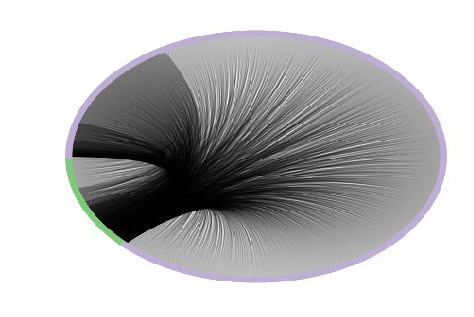

Notice how the nodes are colored - one in green, and one in purple? This is because they belong to different groups.


In [10]:
imagem = plt.imread(data_folder + "1_3.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("Notice how the nodes are colored - one in green, and one in purple? This is because they belong to different groups.")

#### Exercício 4 - Bipartite graphs

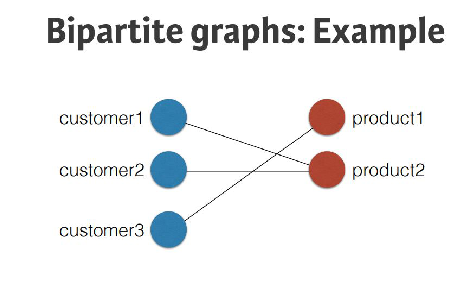

[(0, {'bipartite': 'customers'}), (1, {'bipartite': 'customers'}), (2, {'bipartite': 'customers'}), ('a', {'bipartite': 'products'}), ('b', {'bipartite': 'products'})]

Filtering graphs (customers): [0, 1, 2] 

Degree centrality of the filtered graph: {0: 0.0, 1: 0.0, 2: 0.0, 'b': 0.0, 'a': 0.0}


In [11]:
#vídeo

# Bipartite graphs
# ● A graph that is partitioned into two sets
# ● Nodes are only connected to nodes in other partitions
# ● Contrast: “unipartite”

# Bipartite graphs: Example
imagem = plt.imread(data_folder + "1_4.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Bipartite graphs in NetworkX
import networkx as nx

G = nx.Graph()
numbers = range(3)
letters = ['a', 'b']

G.add_nodes_from(numbers, bipartite='customers')
G.add_nodes_from(letters, bipartite='products')

print(G.nodes(data=True))

###################################################

# Degree centrality
# ● Definition: number of neighbors / number of possible neighbors
# ● Number of possible neighbors depends on graph type - no caso dos bipartidos corresponde ao outro grafo

# Bipartite centrality metrics
# ● Denominator: number of nodes in opposite partition, rather than all other nodes

# Filtering graphs
cust_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'customers'] 
print("\nFiltering graphs (customers):", cust_nodes, "\n")

print("Degree centrality of the filtered graph:", nx.bipartite.degree_centrality(G, cust_nodes)) #está mal


Exercício 5

In [12]:
# The bipartite keyword

# In the video, Eric introduced you to the 'bipartite' keyword. This keyword is part of a node's metadata dictionary, and 
# can be assigned both when you add a node and after the node is added. Remember, though, that by definition, in a bipartite
# graph, a node cannot be connected to another node in the same partition.

# Here, you're going to write a function that returns the nodes from a given partition in a bipartite graph. In this case, 
# the relevant partitions of the Github bipartite graph you'll be working with are 'projects' and 'users'.

##################################################

G = pickle.load(open(data_folder + "github_users.p", "rb" ))

# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.node[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

# Print the number of nodes in the 'projects' partition
print("number of nodes in the 'projects' partition:", len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print("number of nodes in the 'users' partition:", len(get_nodes_from_partition(G, 'users')))

print("\nEstou a usar outro ficheiro, que só tem 'users'. The 'users partition' has 56519 nodes.")

number of nodes in the 'projects' partition: 0
number of nodes in the 'users' partition: 56519

Estou a usar outro ficheiro, que só tem 'users'. The 'users partition' has 56519 nodes.


Exercício 6

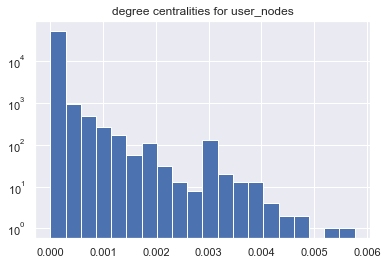

In [13]:
# Degree centrality distribution of user nodes

# Import matplotlib
import matplotlib.pyplot as plt

# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.title("degree centralities for user_nodes")
plt.show()

Exercício 7

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


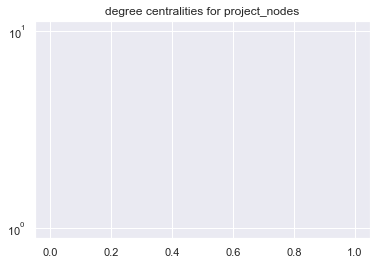

In [14]:
# Degree centrality distribution of project nodes

# Get the 'projects' nodes: project_nodes
project_nodes = get_nodes_from_partition(G, 'projects')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for project_nodes: project_dcs
project_dcs = [dcs[n] for n in project_nodes]

# Plot the degree distribution of project_dcs
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.title("degree centralities for project_nodes")
plt.show()

#### Exercício 8 - Bipartite graphs and recommendation systems

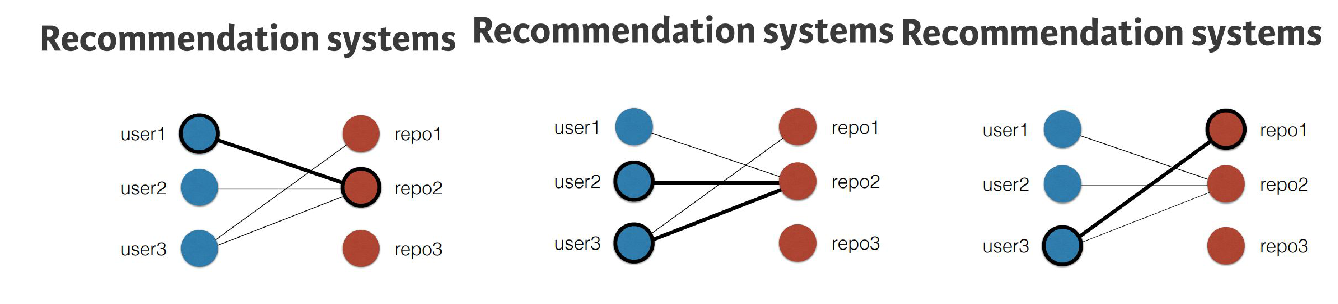

[(0, {'bipartite': 'customers'}), (1, {'bipartite': 'customers'}), (2, {'bipartite': 'customers'}), ('a', {'bipartite': 'products'}), ('b', {'bipartite': 'products'})]
[]


set()

In [15]:
#vídeo

# Recommendation systems
# ● Previously: Recommended users to connect with one another
# ● Graph: "unipartite" (or users-only) version
# ● Now: "bipartite" or (repo-users) version
# ● Recommending repositories for users to work on

# Recommendation systems
plt.subplot(1, 3, 1)
imagem = plt.imread(data_folder + "rs_1.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 3, 2)
imagem = plt.imread(data_folder + "rs_2.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 3, 3)
imagem = plt.imread(data_folder + "rs_3.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=-0.7, right=3, top=1, wspace=0, hspace=0)
plt.show()

#####################################

G = nx.Graph()
numbers = range(3)
letters = ['a', 'b']
G.add_nodes_from(numbers, bipartite='customers')
G.add_nodes_from(letters, bipartite='products')

# Code: Node sets
print(G.nodes(data=True))
print(G.edges())

user1_nbrs = G.neighbors('a') 
user1_nbrs

user3_nbrs = G.neighbors('b') 
user3_nbrs

set(user3_nbrs).difference(user1_nbrs)

Exercício 9

In [16]:
# Shared nodes in other partition

# G = pickle.load(open(data_folder + "github_users.p", "rb" ))
G = nx.read_gpickle(data_folder + 'github_users.p')

# Your job is to write a function that takes in two nodes, and returns the set of repository nodes that are shared between
# the two user nodes.

def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.node[node1]['bipartite'] == G.node[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

# number of shared repositories between users 'u7909' and 'u2148'
shared_rep = len(shared_partition_nodes(G, 'u7909', 'u2148'))  # alterei face à base de dados que usei

print("It looks like there are {} repositories shared between users 'u7909' and 'u2148'".format(shared_rep))

shared_partition_nodes(G, 'u7909', 'u2148')

It looks like there are 0 repositories shared between users 'u7909' and 'u2148'


set()

Exercício 10

In [17]:
%%script false
# User similarity metric

# Having written a function to calculate the set of nodes that are shared between two nodes, you're now going to write a 
# function to compute a metric of similarity between two users: the number of projects shared between two users divided by 
# the total number of nodes in the other partition. This can then be used to find users that are similar to one another.

# aqui n tenho os projetos

######################################

def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.node[user1]['bipartite'] == 'users'
    assert G.node[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(get_nodes_from_partition(G, 'projects'))

# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G, 'projects')
similarity_score = user_similarity(G, 'u4560', 'u1880', project_nodes)

print(similarity_score)  # pq n tenho os 'projects', mas deu 0 de qq das formas


Couldn't find program: 'false'


Exercício 11

In [18]:
%%script false
# Find similar users

# You're now going to build upon what you've learned so far to write a function called most_similar_users() that finds the
# users most similar to another given user.

# The beginnings of this function have been written for you. A list of nodes, user_nodes has been created, which contains 
# all of the users except the given user that has been passed into the function. Your task is to complete the function such
# that it finds the users most similar to this given user. You'll make use of your user_similarity() function from the
# previous exercise to help do this.

# A dictionary called similarities has been setup, in which the keys are the scores and the list of values are the nodes.

G = nx.read_gpickle(data_folder + 'github.p')

#######################################

from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.node[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

print(most_similar_users(G, 'u4560', user_nodes, project_nodes))


# --->  the users most similar to 'u4560' are 'u1570' 'u14984', 'u9525', 'u53', 'u363', and 'u2800'.

Couldn't find program: 'false'


Exercício 12

In [19]:
# Recommend repositories

def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

# Print the repositories to be recommended
print(recommend_repositories(G, 'u7909', 'u2148'))


{'u3929', 'u4711', 'u1618', 'u6468', 'u8951', 'u846'}


# CHAPTER 2 - Graph projections


#### Exercício 1 - Concept of projection

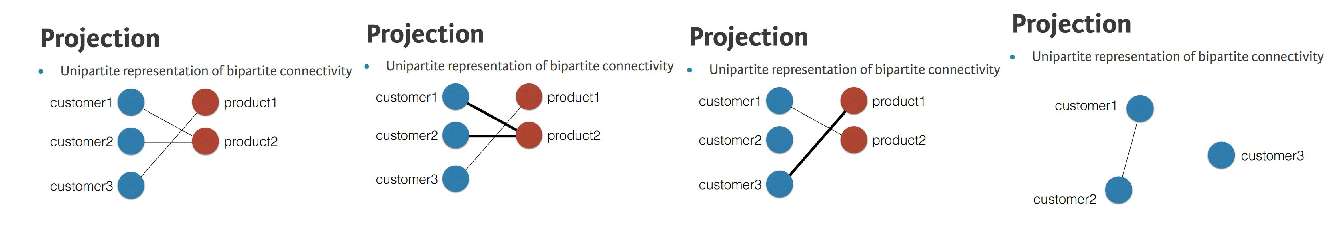

EdgeView([])

In [20]:
#vídeo

# Projection
# ● Useful to investigate the relationships between nodes on one partition
#    ● Conditioned on the connections to the nodes in the other partition

# ● Unipartite representation of bipartite connectivity
plt.subplot(1, 4, 1)
imagem = plt.imread(data_folder + "p_1.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 4, 2)
imagem = plt.imread(data_folder + "p_2.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 4, 3)
imagem = plt.imread(data_folder + "p_3.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplot(1, 4, 4)
imagem = plt.imread(data_folder + "p_4.jpg")
plt.axis('off')
plt.imshow(imagem)

plt.subplots_adjust(left=0, bottom=-1, right=3, top=1, wspace=0, hspace=0)
plt.show()

####################################

# Graphs on Disk
# ● Flat edge lists
# ● CSV files: nodelist + metadata, edgelist + metadata

# Reading network data
import networkx as nx

G = nx.read_edgelist(data_folder + 'american-revolution.txt')

# G.edges(data=True)[0:5] 
G.nodes(data=True)

#####################

# Bipartite projection
G.nodes() 
G.edges()
cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'customers'] 

G_cust = nx.bipartite.projected_graph(G, cust_nodes) 
G_cust.nodes() 
G_cust.edges() 

# Degree centrality
# ● Recall degree centrality definition:  (number of neighbors) / (number of possible neighbors)
# ● Denominator: number of nodes on opposite partition

# Bipartite degree centrality

# nx.bipartite.degree_centrality(G, cust_nodes) 
# nx.degree_centrality(G) 

Exercício 2

In [21]:
G = nx.read_edgelist(data_folder + 'american-revolution.edgelist')
G.add_nodes_from(['Collson.Adam', 'Sigourney.John', 'Purkitt.Henry', 'Vernon.Fortesque', 'Davis.Caleb','Williams.Thomas', 'Swan.James', 'Broomfield.Henry', 'Mackay.William','Tabor.Philip', 'Porter.Thomas', 'Eayres.Joseph', 'Fenno.Samuel', 'Pitts.Lendall', 'Loring.Matthew', 'Newell.Eliphelet', 'Hill.Alexander', 'Colesworthy.Gilbert', 'Boynton.Richard', 'Hendley.William', 'White.Samuel', 'Condy.JamesFoster', 'Etheridge.William', 'Simpson.Benjamin', 'Palms.Richard', 'Palmer.Joseph', 'Otis.James', 'Pulling.Richard', 'Whitwell.William', 'Lambert.John', 'Collier.Gershom', 'Russell.John', 'Symmes.John', 'Stanbridge.Henry', 'Jenkins.John', 'Grant.Moses', 'Slater.Peter', 'Pierce.William', 'Isaac.Pierce', 'Frothingham.Nathaniel', 'Hopkins.Caleb', 'Greene.Nathaniel', 'Williams.Jeremiah', 'Mason.Jonathan', 'Phillips.William', 'Pulling.John','Burbeck.Edward', 'Hitchborn.Thomas', 'Stearns.Phineas', 'Palfrey.William', 'Hunnewell.Richard', 'Tyler.Royall','Hammond.Samuel', 'Sprague.Samuel', 'Smith.John', 'Brown.Hugh', 'LongRoomClub','Breck.William', 'May.John', 'Pitts.John', 'Jarvis.Edward', 'Spear.Thomas', 'Wyeth.Joshua', 'Eckley.Unknown', 'Emmes.Samuel', 'Cochran.John', 'Revere.Paul', 'TeaParty', 'Gray.Wait', 'Adams.John', 'Sweetser.John', 'Champney.Caleb', 'Powell.William','McAlpine.William','Gould.William','Boit.John', 'Willis.Nathaniel', 'Young.Thomas', 'Ivers.James','Bradlee.Thomas', 'Waldo.Benjamin', 'Pearce.IsaacJun', 'Moore.Thomas', 'Marson.John','Molineux.William', 'Cooper.William', 'Prince.Job', 'Williams.Jonathan', 'Webb.Joseph', 'Baldwin.Cyrus', 'Avery.John', 'Collins.Ezra', 'Hancock.Eben', 'LoyalNine', 'Greenough.Newn', 'Greenleaf.William', 'Bradlee.Josiah', 'Johnston.Eben', 'Inglish.Alexander', 'Flagg.Josiah','Brimmer.Herman', 'Dolbear.Edward', 'Matchett.John', 'Starr.James', 'Noyces.Nat', 'Sharp.Gibbens', 'Warren.Joseph', 'Hoffins.John','Dexter.Samuel', 'Austin.Samuel', 'Phillips.Samuel', 'Lewis.Phillip', 'Doyle.Peter', 'Ash.Gilbert', 'Wheeler.Josiah', 'Machin.Thomas', 'Ruddock.Abiel', 'Crane.John', 'Chipman.Seth', 'Wingfield.William', 'Cheever.Ezekiel', 'Melville.Thomas', 'Greenleaf.Joseph', 'Morton.Perez','Peters.John', 'Howe.Edward', 'Potter.Edward', 'Spurr.John', 'Hobbs.Samuel','Marlton.John', 'Pierpont.Robert', 'Bruce.Stephen', 'Holmes.Nathaniel','Hunt.Abraham', 'Obear.Israel', 'Brimmer.Martin', 'Brown.John', 'Chadwell.Mr', 'Bell.William', 'Ballard.John', 'MacKintosh.Capt', 'Pearce.Isaac','Parker.Jonathan', 'Symmes.Eben', 'Phillips.John', 'Prince.John', 'Hicks.John', 'Foster.Samuel', 'Tileston.Thomas', 'Hoskins.William', 'Prentiss.Henry','Merrit.John','Whitten.John', 'BostonCommittee', 'Bewer.James', 'Foster.Bos','Chase.Thomas', 'Partridge.Sam', 'Winslow.John', 'Hunnewell.Jonathan','Hickling.William', 'Lowell.John', 'Payson.Joseph', 'Mountford.Joseph', 'MacNeil.Archibald', 'Allen.Dr', 'Moody.Samuel','Peck.Samuel', 'Bradlee.David', 'Barnard.Samuel', 'Appleton.Nathaniel', 'Deshon.Moses', 'Austin.Benjamin', 'Marshall.Thomas', 'Bradlee.Nathaniel', 'Jefferds.Unknown', 'Milliken.Thomas', 'Lincoln.Amos', 'Brown.Enoch', 'Whitwell.Samuel', 'Roylson.Thomas', 'Brackett.Jos', 'Kimball.Thomas', 'Crafts.Thomas', 'Shed.Joseph', 'Sloper.Ambrose','Hewes.George', 'Burbeck.William', 'Cleverly.Stephen', 'Campbell.Nicholas', 'Seward.James', 'Marett.Phillip', 'Cazneau.Capt', 'Quincy.Josiah', 'Trott.George', 'Edes.Benjamin', 'LondonEnemies', 'Pitts.Samuel', 'Roby.Joseph', 'Burt.Benjamin', 'Stoddard.Jonathan', 'Parkman.Elias', 'Ferrell.Ambrose', 'Callendar.Elisha', 'Nicholls.Unknown','Ham.William', 'Burton.Benjamin', 'Chrysty.Thomas', 'Kent.Benjamin', 'Hitchborn.Nathaniel', 'Church.Benjamin', 'Davis.Edward', 'Cooper.Samuel', 'Randall.John', 'Hunstable.Thomas', 'Winthrop.John', 'Peck.Thomas', 'Morse.Anthony', 'StAndrewsLodge', 'Russell.William', 'Jarvis.Charles', 'Hooton.John', 'Kinnison.David', 'Dennie.William', 'Lee.Joseph', 'Boyer.Peter', 'Blake.Increase', 'Stevens.Ebenezer', 'Proctor.Edward', 'Dawes.Thomas', 'Ingersoll.Daniel', 'Davis.Robert', 'Welles.Henry', 'Cailleteau.Edward','Graham.James','NorthCaucus', 'Gill.Moses', 'Kerr.Walter', 'Davis.William', 'Story.Elisha', 'Johonnott.Gabriel', 'Stoddard.Asa', 'Adams.Samuel', 'Sessions.Robert', 'Wendell.Oliver', 'Bray.George', 'Gammell.John', 'Bolter.Thomas', 'Field.Joseph', 'Barrett.Samuel', 'Fleet.Thomas', 'Gore.Samuel', 'Clarke.Benjamin', 'Howard.Samuel','Bass.Henry', 'Barber.Nathaniel', 'Urann.Thomas', 'Bradford.John', 'Webster.Thomas', 'Eaton.Joseph', 'Hancock.John'])
G.add_edges_from([('Collson.Adam', 'TeaParty'), ('Collson.Adam', 'NorthCaucus'), ('Sigourney.John', 'NorthCaucus'), ('Purkitt.Henry', 'TeaParty'), ('Vernon.Fortesque', 'LondonEnemies'), ('Davis.Caleb', 'BostonCommittee'), ('Davis.Caleb', 'LondonEnemies'), ('Williams.Thomas', 'TeaParty'), ('Swan.James', 'TeaParty'), ('Swan.James', 'NorthCaucus'),('Broomfield.Henry', 'LondonEnemies'), ('Mackay.William', 'BostonCommittee'), ('Tabor.Philip', 'StAndrewsLodge'), ('Porter.Thomas', 'TeaParty'), ('Eayres.Joseph', 'TeaParty'), ('Eayres.Joseph', 'LondonEnemies'), ('Fenno.Samuel', 'TeaParty'), ('Pitts.Lendall', 'TeaParty'), ('Loring.Matthew', 'TeaParty'), ('Newell.Eliphelet', 'TeaParty'), ('Hill.Alexander', 'BostonCommittee'), ('Colesworthy.Gilbert', 'TeaParty'), ('Boynton.Richard', 'BostonCommittee'), ('Boynton.Richard', 'LondonEnemies'), ('Hendley.William', 'TeaParty'), ('White.Samuel', 'NorthCaucus'), ('Condy.JamesFoster', 'TeaParty'), ('Condy.JamesFoster', 'LondonEnemies'), ('Condy.JamesFoster', 'NorthCaucus'), ('Etheridge.William', 'TeaParty'), ('Simpson.Benjamin', 'TeaParty'), ('Palms.Richard', 'NorthCaucus'), ('Palmer.Joseph', 'TeaParty'), ('Otis.James', 'BostonCommittee'), ('Otis.James', 'LongRoomClub'),('Pulling.Richard', 'StAndrewsLodge'), ('Whitwell.William', 'LondonEnemies'),('Lambert.John', 'LongRoomClub'), ('Collier.Gershom', 'TeaParty'), ('Russell.John', 'TeaParty'), ('Symmes.John', 'NorthCaucus'), ('Stanbridge.Henry', 'StAndrewsLodge'), ('Jenkins.John', 'StAndrewsLodge'), ('Grant.Moses', 'TeaParty'), ('Grant.Moses', 'LondonEnemies'), ('Grant.Moses', 'NorthCaucus'), ('Slater.Peter', 'TeaParty'),('Pierce.William', 'TeaParty'), ('Isaac.Pierce', 'LondonEnemies'), ('Frothingham.Nathaniel', 'TeaParty'), ('Hopkins.Caleb', 'LondonEnemies'), ('Greene.Nathaniel', 'TeaParty'), ('Williams.Jeremiah', 'TeaParty'), ('Mason.Jonathan', 'LondonEnemies'), ('Phillips.William', 'LondonEnemies'), ('Pulling.John', 'NorthCaucus'), ('Pulling.John', 'LondonEnemies'), ('Burbeck.Edward', 'StAndrewsLodge'), ('Hitchborn.Thomas', 'NorthCaucus'), ('Stearns.Phineas', 'TeaParty'), ('Palfrey.William', 'StAndrewsLodge'), ('Hunnewell.Richard', 'TeaParty'), ('Tyler.Royall', 'LongRoomClub'), ('Hammond.Samuel', 'TeaParty'), ('Sprague.Samuel', 'TeaParty'), ('Smith.John', 'LoyalNine'), ('Brown.Hugh', 'StAndrewsLodge'), ('LongRoomClub', 'Quincy.Josiah'), ('LongRoomClub', 'Cooper.Samuel'), ('LongRoomClub', 'Dawes.Thomas'), ('LongRoomClub', 'Fleet.Thomas'), ('LongRoomClub', 'Revere.Paul'), ('LongRoomClub', 'Cooper.William'), ('LongRoomClub', 'Adams.John'),('LongRoomClub', 'Warren.Joseph'), ('LongRoomClub', 'Dexter.Samuel'), ('LongRoomClub', 'Adams.Samuel'), ('LongRoomClub', 'Winslow.John'), ('LongRoomClub', 'Phillips.Samuel'), ('LongRoomClub', 'Hancock.John'), ('LongRoomClub', 'Church.Benjamin'), ('Breck.William', 'NorthCaucus'), ('May.John', 'TeaParty'), ('Pitts.John', 'LondonEnemies'), ('Jarvis.Edward', 'StAndrewsLodge'), ('Spear.Thomas', 'TeaParty'), ('Wyeth.Joshua', 'TeaParty'), ('Eckley.Unknown', 'TeaParty'), ('Emmes.Samuel', 'NorthCaucus'), ('Cochran.John', 'TeaParty'), ('Revere.Paul', 'TeaParty'), ('Revere.Paul', 'LondonEnemies'), ('Revere.Paul', 'StAndrewsLodge'), ('Revere.Paul', 'NorthCaucus'), ('TeaParty', 'Prince.John'), ('TeaParty', 'Hicks.John'), ('TeaParty', 'Foster.Samuel'), ('TeaParty', 'Peters.John'), ('TeaParty', 'Bewer.James'), ('TeaParty', 'Chase.Thomas'),('TeaParty', 'Hunnewell.Jonathan'), ('TeaParty', 'Barnard.Samuel'), ('TeaParty', 'Mountford.Joseph'), ('TeaParty', 'Peck.Samuel'), ('TeaParty', 'Bradlee.David'), ('TeaParty', 'Gammell.John'), ('TeaParty', 'Bradlee.Nathaniel'), ('TeaParty', 'MacNeil.Archibald'), ('TeaParty', 'Lincoln.Amos'), ('TeaParty', 'Ingersoll.Daniel'), ('TeaParty', 'Shed.Joseph'), ('TeaParty', 'Proctor.Edward'), ('TeaParty', 'Hewes.George'), ('TeaParty', 'Molineux.William'), ('TeaParty', 'Parker.Jonathan'), ('TeaParty', 'Hobbs.Samuel'), ('TeaParty', 'Payson.Joseph'), ('TeaParty', 'Roby.Joseph'), ('TeaParty', 'Burton.Benjamin'), ('TeaParty', 'Willis.Nathaniel'), ('TeaParty', 'Young.Thomas'), ('TeaParty', 'Campbell.Nicholas'), ('TeaParty', 'Bradlee.Thomas'), ('TeaParty', 'Cooper.Samuel'), ('TeaParty', 'Randall.John'), ('TeaParty', 'Hunstable.Thomas'),('TeaParty', 'Morse.Anthony'), ('TeaParty', 'Russell.William'), ('TeaParty', 'Sessions.Robert'), ('TeaParty', 'Hooton.John'), ('TeaParty', 'Kinnison.David'),('TeaParty', 'Lee.Joseph'), ('TeaParty', 'Clarke.Benjamin'), ('TeaParty', 'Stevens.Ebenezer'), ('TeaParty', 'Bradlee.Josiah'), ('TeaParty', 'Davis.Robert'), ('TeaParty', 'Moore.Thomas'),('TeaParty', 'Dolbear.Edward'), ('TeaParty', 'Starr.James'), ('TeaParty', 'Story.Elisha'),('TeaParty', 'Howard.Samuel'), ('TeaParty', 'MacKintosh.Capt'), ('TeaParty', 'Howe.Edward'), ('TeaParty', 'Wheeler.Josiah'), ('TeaParty', 'Prentiss.Henry'), ('TeaParty', 'Machin.Thomas'),('TeaParty', 'Bolter.Thomas'), ('TeaParty', 'Crane.John'),('TeaParty', 'Gore.Samuel'), ('TeaParty', 'Bass.Henry'), ('TeaParty', 'Spurr.John'), ('TeaParty', 'Barber.Nathaniel'), ('TeaParty', 'Hunt.Abraham'), ('TeaParty', 'Bruce.Stephen'), ('TeaParty', 'Melville.Thomas'), ('TeaParty', 'Eaton.Joseph'), ('TeaParty', 'Urann.Thomas'), ('Gray.Wait', 'StAndrewsLodge'), ('Adams.John', 'NorthCaucus'), ('Sweetser.John', 'BostonCommittee'), ('Champney.Caleb', 'NorthCaucus'), ('Powell.William', 'BostonCommittee'), ('Powell.William', 'LondonEnemies'), ('McAlpine.William', 'StAndrewsLodge'), ('Gould.William', 'StAndrewsLodge'), ('Boit.John', 'NorthCaucus'), ('Young.Thomas', 'BostonCommittee'), ('Young.Thomas', 'NorthCaucus'), ('Ivers.James', 'LondonEnemies'), ('Waldo.Benjamin', 'LondonEnemies'), ('Pearce.IsaacJun', 'NorthCaucus'),('Marson.John', 'LondonEnemies'), ('Molineux.William', 'BostonCommittee'), ('Molineux.William', 'NorthCaucus'), ('Prince.Job', 'LondonEnemies'), ('Williams.Jonathan', 'LondonEnemies'), ('Webb.Joseph', 'StAndrewsLodge'), ('Baldwin.Cyrus', 'LondonEnemies'), ('Avery.John', 'LoyalNine'), ('Avery.John', 'LondonEnemies'), ('Collins.Ezra', 'StAndrewsLodge'), ('Hancock.Eben', 'LondonEnemies'), ('LoyalNine', 'Bass.Henry'), ('LoyalNine', 'Welles.Henry'), ('LoyalNine', 'Field.Joseph'), ('LoyalNine', 'Edes.Benjamin'), ('LoyalNine', 'Trott.George'), ('LoyalNine', 'Cleverly.Stephen'),('LoyalNine', 'Crafts.Thomas'), ('LoyalNine', 'Chase.Thomas'), ('Greenough.Newn', 'LondonEnemies'), ('Greenleaf.William', 'BostonCommittee'),('Greenleaf.William', 'LondonEnemies'), ('Johnston.Eben', 'LondonEnemies'), ('Inglish.Alexander', 'StAndrewsLodge'), ('Flagg.Josiah', 'StAndrewsLodge'), ('Brimmer.Herman', 'LondonEnemies'), ('Matchett.John', 'NorthCaucus'), ('Noyces.Nat', 'LondonEnemies'), ('Sharp.Gibbens', 'NorthCaucus'), ('Warren.Joseph', 'NorthCaucus'),('Warren.Joseph', 'BostonCommittee'), ('Warren.Joseph', 'LondonEnemies'), ('Warren.Joseph', 'StAndrewsLodge'), ('Hoffins.John', 'StAndrewsLodge'), ('Austin.Samuel', 'LondonEnemies'), ('Lewis.Phillip', 'StAndrewsLodge'), ('Doyle.Peter', 'StAndrewsLodge'), ('Ash.Gilbert', 'StAndrewsLodge'), ('Ruddock.Abiel', 'NorthCaucus'), ('Ruddock.Abiel', 'LondonEnemies'),('Chipman.Seth', 'StAndrewsLodge'), ('Wingfield.William', 'StAndrewsLodge'), ('Cheever.Ezekiel', 'NorthCaucus'), ('Cheever.Ezekiel', 'LondonEnemies'), ('Greenleaf.Joseph', 'NorthCaucus'), ('Greenleaf.Joseph', 'BostonCommittee'), ('Greenleaf.Joseph', 'LondonEnemies'),('Morton.Perez', 'NorthCaucus'), ('Potter.Edward', 'StAndrewsLodge'), ('Marlton.John', 'StAndrewsLodge'), ('Pierpont.Robert', 'BostonCommittee'), ('Holmes.Nathaniel', 'NorthCaucus'), ('Obear.Israel', 'StAndrewsLodge'),('Brimmer.Martin', 'LondonEnemies'), ('Brown.John', 'LondonEnemies'), ('Chadwell.Mr', 'NorthCaucus'), ('Bell.William', 'StAndrewsLodge'), ('Ballard.John', 'NorthCaucus'), ('Pearce.Isaac', 'NorthCaucus'), ('Symmes.Eben', 'NorthCaucus'),('Phillips.John', 'StAndrewsLodge'), ('Tileston.Thomas', 'NorthCaucus'),('Hoskins.William', 'NorthCaucus'), ('Merrit.John', 'NorthCaucus'), ('Whitten.John', 'StAndrewsLodge'),('BostonCommittee', 'Quincy.Josiah'),('BostonCommittee', 'Bradford.John'), ('BostonCommittee', 'Appleton.Nathaniel'), ('BostonCommittee', 'Barber.Nathaniel'),('BostonCommittee', 'Dennie.William'), ('BostonCommittee', 'Wendell.Oliver'), ('BostonCommittee', 'Adams.Samuel'),('BostonCommittee', 'Church.Benjamin'), ('Foster.Bos', 'LondonEnemies'),('Chase.Thomas', 'LondonEnemies'), ('Chase.Thomas', 'NorthCaucus'), ('Partridge.Sam', 'LondonEnemies'), ('Hickling.William', 'NorthCaucus'), ('Lowell.John', 'NorthCaucus'), ('Allen.Dr', 'NorthCaucus'), ('Moody.Samuel', 'StAndrewsLodge'), ('Peck.Samuel', 'StAndrewsLodge'),('Appleton.Nathaniel', 'NorthCaucus'),('Deshon.Moses', 'StAndrewsLodge'), ('Austin.Benjamin', 'LondonEnemies'), ('Marshall.Thomas', 'LondonEnemies'), ('Jefferds.Unknown', 'StAndrewsLodge'),('Milliken.Thomas', 'StAndrewsLodge'), ('Brown.Enoch', 'LondonEnemies'),('Whitwell.Samuel', 'LondonEnemies'),('Roylson.Thomas', 'LondonEnemies'), ('Brackett.Jos', 'LondonEnemies'), ('Kimball.Thomas', 'NorthCaucus'),('Crafts.Thomas', 'StAndrewsLodge'), ('Sloper.Ambrose', 'StAndrewsLodge'), ('Burbeck.William', 'StAndrewsLodge'),('Seward.James', 'StAndrewsLodge'), ('Marett.Phillip', 'StAndrewsLodge'), ('Cazneau.Capt', 'NorthCaucus'), ('Edes.Benjamin', 'NorthCaucus'),('LondonEnemies', 'Pitts.Samuel'), ('LondonEnemies', 'Parkman.Elias'), ('LondonEnemies', 'Church.Benjamin'), ('LondonEnemies', 'Jarvis.Charles'),('LondonEnemies', 'Davis.Edward'), ('LondonEnemies', 'Barrett.Samuel'), ('LondonEnemies', 'Boyer.Peter'), ('LondonEnemies', 'Proctor.Edward'), ('LondonEnemies', 'Gill.Moses'), ('LondonEnemies', 'Davis.William'),('LondonEnemies', 'Adams.Samuel'), ('LondonEnemies', 'Bass.Henry'), ('LondonEnemies', 'Barber.Nathaniel'), ('LondonEnemies', 'Winthrop.John'),('LondonEnemies', 'Bradford.John'), ('LondonEnemies', 'Wendell.Oliver'), ('LondonEnemies', 'Hancock.John'), ('Burt.Benjamin', 'NorthCaucus'),('Stoddard.Jonathan', 'NorthCaucus'), ('Parkman.Elias', 'NorthCaucus'), ('Ferrell.Ambrose', 'StAndrewsLodge'), 
                  ('Callendar.Elisha', 'StAndrewsLodge'), ('Nicholls.Unknown', 'StAndrewsLodge'), ('Ham.William', 'StAndrewsLodge'), ('Chrysty.Thomas', 'NorthCaucus'), ('Kent.Benjamin', 'NorthCaucus'), ('Hitchborn.Nathaniel', 'StAndrewsLodge'), ('Church.Benjamin', 'NorthCaucus'), ('Winthrop.John', 'NorthCaucus'), ('Peck.Thomas', 'NorthCaucus'),('StAndrewsLodge', 'Blake.Increase'), ('StAndrewsLodge', 'Welles.Henry'),('StAndrewsLodge', 'Graham.James'), ('StAndrewsLodge', 'Kerr.Walter'),('StAndrewsLodge', 'Bray.George'), ('StAndrewsLodge', 'Cailleteau.Edward'), ('StAndrewsLodge', 'Barrett.Samuel'), ('StAndrewsLodge', 'Webster.Thomas'), ('StAndrewsLodge', 'Urann.Thomas'), ('Dennie.William', 'NorthCaucus'), ('Proctor.Edward', 'NorthCaucus'), ('NorthCaucus', 'Story.Elisha'), ('NorthCaucus', 'Johonnott.Gabriel'), ('NorthCaucus', 'Stoddard.Asa'),('NorthCaucus', 'Adams.Samuel'), ('NorthCaucus', 'Bass.Henry'), ('NorthCaucus', 'Barber.Nathaniel'), ('NorthCaucus', 'Urann.Thomas')])


In [22]:
# Reading graphs

# Import networkx
import networkx as nx

# Assign nodes to 'clubs' or 'people' partitions
for n, d in G.nodes(data=True):
    if '.' in n:
        G.node[n]['bipartite'] = 'people'
    else:
        G.node[n]['bipartite'] = 'clubs'
        
# Print the edges of the graph
print(G.edges())
print("\n Take a look at the edges of this graph. Do you see any familiar names?")

[('Collson.Adam', 'TeaParty'), ('Collson.Adam', 'NorthCaucus'), ('Sigourney.John', 'NorthCaucus'), ('Purkitt.Henry', 'TeaParty'), ('Vernon.Fortesque', 'LondonEnemies'), ('Davis.Caleb', 'BostonCommittee'), ('Davis.Caleb', 'LondonEnemies'), ('Williams.Thomas', 'TeaParty'), ('Swan.James', 'TeaParty'), ('Swan.James', 'NorthCaucus'), ('Broomfield.Henry', 'LondonEnemies'), ('Mackay.William', 'BostonCommittee'), ('Tabor.Philip', 'StAndrewsLodge'), ('Porter.Thomas', 'TeaParty'), ('Eayres.Joseph', 'TeaParty'), ('Eayres.Joseph', 'LondonEnemies'), ('Fenno.Samuel', 'TeaParty'), ('Pitts.Lendall', 'TeaParty'), ('Loring.Matthew', 'TeaParty'), ('Newell.Eliphelet', 'TeaParty'), ('Hill.Alexander', 'BostonCommittee'), ('Colesworthy.Gilbert', 'TeaParty'), ('Boynton.Richard', 'BostonCommittee'), ('Boynton.Richard', 'LondonEnemies'), ('Hendley.William', 'TeaParty'), ('White.Samuel', 'NorthCaucus'), ('Condy.JamesFoster', 'TeaParty'), ('Condy.JamesFoster', 'LondonEnemies'), ('Condy.JamesFoster', 'NorthCaucus'

Exercício 3

In [23]:
# Computing projection

# It's now time to to try your hand at computing the projection of a bipartite graph to the nodes on one of its partitions. 
# This will help you gain practice with converting between a bipartite version of a graph and its unipartite projections. 
# Remember from the video that the "projection" of a graph onto one of its partitions is the connectivity of the nodes in 
# that partition conditioned on connections to nodes on the other partition. 
# Made more concretely, you can think of the "connectivity of customers based on shared purchases".

#######################

# Prepare the nodelists needed for computing projections: people, clubs
people = [n for n in G.nodes() if G.node[n]['bipartite'] == 'people']

clubs = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'clubs']  #  Note: This is simply an alternate way of 
# creating the nodelist. You do not have to iterate over the metadata - you can follow the same approach you used to create
# the people nodelist, simply checking for 'clubs' instead. We're asking you to use the other approach here so you get 
# practice with both.

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(G, people)
clubsG = nx.bipartite.projected_graph(G, clubs)


Exercício 4

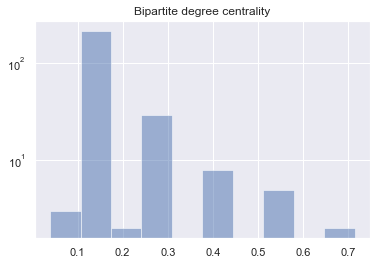

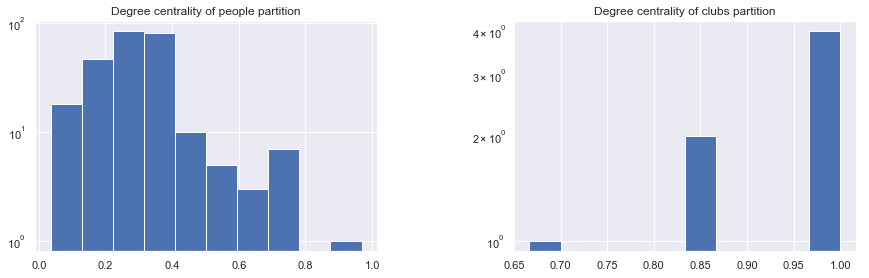

Note that the distributions are quite different from one another. The disjoint histogram from the clubsG graph 
stems from its small number of nodes (only 7), while the peopleG histogram is more contiguous because of the large number 
of nodes in there. The bipartite degree centrality histogram has discrete values: this again stems from having only a small
number of clubs nodes that the people nodes can connect to.


In [24]:
# Plot degree centrality on projection

# Here, you're going to compare the degree centrality distributions for each of the following graphs: the original graph G, 
# the people graph projection peopleG, and the clubs graph projection clubsG. This will reinforce the difference in degree 
# centrality score computation between bipartite and unipartite versions of degree centrality metrics.

########################################

import matplotlib.pyplot as plt 

# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure()
original_dc = nx.bipartite.degree_centrality(G, people)
plt.hist(list(original_dc.values()), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show()


# Plot the degree centrality distribution of the peopleG graph
plt.figure()  
plt.subplot(1, 2, 1)
people_dc = nx.degree_centrality(peopleG)
plt.hist(list(people_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of people partition')


# Plot the degree centrality distribution of the clubsG graph
plt.subplot(1, 2, 2)
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(list(clubs_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of clubs partition')

plt.subplots_adjust(left=0, bottom=0.2, right=1.9, top=1, wspace=0.4, hspace=0)
plt.show()

print("""Note that the distributions are quite different from one another. The disjoint histogram from the clubsG graph 
stems from its small number of nodes (only 7), while the peopleG histogram is more contiguous because of the large number 
of nodes in there. The bipartite degree centrality histogram has discrete values: this again stems from having only a small
number of clubs nodes that the people nodes can connect to.""")

#### Exercício 5 - Bipartite graphs as matrices

In [25]:
#vídeo

# Matrix representation
# ● Rows: nodes on one partition
# ● Columns: nodes on other partition
# ● Cells: 1 if edge present, else 0

E = nx.Graph()
numbers = range(3)
letters = ['a', 'b']
E.add_nodes_from(numbers, bipartite='customers')
E.add_nodes_from(letters, bipartite='products')

# Example code
cust_nodes = [n for n in E.nodes() if E.node[n]['bipartite'] == 'customers'] 
prod_nodes = [n for n in E.nodes() if E.node[n]['bipartite'] == 'products']  

mat = nx.bipartite.biadjacency_matrix(E, row_order=cust_nodes, column_order=prod_nodes) 

mat  
# <3x2 sparse matrix of type '<class 'numpy.int64'>'
#  with 3 stored elements in Compressed Sparse Row format>

# Matrix projection
# ● Projection computable using matrix multiplication

# Matrix multiplication in Python
mat @ mat.T 

mat.T @ mat


<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

Exercício 6

In [26]:
# Properties of bipartite adjacency matrices.

# Let's recap concepts about bipartite graphs and their adjacency matrices.
# Which of the following statements best describes bipartite adjacency matrices?

print("""Bipartite graph adjacency matrices are often asymmetric
      (because there are more ways to construct an asymmetric bipartite graph than a symmetric one.).""")

Bipartite graph adjacency matrices are often asymmetric
      (because there are more ways to construct an asymmetric bipartite graph than a symmetric one.).


Exercício 7

In [27]:
# Compute adjacency matrix

# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G, 'people')
clubs_nodes = get_nodes_from_partition(G, 'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T

print(user_matrix)


  (0, 235)	1
  (0, 234)	1
  (0, 233)	1
  (0, 217)	1
  (0, 211)	1
  (0, 210)	1
  (0, 205)	1
  (0, 203)	1
  (0, 202)	1
  (0, 196)	1
  (0, 195)	1
  (0, 194)	1
  (0, 191)	1
  (0, 188)	1
  (0, 178)	1
  (0, 166)	1
  (0, 161)	1
  (0, 157)	1
  (0, 156)	1
  (0, 148)	1
  (0, 146)	1
  (0, 145)	1
  (0, 140)	1
  (0, 138)	1
  (0, 136)	1
  :	:
  (253, 35)	1
  (253, 28)	1
  (253, 21)	1
  (253, 18)	1
  (253, 11)	1
  (253, 7)	1
  (253, 4)	1
  (253, 3)	1
  (253, 253)	2
  (253, 243)	1
  (253, 235)	2
  (253, 223)	1
  (253, 207)	1
  (253, 205)	2
  (253, 189)	1
  (253, 154)	1
  (253, 107)	1
  (253, 105)	1
  (253, 103)	2
  (253, 83)	1
  (253, 67)	1
  (253, 65)	2
  (253, 51)	1
  (253, 29)	1
  (253, 26)	1


Exercício 8

In [28]:
# Find shared membership: Transposition

# As you may have observed, you lose the metadata from a graph when you go to a sparse matrix representation. You're now 
# going to learn how to impute the metadata back so that you can learn more about shared membership.

import numpy as np

# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal() 
indices = np.where(diag == diag.max())[0]  

print('Number of clubs: {}'.format(diag.max()))

print('\nPeople with the most number of memberships:')
for i in indices:
    print('- {}'.format(people_nodes[i]))

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()

# Find pairs of users who shared membership in the most number of clubs
indices = np.where(users_coo.data == users_coo.data.max())[0]

print('\nPeople with most number of shared memberships:')
for idx in indices:
    print('- {}, {}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]]))  


Number of clubs: 5

People with the most number of memberships:
- Revere.Paul
- Warren.Joseph

People with most number of shared memberships:
- Revere.Paul, Warren.Joseph
- Warren.Joseph, Adams.Samuel
- Warren.Joseph, Church.Benjamin
- Warren.Joseph, Revere.Paul
- Chase.Thomas, Bass.Henry
- Church.Benjamin, Adams.Samuel
- Church.Benjamin, Warren.Joseph
- Adams.Samuel, Church.Benjamin
- Adams.Samuel, Warren.Joseph
- Bass.Henry, Chase.Thomas


#### Exercício 9 - Representing network data with pandas

In [29]:
#vídeo

# CSV files for network data storage
# ● Advantages:
#   ● Human-readable
#   ● Do further analysis with pandas
# ● Disadvantages:
#   ● Repetitive; disk space
# ● Two DataFrames: node and edge lists

# ● Node list
#   ● Each row is one node
#   ● The columns represent metadata a!ached to that node
# ● Edge list
#   ● Each row is one edge
#   ● The columns represent the metadata attached to that edge

# Pandas and graphs
E.nodes(data=True) 

nodelist = [] 

for n, d in E.nodes(data=True):
    node_data = dict()
    node_data['node'] = n
    node_data.update(d)
    nodelist.append(node_data)

print(nodelist, "\n")

import pandas as pd

pd.DataFrame(nodelist)

# pd.DataFrame(nodelist).to_csv('my_file.csv')

[{'node': 0, 'bipartite': 'customers'}, {'node': 1, 'bipartite': 'customers'}, {'node': 2, 'bipartite': 'customers'}, {'node': 'a', 'bipartite': 'products'}, {'node': 'b', 'bipartite': 'products'}] 



,bipartite,node
0,customers,0
1,customers,1
2,customers,2
3,products,a
4,products,b


Exercício 10

In [30]:
# Make nodelist

peopleG = nx.bipartite.projected_graph(G, people)

# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in peopleG.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
node_df.head()


,bipartite,person
0,people,Collson.Adam
1,people,Sigourney.John
2,people,Purkitt.Henry
3,people,Vernon.Fortesque
4,people,Davis.Caleb


Exercício 11

In [31]:
# Make edgelist

# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in peopleG.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
    
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)

edge_df.head()

,node1,node2
0,Collson.Adam,Revere.Paul
1,Collson.Adam,Bradlee.David
2,Collson.Adam,Hunnewell.Richard
3,Collson.Adam,Stoddard.Asa
4,Collson.Adam,Stoddard.Jonathan


# Chapter 3 - Comparing graphs & time-dynamic graphs

#### Exercício 1 - Introduction to graph differences

In [32]:
%%script false
#vídeo

# Time series analysis
# ● How some number changes as a function of time
#   ● Is there an upward or downward trend?
# ● Rate of change of things over a sliding window of time
# ● Examples:
#   ● Tracking weight over time
#   ● Tracking stock investment portfolio value over time

# Evolving graphs
# ● Graphs that change over time: communication networks
# ● Assumptions:
#   ● Edge changes over time; assume nodes stay constant
#   ● Both edges and nodes change over time

#############################

# Graph differences
# ● Graphs are comprised of:
#   ● A node set
#   ● An edge set
# ● If a node set doesn’t change:
#   ● Changing only the edge set will result in a change in the graph 

# ● Analogy: set differences
set(c1, c2, c3).difference(set(c2, c3, c4)) = set(c1)
set(c2, c3, c4).difference(set(c1, c2, c3)) = set(c4)

# ● In NetworkX: .difference(G1, G2) function
#   ● Assumes G1 and G2 have equal node sets 

# Graph differences in Python

G1.edges()
G2.edges()

G2minusG1 = nx.difference(G2, G1)
G1minusG2 = nx.difference(G1, G2)


Couldn't find program: 'false'


Exercício 2

In [33]:
# created a similar df
data = pd.read_csv(data_folder + "mensagens.csv").drop("Unnamed: 0", axis=1)

data.head()

,sender,recipient,time,year,month,day,hour,minute,second
0,1,2,2004-09-28 03:12:24,2004.0,9.0,28.0,3.0,12.0,24.0
1,3,4,2004-09-21 07:22:57,2004.0,9.0,21.0,7.0,22.0,57.0
2,5,2,2004-07-11 21:06:48,2004.0,7.0,11.0,21.0,6.0,48.0
3,6,7,2004-06-02 12:23:03,2004.0,6.0,2.0,12.0,23.0,3.0
4,8,7,2004-04-20 03:54:37,2004.0,4.0,20.0,3.0,54.0,37.0


In [34]:
# List of graphs

# In this set of exercises, you'll use a college messaging dataset to learn how to filter graphs for time series analysis.
# In this dataset, nodes are students, and edges denote messages being sent from one student to another. The graph as it
# stands right now captures all communications at all time points.

######################################

import networkx as nx 

months = range(4, 11)

# Initialize an empty list: Gs
Gs = [] 
for month in months:
    # Instantiate a new undirected graph: G
    G = nx.Graph()
    
    # Add in all nodes that have ever shown up to the graph
    G.add_nodes_from(data['sender'])
    G.add_nodes_from(data['recipient'])
    
    # Filter the DataFrame so that there's only the given month
    df_filtered = data[data['month'] == month]
    
    # Add edges from filtered DataFrame
    G.add_edges_from(zip(df_filtered['sender'], df_filtered['recipient']))
    
    # Append G to the list of graphs
    Gs.append(G)
    
print(len(Gs))


7


Exercício 3

In [35]:
# Graph differences over time

# Now, you'll compute the graph differences over time! To look at the simplest case, here you'll use a window of (month, 
# month + 1), and then keep track of the edges gained or lost over time. This exercise is preparation for the next exercise,
# in which you will visualize the changes over time.

##########################################

import networkx as nx  
# Instantiate a list of graphs that show edges added: added
added = []
# Instantiate a list of graphs that show edges removed: removed
removed = []
# Here's the fractional change over time
fractional_changes = []
window = 1  
i = 0      

for i in range(len(Gs) - window):
    g1 = Gs[i]
    g2 = Gs[i + window]
        
    # Compute graph difference here
    added.append(nx.difference(g2, g1))   
    removed.append(nx.difference(g1, g2))
    
    # Compute change in graph size over time
    fractional_changes.append((len(g2.edges()) - len(g1.edges())) / len(g1.edges()))
    
# Print the fractional change
print(fractional_changes)


[0.5887511339582704, -0.007803578226113437, 0.026664108958373296, -0.021300448430493273, -0.009163802978235968, -0.10327552986512524]


Exercício 4

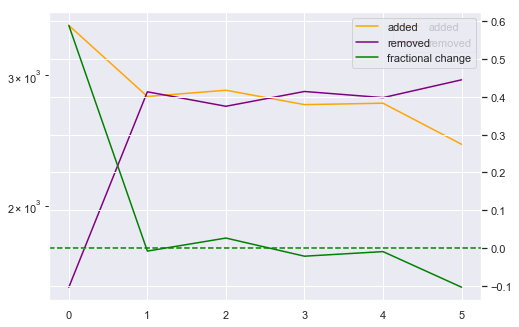

In [36]:
# Plot number of edge changes over time

# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the number of edges added over time
edges_added = [len(g.edges()) for g in added]
plot1 = ax1.plot(edges_added, label='added', color='orange')

# Plot the number of edges removed over time
edges_removed = [len(g.edges()) for g in removed]
plot2 = ax1.plot(edges_removed, label='removed', color='purple')

# Set yscale to logarithmic scale
ax1.set_yscale('log')  
ax1.legend()

# 2nd axes shares x-axis with 1st axes object
ax2 = ax1.twinx()

# Plot the fractional changes over time
plot3 = ax2.plot(fractional_changes, label='fractional change', color='green')

# Here, we create a single legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
plt.axhline(0, color='green', linestyle='--')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 5 - Evolving graph statistics

In [37]:
#vídeo

# Evolving graph statistics
# ● Graph summary statistics:
# ● Number of nodes
# ● Number of edges
# ● Degree distribution
# ● Centrality distributions

# Evolving graph statistics
# ● For simple metrics, use edgelist data
# ● For graph theoretic metrics, use graph object

# Cumulative distribution
# ● Compact way of representing the distribution of values


Exercício 6

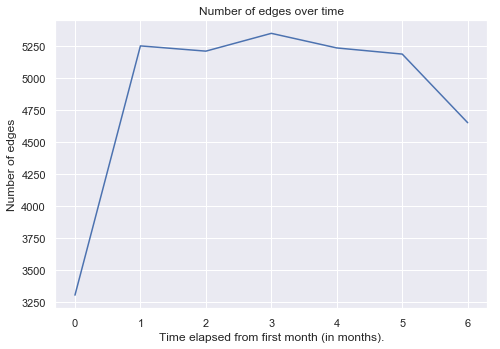

In [38]:
# Number of edges over time

# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()

# Create a list of the number of edges per month
edge_sizes = [len(g.edges()) for g in Gs]

# Plot edge sizes over time
plt.plot(edge_sizes)
plt.xlabel('Time elapsed from first month (in months).') 
plt.ylabel('Number of edges')  
plt.title("Number of edges over time")

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show() 

Exercício 7

In [39]:
def ECDF(data):
    """Compute ECDF for a **one-dimensional** array of measurements."""

    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, len(data) + 1) / len(data)

    return x, y


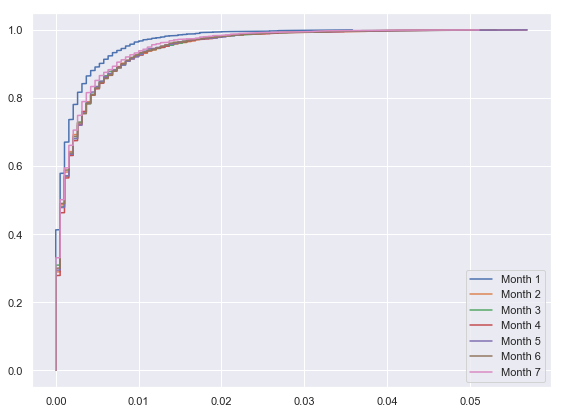

The degree centrality distribution gets smaller over time generally, but nodes in the 4th month have the highest
degree centrality scores overall.


In [40]:
# Degree centrality over time

# Import necessary modules
import networkx as nx
import matplotlib.pyplot as plt

# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs:
    cent = nx.degree_centrality(G)
    cents.append(cent)


# Plot ECDFs over time
for i in range(len(cents)):
    x, y = ECDF(list(cents[i].values()))
    plt.plot(x, y, label='Month {0}'.format(i+1)) 

plt.legend()   
plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

print("""The degree centrality distribution gets smaller over time generally, but nodes in the 4th month have the highest
degree centrality scores overall.""")

#### Exercício 8 - Zooming in & zooming out: Overall graph summary

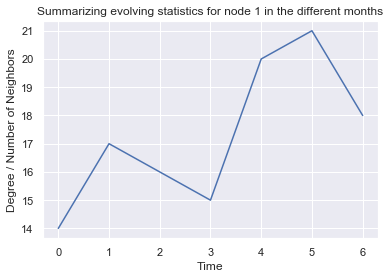


defaultdict(<class 'list'>, {'heathrow': [0.31, 0.84]}) 

with dictionaries we get an error since the key 'heathrow' does not exist in the dictionary


In [41]:
#vídeo

# Graph exploration at scales
# ● Exploration at global and local scales
# ● Global: Centrality distributions
# ● Local: Connectivity and structures

# Zooming on nodes
# ● Isolate a given node or set of nodes
# ● Plot node statistic over time

# Summarizing evolving node statistics
# ● Customer-product dataset
# ● Investigate how purchasing patterns have changed over time
# ● ‘customer1’ - node of interest

# Summarizing evolving node statistics
Gs
noi = 1  # inventei um

degs = []
for g in Gs:
    # Get the degree of the node
    degs.append(len(list(g.neighbors(noi))))
    
plt.plot(degs)
plt.title("Summarizing evolving statistics for node 1 in the different months")
plt.ylabel("Degree / Number of Neighbors")
plt.xlabel("Time")
plt.show()

############################################
print("==========================================================================================\n")

# Default dictionaries
from collections import defaultdict

d = defaultdict(list)

d['heathrow'].append(0.31)
d['heathrow'].append(0.84)
print(d, "\n")

d2 = dict()

# d2['heathrow'].append(0.31) ----> KeyError: 'heathrow'
print("with dictionaries we get an error since the key 'heathrow' does not exist in the dictionary")

Exercício 9

In [42]:
# Find nodes with top degree centralities

nx.degree_centrality(G)

# Get the top 5 unique degree centrality scores: top_dcs
top_dcs = sorted(set(nx.degree_centrality(G).values()), reverse=True)[0:5]

# Create list of nodes that have the top 5 highest overall degree centralities
top_connected = []
for n, dc in nx.degree_centrality(G).items():
    if dc in top_dcs:
        top_connected.append(n)
        
# Print the number of nodes that share the top 5 degree centrality scores
print(len(top_connected))

top_connected  #senders

5


[9, 32, 103, 105, 372]

Exercício 10

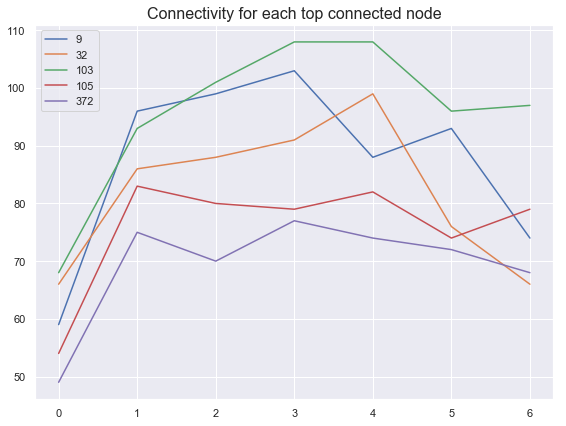

nodes 372 and 105 seem to belong to a certain cluster (bottom), and maybe 9 and 103 to another.


In [43]:
# Visualizing connectivity

# Import necessary modules
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict in which the keys are nodes and the values are a list of connectivity scores over time
connectivity = defaultdict(list)

for n in top_connected:
    for g in Gs:
        connectivity[n].append(len(list(g.neighbors(n))))

# Plot the connectivity for each node
fig = plt.figure() 
for n, conn in connectivity.items(): 
    plt.plot(conn, label=n) 
plt.legend()  
plt.title("Connectivity for each top connected node", fontsize=16)

plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

print("nodes 372 and 105 seem to belong to a certain cluster (bottom), and maybe 9 and 103 to another.")

# Chapter 4 - Tying it up


#### Exercício 1 - Introduction to the dataset

In [44]:
#vídeo

# Dataset & case study introduction
# ● College forum posting dataset, 6 months
# ● Node partitions: students, forums
# ● Activities in the chapter:
#    ● Constructing a graph from a pandas DataFrame
#    ● Computing unipartite projections of a bipartite graph
#    ● Visualization (with Circosplot)
#    ● Time series filtering & analysis
# ● Recap previously used functions


# Graphs from DataFrames
df = pd.DataFrame(data={'customers': ['customerA', 'customerB'], 'products': ['product1', 'product2']})
print(df, "\n")

C = nx.Graph()
C.add_nodes_from(df['products'], bipartite='products')
C.add_nodes_from(df['customers'], bipartite='customers')

print("Nodes:", C.nodes())
print("Edges:", C.edges())

C.add_edges_from(zip(df['customers'], df['products']))
print("Edges:", C.edges())

##################################################################
print("\n================================================================================\n")
print("Bipartite projections:\n")

# Bipartite projections

cust_nodes = [n for n in C.nodes() if C.node[n]['bipartite'] == 'customers']
prod_nodes = [n for n in C.nodes() if C.node[n]['bipartite'] == 'products']

prodC = nx.bipartite.projected_graph(C, nodes=prod_nodes)
custC = nx.bipartite.projected_graph(C, nodes=cust_nodes)

print(prodC.nodes())
print(custC.nodes())


   customers  products
0  customerA  product1
1  customerB  product2 

Nodes: ['product1', 'product2', 'customerA', 'customerB']
Edges: []
Edges: [('product1', 'customerA'), ('product2', 'customerB')]


Bipartite projections:

['product1', 'product2']
['customerA', 'customerB']


Exercício 2

In [45]:
# dataset
data = pd.read_excel(data_folder + "estudantes_fóruns.xlsx")

data.head()

,student,forum,date
0,s397,f287,2004-05-31 00:34:50
1,s55,f19,2004-05-19 22:29:05
2,s17,f43,2004-08-15 18:03:05
3,s397,f427,2004-05-31 15:11:06
4,s484,f340,2004-05-31 22:30:14


In [46]:
# Create a graph from the pandas DataFrame

# In this exercise, you'll create a new bipartite graph by looping over the edgelist (which is a DataFrame object).
# For simplicity's sake, in this graph construction procedure, any edge between a student and a forum node will be the 
# 'last' edge (in time) that a student posted to a forum over the entire time span of the dataset, though there are ways to
# get around this.
# Additionally, to shorten the runtime of the exercise, we have provided a sub-sampled version of the edge list as data.

##############################################

import networkx as nx

# Instantiate a new Graph: G
G = nx.Graph()

# Add nodes from each of the partitions
G.add_nodes_from(data['student'], bipartite='student')
G.add_nodes_from(data['forum'], bipartite='forum')

# Add in each edge along with the date the edge was created
for r, d in data.iterrows():
    G.add_edge(d['student'], d['forum'], date=d['date']) 

G

Exercício 3

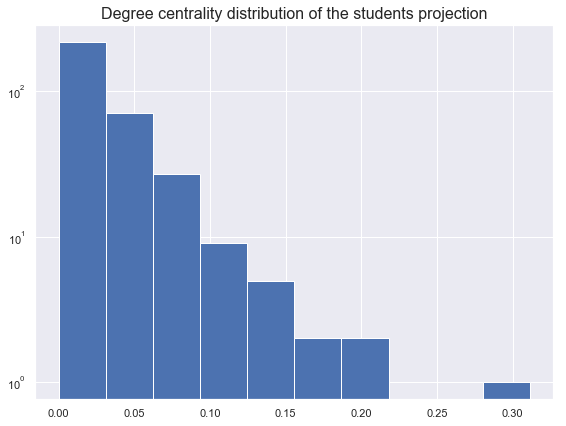

In [47]:
# Visualize the degree centrality distribution of the students projection

# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']

# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.title("Degree centrality distribution of the students projection", fontsize=16)

plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.show() 

Exercício 4

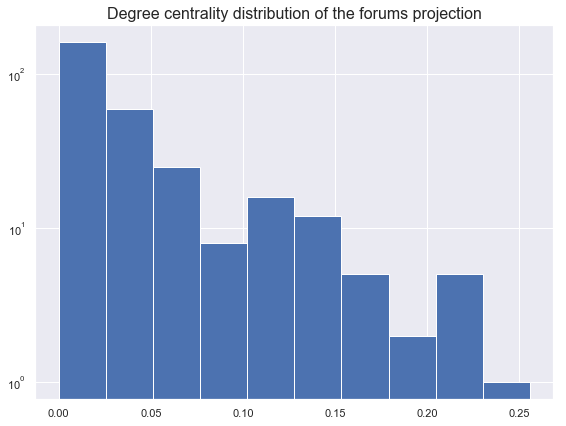

In [48]:
# Visualize the degree centrality distribution of the forums projection

# Import necessary modules
import matplotlib.pyplot as plt 
import networkx as nx

# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'forum']

# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G, forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log') 
plt.title("Degree centrality distribution of the forums projection", fontsize=16)

plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.show()  

#### Exercício 5 - Time based filtering

Filtering edges:
 
First 5:  [('s397', 'f287', {'date': Timestamp('2004-05-31 00:34:50')}), (' s55', ' f19', {'date': Timestamp('2004-05-26 10:16:55')}), (' s55', ' f169', {'date': Timestamp('2004-05-31 18:07:39')}), (' s17', ' f43', {'date': Timestamp('2004-09-18 20:44:34')}), (' s17', ' f35', {'date': Timestamp('2004-06-03 16:38:04')})] 

date >= 2004-10-18: [(' s111', ' f122'), (' s138', ' f327'), (' s86', ' f21'), (' s866', ' f43')] 

True


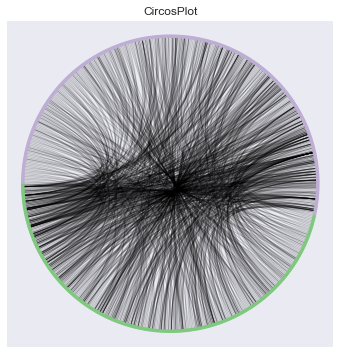

In [49]:
#vídeo
import datetime

# Key concepts
# ● Filtering graphs
# ● Datetime
# ● Visualization

# Filtering edges
print("Filtering edges:\n \nFirst 5: ", list(G.edges(data=True))[0:5], "\n")

print("date >= 2004-10-18:",
      [(u, v) for u, v, d in G.edges(data=True) if d['date'] >= pd.Timestamp('2004-10-18')], "\n")

######################################

# Datetime
from datetime import datetime, timedelta
year = 2011
month = 11
day1 = 10
day2 = 6
date1 = datetime(year, month, day1)
date2 = datetime(year, month, day2)
print(date1 > date2)

######################################

# Graph visualization
from nxviz import CircosPlot

c = CircosPlot(G, node_grouping='bipartite', node_color='bipartite')

c.draw()
plt.title("CircosPlot")
plt.show()

Exercício 6

In [50]:
# Time filter on edges

import networkx as nx
from datetime import datetime

# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates, that the date of the edge is earlier than 
# 2004-05-16.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] < datetime(2004, 5, 16)])


G_sub.edges()

EdgeView([(' s17', ' f8'), (' s89', ' f32'), (' s20', ' f10'), (' s73', ' f13'), (' s12', ' f1'), (' s84', ' f10'), (' s94', ' f2'), (' s30', ' f1')])

Exercício 7

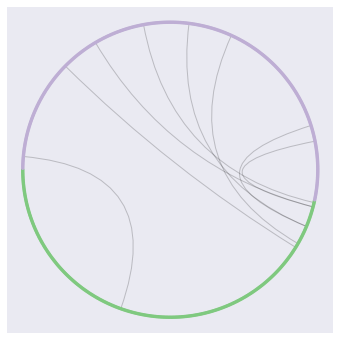

We see that the most connected users overall aren't posting to the most popular forums early on. This trend may 
change as we go forward.


In [51]:
# Visualize filtered graph using nxviz

# Import necessary modules
from nxviz import CircosPlot
import networkx as nx
import matplotlib.pyplot as plt

# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.node[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
c = CircosPlot(G_sub, node_color='bipartite', node_grouping='bipartite', node_order='dc')

# Draw c to screen
c.draw()
plt.show() 

print("""We see that the most connected users overall aren't posting to the most popular forums early on. This trend may 
change as we go forward.""")

#### Exercício 8 - Time series analysis

In [52]:
#vídeo

# Time series
# ● Global vs. local analysis
# ● Analyze evolving graph statistics
# ● Make plots of key evolving stats


# Datetime arithmetic
date1
days = 4
td = timedelta(days)
date1 + td

# Degree centrality
C
nx.degree_centrality(C) 
nx.bipartite.degree_centrality(C, [1, 2])


{'product1': 0.5, 'customerB': 0.5, 'customerA': 0.5, 'product2': 0.5}

Exercício 9

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


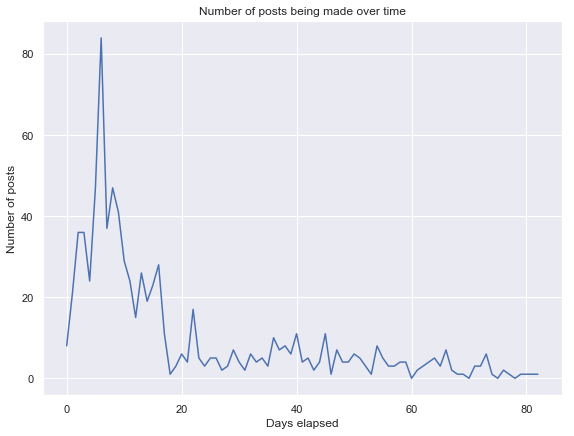

In [53]:
# Plot number of posts being made over time

dayone = datetime(2004, 5, 14, 0, 0)
lastday = datetime(2004, 10, 26, 0, 0)


# Import necessary modules
from datetime import timedelta  
import matplotlib.pyplot as plt

# Define current day and timedelta of 2 days
curr_day = dayone
td = timedelta(2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    
    # Increment the curr_day by the time delta
    curr_day += td
    
# Create the plot
plt.plot(n_posts)  
plt.xlabel('Days elapsed')
plt.ylabel('Number of posts')
plt.title("Number of posts being made over time")

plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.show()  

Exercício 10

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


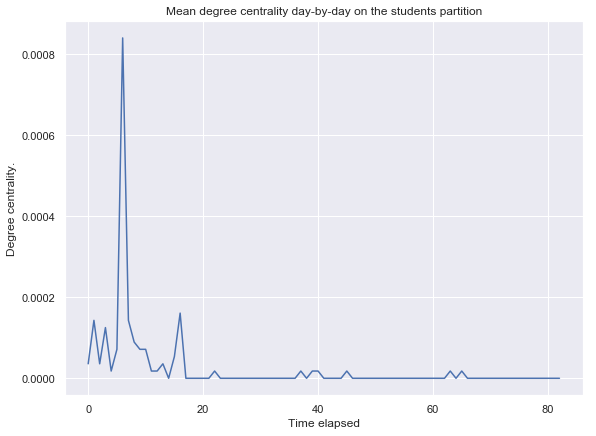

In [54]:
# Extract the mean degree centrality day-by-day on the students partition

# Here, you're going to see if the mean degree centrality over all nodes is correlated with the number of edges that are
# plotted over time. There might not necessarily be a strong correlation, and you'll take a look to see if that's the case.

from datetime import datetime, timedelta
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = dayone
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day)  
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True)
                          if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub, student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td
    
plt.plot(mean_dcs)
plt.xlabel('Time elapsed')
plt.ylabel('Degree centrality.')
plt.title("Mean degree centrality day-by-day on the students partition")

plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.show()


Exercício 11 & 12

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-08-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


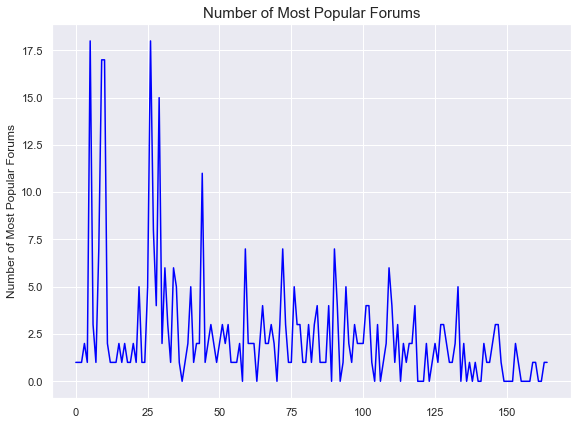

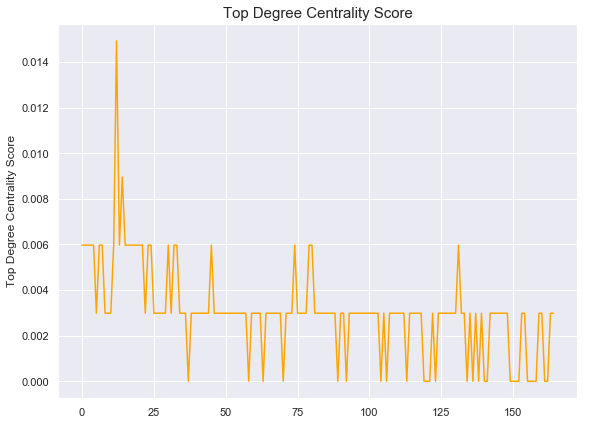

On a per-day basis, it would be interesting to see which forums were the most popular over time. Some further 
questions might include - was it the same set over time? Or were some forums really popular early on and others popular 
later on?


In [55]:
# Find the most popular forums day-by-day

# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

most_popular_forums = []
highest_dcs = []
curr_day = dayone 
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
        
    G_sub = nx.Graph()
    G_sub.add_nodes_from(G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) 
                          if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, forum_nodes)
    
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n:dc for n, dc in dc.items() if n in forum_nodes}
    
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in dc.items() if dc == max(forum_dcs.values()) and dc != 0] 
    most_popular_forums.append(most_popular_forum) 
    
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td  
    
plt.figure(1) 
plt.plot([len(forums) for forums in most_popular_forums], color='blue', label='Forums')
plt.ylabel('Number of Most Popular Forums')
plt.title("Number of Most Popular Forums", fontsize=15)
plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.show()

plt.figure(2)
plt.plot(highest_dcs, color='orange', label='DC Score')
plt.ylabel('Top Degree Centrality Score')
plt.title("Top Degree Centrality Score", fontsize=15)
plt.subplots_adjust(left=0, bottom=-0.3, right=1.2, top=1, wspace=0, hspace=0)
plt.show()     

print("""On a per-day basis, it would be interesting to see which forums were the most popular over time. Some further 
questions might include - was it the same set over time? Or were some forums really popular early on and others popular 
later on?""")

#### Exercício 13 - end

In [56]:
#vídeo

# Fim